In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
os.chdir('/Users/shivangisinha/Downloads')

In [379]:
def import_data():
    df = pd.read_csv("PA1_train.csv")
    return df

In [380]:
train= import_data()

In [381]:
train.describe()


,dummy,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,4.586742e+09,3.375200,2.118875,2080.223200,1.508920e+04,1.503700,0.007000,0.229400,3.40910,...,1793.099300,287.123900,1971.124900,81.226700,98078.293100,47.559814,-122.213287,1994.326100,12746.323400,5.385297
std,0.0,2.884510e+09,0.943246,0.765128,911.334358,4.120389e+04,0.542647,0.083377,0.755932,0.65359,...,830.865434,435.005264,29.480594,394.379804,53.518391,0.138651,0.141405,691.900301,28241.243043,3.573901
min,1.0,1.000102e+06,1.000000,0.500000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.00000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,460.000000,660.000000,0.820000
25%,1.0,2.120767e+09,3.000000,1.750000,1430.000000,5.035500e+03,1.000000,0.000000,0.000000,3.00000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470200,-122.328000,1490.000000,5092.000000,3.250000
50%,1.0,3.905081e+09,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.00000,...,1560.000000,0.000000,1976.000000,0.000000,98065.000000,47.571300,-122.230000,1850.000000,7620.000000,4.500000
75%,1.0,7.312125e+09,4.000000,2.500000,2550.000000,1.075050e+04,2.000000,0.000000,0.000000,4.00000,...,2230.000000,550.000000,1997.000000,0.000000,98117.250000,47.677400,-122.125000,2380.000000,10095.750000,6.481880
max,1.0,9.900000e+09,33.000000,7.750000,9890.000000,1.651359e+06,3.500000,1.000000,4.000000,5.00000,...,8860.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,6110.000000,871200.000000,68.900000


In [382]:
del train['id']

In [383]:
train.dtypes

dummy              int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [412]:
train['waterfront'] = train['waterfront'].astype('category')
train['view'] = train['view'].astype('category')
train['condition'] = train['condition'].astype('category')
train['grade'] = train['grade'].astype('category')
train['zipcode'] = train['zipcode'].astype('str')
train['date'] = pd.to_datetime(train['date'])
train['yr_built'] = pd.to_datetime(train['yr_built'])
train['yr_renovated'] = pd.to_datetime(train['yr_renovated'])

In [385]:
def normalize(df):
    for column in df:
        if (df[column].name == 'dummy'):
            continue
        if (df[column].dtype == np.int64 or df[column].dtype == np.float64):
            df[column] = (df[column]- min(df[column]))/(max(df[column] - min(df[column])))
    return df                                              



In [386]:
train =normalize(train)

In [387]:
train.head()

,dummy,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1,2014-07-09,0.09375,0.275862,0.246849,0.005715,0.4,0,0,3,...,0.276796,0.000000,1970-01-01 00:00:00.000001989,1970-01-01,98074,0.761782,0.394979,0.400000,0.011601,0.075345
1,1,2014-07-18,0.03125,0.275862,0.234244,0.002682,0.0,0,0,5,...,0.109541,0.477941,1970-01-01 00:00:00.000001926,1970-01-01,98126,0.683127,0.112971,0.318584,0.004985,0.085635
2,1,2014-07-07,0.12500,0.172414,0.134454,0.001471,0.2,0,0,3,...,0.150766,0.000000,1970-01-01 00:00:00.000001902,1970-01-01,98144,0.707093,0.174059,0.226549,0.003837,0.053026
3,1,2015-04-28,0.09375,0.172414,0.141807,0.005469,0.0,0,0,4,...,0.159011,0.000000,1970-01-01 00:00:00.000001969,1970-01-01,98059,0.515522,0.300418,0.212389,0.011556,0.043772
4,1,2014-09-04,0.15625,0.241379,0.363445,0.006426,0.0,0,2,5,...,0.243816,0.511029,1970-01-01 00:00:00.000001962,1970-01-01,98008,0.690043,0.335565,0.361062,0.011188,0.118243


In [430]:
def one_hot(a, num_classes):
    return np.squeeze(np.eye(num_classes)[(a-min(a)).reshape(-1)])

#def make_dummies(df):
    #b = np.empty((10000,22))
    #for column in df.select_dtypes(include=['category']):
            #arr = np.array( df[column])
            #classes =len(np.unique(arr))
            #a = one_hot(arr,classes)
            #np.hstack((b,a))
    #return b
            
        

In [441]:
#Making hot encoded array for each categorical variables 
view = np.array(train['view'])
k = len(np.unique(view))
encod = one_hot(view,k)

waterfront = np.array(train['waterfront'])
k = len(np.unique(waterfront))
encod2 = one_hot(waterfront,k)

grade = np.array(train['grade'])
k = len(np.unique(grade))
encod3 = one_hot(grade,k)

test_classes = train['zipcode'].unique()
d = dict(zip(test_classes, range(0,len(train['zipcode'].unique()))))
train['zipcode'] = train['zipcode'].map(d, na_action='ignore')
zipcode = np.array(train['zipcode'])
k = len(np.unique(zipcode))
encod4= one_hot(zipcode,k)

In [442]:
#Combined array for categorical variables
cat_features = np.hstack((encod,encod2,encod3,encod4))

In [439]:
#To print entire array 
#with np.printoptions(threshold=np.inf):
     #print(encod3)

In [443]:
cat_features.size

870000

In [446]:
## For checking purposes (Not using date time for implementation)
del train['date']
del train['view']
del train['waterfront']
del train['zipcode']
del train['grade']
del train['yr_built']
del train['yr_renovated']

KeyError: 'date'

In [468]:
#Separating target from features
tar = train.loc[:,['price']]

In [469]:
#Separating target from features
feat = train.iloc[:,0:13]


In [475]:
#Converting dataframe to matrix
X = feat.as_matrix()
#adding encoded features
X = np.hstack((X,cat_features))
Y = tar.as_matrix()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [546]:
#cost function
def L2cost_function(x,y,theta,lamda):
    n=y.size
    J=0
    h = np.dot(x,theta)
    
    L2_cost = (lamda)*np.sum(np.dot(theta[1:].T,theta[1:]))
    J= (1/2)*np.dot(np.transpose(h-y),(h-y)) + L2_cost
    return J
    
    

In [547]:
#Gradient calculation
def gradient(x,y,theta,lamda):
    n = y.size
    h = np.dot(x,theta)
    theta0 = theta[0,0]
    theta[0,0] = 0
    grad = x.T.dot(h-y) + lamda*theta
    theta[0,0] = theta0
    return grad

In [580]:
def optimize(x,y,lamda,alpha,epsilon):
    theta = np.zeros((x.shape[1],1))
    grad = gradient(x,y,theta,lamda)
    #print(grad)
    n_iter =0
    J = []
    while (np.linalg.norm(grad) > epsilon):
        cost = L2cost_function(x,y,theta,lamda)
        print(cost[0])
        J.append(cost[0])
        grad = gradient(x,y,theta,lamda)
        
        
        n_iter += 1
        theta = theta-(alpha*grad)
        print(theta)
        if cost > 10e100:
            print("explosion")
            break
        if n_iter>1000:
            break
    return J,theta,n_iter               
                     

In [581]:
def predict(X,theta):
    return np.dot(X,theta)

In [583]:
cost,w,n = optimize(X,Y,0,0.00001,0.5)

[36.26132767525535]
[[0.006705782633666321]
 [0.0005449263006756755]
 [0.001787893939077746]
 [0.0015529604691648952]
 [7.080578908626471e-05]
 [0.0016538707881903626]
 [0.023036699778202083]
 [0.0014352102952142546]
 [0.0009556059779708779]
 [0.004716374475342615]
 [0.001703329958922294]
 [0.002199767221238151]
 [0.00010765643361741248]
 [0.005500445014688633]
 [0.0001706368977673325]
 [0.00044637220329024645]
 [0.00031915286427732073]
 [0.0002691756536427731]
 [0.006561398171269138]
 [0.00014438446239717974]
 [1.95358401880141e-06]
 [2.6819822267920083e-05]
 [0.0003006214923619271]
 [0.0019449791451233746]
 [0.0019228194917743865]
 [0.001163592646886017]
 [0.0007760059503525265]
 [0.0004141182917156288]
 [0.00012705199764982377]
 [2.782021151586369e-05]
 [0.0001898659885428908]
 [8.316595769682729e-05]
 [0.0001184839424206816]
 [0.00013915181110458281]
 [7.91854876615746e-05]
 [0.00011364298913043479]
 [4.9694225910693305e-05]
 [0.00010928312426556994]
 [0.00015117680669800236]
 [1.1

[13.3736683924979]
[[0.0050145918485757215]
 [0.0005969756521960022]
 [0.002579764062836618]
 [0.0026210317262377195]
 [0.00010380834692321058]
 [0.0026651788644015866]
 [0.015373729207083856]
 [0.0024119002630677757]
 [0.0016452900001241496]
 [0.004962091021889168]
 [0.0013737279981447705]
 [0.0032493675598599136]
 [0.00014188744747308532]
 [0.0017632856534258938]
 [0.00039360028474361456]
 [0.0010159775009105107]
 [0.0008819910917875559]
 [0.0009597373177081336]
 [0.004485350163617121]
 [0.0005292416849585976]
 [-1.8291820410374752e-05]
 [-0.00015223162368767254]
 [-0.001146271989475153]
 [-0.0020750915696757933]
 [0.0014729768976367973]
 [0.002465209555416022]
 [0.0023338598574810495]
 [0.0014832173325555933]
 [0.0005256870017593345]
 [0.00012552820697588703]
 [0.0003705058382702751]
 [-7.577082872712326e-05]
 [0.00014191660102598139]
 [3.448944276421023e-05]
 [6.634773859496035e-05]
 [-0.00015007711341967204]
 [-8.23594868113693e-05]
 [-5.610956823924309e-05]
 [2.5558741681970595e-

[[0.005196515504086536]
 [0.0007785953255679582]
 [0.0037148823331852833]
 [0.00394972476223503]
 [0.00015040723247766033]
 [0.003922766509505515]
 [0.014386623514422731]
 [0.003626354103690904]
 [0.0025050122779932777]
 [0.006373511469056183]
 [0.0014903122955699471]
 [0.0047119634466280666]
 [0.0001982819655886637]
 [-0.0001317160761225476]
 [0.0006276516266484298]
 [0.0016040532928798025]
 [0.0014472526984143554]
 [0.001649273962266484]
 [0.004281412399184228]
 [0.0009151031049023019]
 [-3.653096352324527e-05]
 [-0.0003109302226539464]
 [-0.0023658881609737985]
 [-0.00488762427760405]
 [0.0013959914739066295]
 [0.0038137028307209508]
 [0.003892863353132725]
 [0.002548566725839356]
 [0.0009234942590470228]
 [0.00022287048619486075]
 [0.0005678544176339944]
 [-0.00019428435686630425]
 [0.00019425353758027245]
 [-2.728833378916081e-05]
 [7.70367411720061e-05]
 [-0.000356721371784248]
 [-0.00018751979221749246]
 [-0.00017186466543278017]
 [-4.3356942095937553e-05]
 [-0.00015928371374322

[[0.005560943487314435]
 [0.000964806241804184]
 [0.004825382118520532]
 [0.005243200102158402]
 [0.00019609315203052293]
 [0.005110850807010833]
 [0.01414270526799328]
 [0.004805302420728927]
 [0.0033522968457938866]
 [0.007852017686286537]
 [0.0016327318110585373]
 [0.006139656765506015]
 [0.00025377949743418665]
 [-0.0017272100848195382]
 [0.0008476245629754299]
 [0.002145462288138903]
 [0.0019775502589515523]
 [0.002317516462068077]
 [0.004269296758723306]
 [0.0012916467285911237]
 [-5.4428174978598574e-05]
 [-0.00046624056510623056]
 [-0.003518292875246065]
 [-0.007262729174882686]
 [0.0012455526894877306]
 [0.005032157677912324]
 [0.00537157293567555]
 [0.003579432895945358]
 [0.0013147537864330958]
 [0.00031916429207392796]
 [0.0007502737338314741]
 [-0.0003024118600340945]
 [0.0002488586719047802]
 [-8.515908748834418e-05]
 [9.13645269341815e-05]
 [-0.0005499691862086542]
 [-0.0002859404596702766]
 [-0.00027491797582854455]
 [-0.0001006475370004405]
 [-0.0002340375099258478]
 [

[[0.005922430872983368]
 [0.0011425173072639988]
 [0.005875876804902054]
 [0.006473880633708358]
 [0.00023944872626118803]
 [0.006203920145969931]
 [0.013983148703408856]
 [0.0059237317292290415]
 [0.0041686989896135935]
 [0.009279676934563807]
 [0.001756643132459065]
 [0.0074895285669250265]
 [0.00030608553718567815]
 [-0.0032011193780747587]
 [0.001051846944803318]
 [0.0026367678758546045]
 [0.0024713796486727094]
 [0.0029635557817274845]
 [0.004264152911111311]
 [0.0016582779618720524]
 [-7.216303871238216e-05]
 [-0.0006199813158389561]
 [-0.004622104510202368]
 [-0.009325479671416493]
 [0.0009945494476034209]
 [0.006113283290761772]
 [0.006766252001213585]
 [0.004574459783416582]
 [0.0016992199809608016]
 [0.00041439490519737404]
 [0.0009157562791591626]
 [-0.00040390958123045535]
 [0.00030284648269588327]
 [-0.00014324939602083206]
 [0.00010694497148012987]
 [-0.0007351701027245181]
 [-0.0003801077884432832]
 [-0.0003699730438506539]
 [-0.00015232350258611321]
 [-0.000305677746071

[[0.006262436311236303]
 [0.0013109829043691176]
 [0.006867312960047215]
 [0.007643436804219073]
 [0.00028049218170712756]
 [0.007207597936008776]
 [0.013834848115279103]
 [0.0069836355735577805]
 [0.004953842778183825]
 [0.010647083906901793]
 [0.0018592042194309375]
 [0.008762923262770674]
 [0.0003551865584131321]
 [-0.00457926394855648]
 [0.001241154212939207]
 [0.003081048926769138]
 [0.002930980646915707]
 [0.0035885164731687224]
 [0.004247000322471885]
 [0.0020154359887644127]
 [-8.975156490111989e-05]
 [-0.000772303182257692]
 [-0.005680332164621524]
 [-0.011124105167880101]
 [0.0006589261060101277]
 [0.007067448655151178]
 [0.008081340810790996]
 [0.005535375612926453]
 [0.002077220721203227]
 [0.0005086164848147302]
 [0.0010654267424256572]
 [-0.0004995745676214347]
 [0.0003559601325990314]
 [-0.00020184514233694567]
 [0.0001233611441058331]
 [-0.0009133613895191297]
 [-0.00047052439348290343]
 [-0.0004580925230209084]
 [-0.00019991172117581572]
 [-0.00037453585737128823]
 [-0

[[0.006657087296812115]
 [0.0015094178461679617]
 [0.008030354425223369]
 [0.00902617988646205]
 [0.00032879117313498816]
 [0.00834880541675099]
 [0.01365383511776989]
 [0.00823305263686848]
 [0.005893608688274001]
 [0.012275241916441746]
 [0.0019597638130483433]
 [0.01025570001440486]
 [0.0004123877263998547]
 [-0.0061798812726574105]
 [0.0014583673923927315]
 [0.003575584705711091]
 [0.0034610500118666524]
 [0.004341966459499042]
 [0.004207747765850053]
 [0.0024493395309620573]
 [-0.00011152974982255638]
 [-0.0009606749566273013]
 [-0.006941061688464359]
 [-0.013054023073671756]
 [0.00014718996098838727]
 [0.008098716777043193]
 [0.009620779631937821]
 [0.006691452326571165]
 [0.002541177001400025]
 [0.0006250610674574711]
 [0.001232300343339013]
 [-0.0006116052296428991]
 [0.00042116738047703097]
 [-0.0002756226282667157]
 [0.00014479281609949254]
 [-0.0011270098366660843]
 [-0.0005786669878745889]
 [-0.0005593992758580415]
 [-0.000255007348923238]
 [-0.000457022723830196]
 [-0.0017

[[0.007020973947473849]
 [0.0016955010674008088]
 [0.009116546345299762]
 [0.010328665856002266]
 [0.0003740430408918642]
 [0.009377516660289673]
 [0.013476552443698716]
 [0.009406390635157772]
 [0.0067899420796514965]
 [0.013819280042561327]
 [0.002032900912461032]
 [0.011648470969782079]
 [0.0004653504988763473]
 [-0.007655684807829317]
 [0.0016557303473288913]
 [0.004008429548436771]
 [0.003945823041007364]
 [0.005066675818530129]
 [0.00415080115236908]
 [0.0028701727951047622]
 [-0.00013307405061104387]
 [-0.0011467361097590118]
 [-0.008135089466975687]
 [-0.014683148258922444]
 [-0.0004398281706511287]
 [0.008969300443102797]
 [0.011052518818221245]
 [0.007800666185838208]
 [0.0029962439472109646]
 [0.0007401206100199247]
 [0.0013789190480750365]
 [-0.0007158907724634563]
 [0.000485152713968092]
 [-0.00034974676669983026]
 [0.00016700694245023936]
 [-0.0013312865654724324]
 [-0.000681782020398611]
 [-0.0006517840131773094]
 [-0.00030650906684875017]
 [-0.000535857998613757]
 [-0.0

[[0.0073571635332827165]
 [0.001870341922196116]
 [0.010133373447004166]
 [0.01155829122178557]
 [0.00041653021576711975]
 [0.010306365050076222]
 [0.013302972395666478]
 [0.010511038391299451]
 [0.007645667826936132]
 [0.015285153674252152]
 [0.0020817765003049806]
 [0.012950739956802996]
 [0.0005144627343284086]
 [-0.00901693167298739]
 [0.0018349143422171027]
 [0.004385275296061989]
 [0.0043892290897698145]
 [0.005764676478221192]
 [0.004078382832986443]
 [0.0032787807002962657]
 [-0.00015438260713069042]
 [-0.0013304475814319124]
 [-0.009264900596236565]
 [-0.016059395227690898]
 [-0.0010784894664265896]
 [0.009697089147793379]
 [0.012384656884653936]
 [0.008866137884549426]
 [0.003443007401883043]
 [0.000853887693319557]
 [0.001507373630984638]
 [-0.0008130441600059118]
 [0.0005480080031145336]
 [-0.00042399543220692903]
 [0.00018980231986904592]
 [-0.0015268704027400616]
 [-0.0007802469874860485]
 [-0.0007360994813254951]
 [-0.000355544644033573]
 [-0.0006113567497306268]
 [-0.00

[[0.007608013345746621]
 [0.002002784980863236]
 [0.010901331902024707]
 [0.012493946389405304]
 [0.0004486996601236323]
 [0.010984948438972162]
 [0.013166872680808055]
 [0.011349693228146867]
 [0.00830274783829836]
 [0.01640519937536027]
 [0.0021052810265405775]
 [0.013933057013342423]
 [0.0005512140532662381]
 [-0.010029692993163883]
 [0.001966186011593416]
 [0.004649887217525422]
 [0.004716548860378923]
 [0.006305084249412731]
 [0.004010632325553473]
 [0.0035973810201931386]
 [-0.00017125957691877758]
 [-0.0014757110482280685]
 [-0.010124226333601985]
 [-0.017005555376367953]
 [-0.0016138205703353653]
 [0.010187240394219602]
 [0.013383599092040706]
 [0.009688923663052315]
 [0.0037947958950695134]
 [0.0009440272068165991]
 [0.0015983018453971385]
 [-0.000886001024144893]
 [0.0005975325644170425]
 [-0.00048336134709312553]
 [0.00020834589920201802]
 [-0.0016774799473242038]
 [-0.0008559009157022998]
 [-0.0007982513209264561]
 [-0.00039361884985409653]
 [-0.0006695418165383246]
 [-0.00

[[0.007844116758122117]
 [0.0021291158520954354]
 [0.011632101804294801]
 [0.013390155121086145]
 [0.0004793779266201317]
 [0.01161158134009122]
 [0.01303329731064568]
 [0.012151525270868734]
 [0.00893670117759724]
 [0.017481160280715703]
 [0.002116290888159412]
 [0.01486666207200265]
 [0.0005858832392254185]
 [-0.010979412615946848]
 [0.0020874839629323938]
 [0.004884323773955921]
 [0.005021290912706748]
 [0.006830430724473891]
 [0.003935110675708133]
 [0.0039090060824139745]
 [-0.00018798616591304156]
 [-0.0016194550415658084]
 [-0.010945408961583953]
 [-0.017833277125081336]
 [-0.0021623159733469587]
 [0.010603505826887636]
 [0.014326925945901948]
 [0.010486841176544505]
 [0.004141854843892912]
 [0.0010334322323861808]
 [0.001679624425225933]
 [-0.0009549977328478672]
 [0.0006464208843303265]
 [-0.0005426146966814049]
 [0.0002270863026500255]
 [-0.0018231780196862003]
 [-0.0009289570226917037]
 [-0.0008560691214350419]
 [-0.0004310904783176861]
 [-0.0007258986104975406]
 [-0.0028580

[[0.008066584074209144]
 [0.0022497451952543843]
 [0.012328382907414016]
 [0.014249633766128068]
 [0.0005086715273779061]
 [0.01219067391155747]
 [0.012902301623372]
 [0.012919219416502745]
 [0.009548654635084874]
 [0.01851533599708874]
 [0.0021159349058889132]
 [0.01575502786764892]
 [0.0006186166403958599]
 [-0.011870110378184652]
 [0.002199450560219173]
 [0.005090777351614156]
 [0.005304959588043587]
 [0.007341506952516865]
 [0.003852596264594479]
 [0.004213987809614653]
 [-0.00020456346970531016]
 [-0.001761682465310976]
 [-0.011729776228818378]
 [-0.018557828793507678]
 [-0.0027175785301102673]
 [0.010952539317446988]
 [0.015217813726702663]
 [0.011261110177757772]
 [0.0044844114417287575]
 [0.0011221388980255365]
 [0.0017521009378483213]
 [-0.001020267126882992]
 [0.0006947049220947813]
 [-0.0006016919239459585]
 [0.0002459645521420859]
 [-0.001964209937974234]
 [-0.0009995632001320862]
 [-0.0009098685159166357]
 [-0.00046828407524758753]
 [-0.000780543932038776]
 [-0.00307312262

[[0.008327010880675242]
 [0.002393081437667371]
 [0.013153936192325936]
 [0.015276075368232502]
 [0.0005434892301230474]
 [0.01285367011725886]
 [0.012742257054975979]
 [0.013834519638542276]
 [0.01028425212292259]
 [0.01975251668942557]
 [0.0021010473204872834]
 [0.016806647052645382]
 [0.0006570144332222484]
 [-0.012906137580418994]
 [0.0023271845514052417]
 [0.00531255803581672]
 [0.005632010992336106]
 [0.007961394881536155]
 [0.0037406709769328556]
 [0.004586339903742376]
 [-0.0002250774857851311]
 [-0.0019373459722799224]
 [-0.01266047941261422]
 [-0.019338500848982622]
 [-0.003413300799531256]
 [0.011303474864321168]
 [0.016262149833149057]
 [0.012197405450357931]
 [0.004906594331687299]
 [0.0012320909203528997]
 [0.0018313003118848078]
 [-0.001096937320526708]
 [0.0007542536220888357]
 [-0.0006752110372378364]
 [0.0002696811531059051]
 [-0.0021342759483105253]
 [-0.0010845839491852786]
 [-0.0009719035939442341]
 [-0.000514793683616389]
 [-0.000846605483299699]
 [-0.003331940134

[[0.008522319757419294]
 [0.0025022025658554643]
 [0.013781211617293797]
 [0.0160616202016978]
 [0.0005700119443024743]
 [0.01333964398331373]
 [0.012617229386781679]
 [0.014533972814014154]
 [0.010850439385728989]
 [0.02070020643198246]
 [0.0020786893151817807]
 [0.01760433351872688]
 [0.0006858659458666947]
 [-0.013677264805049801]
 [0.0024202526543297617]
 [0.005463206500167648]
 [0.0058731664993501515]
 [0.008442958908621524]
 [0.0036448524265468964]
 [0.004877467330872388]
 [-0.00024132488583147936]
 [-0.0020761946410415982]
 [-0.013366835024469666]
 [-0.019876872377339]
 [-0.003966154922068395]
 [0.011522606734844796]
 [0.01704550731752968]
 [0.01292247717396195]
 [0.005239765372780069]
 [0.0013193450090528997]
 [0.001886297051752237]
 [-0.0011545790156457345]
 [0.0008012786319116369]
 [-0.000733712220606502]
 [0.00028869951492691703]
 [-0.0022655949479280066]
 [-0.0011501652476979339]
 [-0.001017678331850819]
 [-0.0005522835927384886]
 [-0.0008977763979080157]
 [-0.0035313551054

[[0.008706921101514444]
 [0.002606726189759769]
 [0.014381151636580596]
 [0.016817707656848428]
 [0.0005954388959663865]
 [0.013789527066072556]
 [0.012494909163531208]
 [0.015206428621283848]
 [0.011397793345035705]
 [0.0216124670256613]
 [0.002047928304604301]
 [0.018366047709306558]
 [0.0007131788043031657]
 [-0.01440054740716084]
 [0.002505755316323954]
 [0.005591896634080961]
 [0.0060973725358490416]
 [0.008912444022421317]
 [0.0035440452152632742]
 [0.005162875886251159]
 [-0.0002574290022455581]
 [-0.002213564573415512]
 [-0.014040629369351859]
 [-0.020349270951597845]
 [-0.004512157519460058]
 [0.011692349464703397]
 [0.017785268147241406]
 [0.013627291362950147]
 [0.005569062491315298]
 [0.0014060010513749905]
 [0.001934467117056141]
 [-0.0012091321405554984]
 [0.0008477828199328903]
 [-0.000791896612375534]
 [0.0003077211951845412]
 [-0.0023929047369641676]
 [-0.0012137090681805564]
 [-0.0010602857384449092]
 [-0.0005902180856528683]
 [-0.0009475509811935571]
 [-0.00372430851

[7.0779630844169805]
[[0.008881547342769948]
 [0.002706933637801272]
 [0.014955551447663418]
 [0.017546182307100172]
 [0.0006198442304587347]
 [0.014206129055077022]
 [0.012375319283807728]
 [0.015853684903719682]
 [0.01192715835699025]
 [0.022490969406767765]
 [0.0020094993255677846]
 [0.019094131504986893]
 [0.0007390549955937265]
 [-0.015078926234251219]
 [0.002584152582061454]
 [0.005700195428544149]
 [0.006305699896317689]
 [0.009370425670097868]
 [0.0034387376241385155]
 [0.005442809718631424]
 [-0.00027339220531823243]
 [-0.0023494737201850088]
 [-0.014683131897206275]
 [-0.020764153125986114]
 [-0.005048762409297411]
 [0.011817215348823632]
 [0.0184837668827705]
 [0.014312742459545755]
 [0.005894650542884749]
 [0.0014920854667383181]
 [0.0019763185490160977]
 [-0.001260763116458027]
 [0.0008937869928735011]
 [-0.0008497364080818542]
 [0.00032671827455834116]
 [-0.0025163729619885216]
 [-0.0012753245677943007]
 [-0.0010999433728336651]
 [-0.0006287408276745291]
 [-0.000996009862

[[0.00904686691102395]
 [0.002803083616352268]
 [0.015506050799722493]
 [0.018248736608799648]
 [0.0006432962777192016]
 [0.014591990145719278]
 [0.012258475131119956]
 [0.016477385686924154]
 [0.012439326483009758]
 [0.023337273189155208]
 [0.00196406984482186]
 [0.019790730078336087]
 [0.0007635885428314177]
 [-0.01571514062635558]
 [0.002655871440020737]
 [0.005789555403461999]
 [0.006499140804872189]
 [0.009817439889024598]
 [0.003329370063791824]
 [0.005717496847232118]
 [-0.0002892170274060098]
 [-0.002483942092851094]
 [-0.01529558637560845]
 [-0.0211288828122546]
 [-0.005573990025483511]
 [0.011901330038764821]
 [0.019143183649917798]
 [0.014979665596115414]
 [0.006216683057117313]
 [0.0015776229027122347]
 [0.0020123156602414993]
 [-0.0013096265745201974]
 [0.0009393101831786647]
 [-0.0009072093021482131]
 [0.0003456676385693577]
 [-0.002636154318033087]
 [-0.0013351138096710897]
 [-0.0011368515755110357]
 [-0.0006679672890346342]
 [-0.0010432273313681986]
 [-0.004091939108923

[6.770532749511274]
[[0.009203491304679309]
 [0.002895414475652906]
 [0.016034150495637552]
 [0.018926926297238]
 [0.0006658580879039327]
 [0.014949411533876343]
 [0.01214438485035668]
 [0.017079037078426312]
 [0.012935041747744973]
 [0.02415283723508793]
 [0.0019122469802347532]
 [0.020457812014231486]
 [0.0007868662402992031]
 [-0.016311744482264103]
 [0.002721308752692706]
 [0.005861324425190002]
 [0.006678615904620211]
 [0.010253986704440483]
 [0.003216340779192573]
 [0.005987150525486728]
 [-0.00030490612523115544]
 [-0.002616991353346577]
 [-0.015879208050133937]
 [-0.02144987410212041]
 [-0.00608633548198357]
 [0.011948467845254907]
 [0.01976555720768682]
 [0.01562884174208944]
 [0.0065353032343527205]
 [0.0016626363881110432]
 [0.0020428835211147734]
 [-0.0013558664698290076]
 [0.0009843698805087175]
 [-0.000964297684985389]
 [0.00036455028428489033]
 [-0.0027523920464183078]
 [-0.001393172359959646]
 [-0.0011711951641213214]
 [-0.0007079887523501024]
 [-0.0010892719686158674]


[[0.009351981270343455]
 [0.002984146212160398]
 [0.01654122690881975]
 [0.019582183995825668]
 [0.0006875879101592968]
 [0.015280482112570406]
 [0.012033049689586206]
 [0.017660021301809336]
 [0.013415003966139387]
 [0.02493902898005909]
 [0.0018545838565457084]
 [0.021097187081953624]
 [0.000808968310259336]
 [-0.01687112082290893]
 [0.0027808338772848723]
 [0.00591675452391032]
 [0.006844980512799159]
 [0.010680533179258017]
 [0.003100010802705293]
 [0.006251970467638156]
 [-0.00032046224762569093]
 [-0.002748644460485625]
 [-0.016435181423525003]
 [-0.021732715202729076]
 [-0.006584690145658291]
 [0.011962083457631691]
 [0.02035279667095833]
 [0.016261002313891354]
 [0.006850644837746619]
 [0.0017471474701391129]
 [0.0020684119241875993]
 [-0.0013996170664147855]
 [0.001028982229996728]
 [-0.001020987951715936]
 [0.0003833507221137949]
 [-0.002865219237970041]
 [-0.0014495898205837733]
 [-0.001203144930819966]
 [-0.0007488757826727045]
 [-0.0011342072046098856]
 [-0.004436875330586

[[0.009492852211298924]
 [0.0030694822405886364]
 [0.017028544769436212]
 [0.020215831262470386]
 [0.0007085396212360837]
 [0.015587101866109601]
 [0.011924464388520574]
 [0.01822160910041369]
 [0.013879872189781565]
 [0.025697132672437725]
 [0.0017915852063024782]
 [0.021710521954247254]
 [0.0008299689906306874]
 [-0.017395495012984583]
 [0.0028347910135856297]
 [0.005957009826473005]
 [0.006999030228092238]
 [0.011097516156132619]
 [0.002980708257544334]
 [0.006512143953754583]
 [-0.0003358882079952951]
 [-0.0028789253657883792]
 [-0.016964658564477864]
 [-0.021982276004717388]
 [-0.007068274815495334]
 [0.011945340483373241]
 [0.020906692044916]
 [0.01687683331090674]
 [0.00716283299311483]
 [0.0018311763374623392]
 [0.0020892588919672536]
 [-0.001441003809851087]
 [0.001073162201995618]
 [-0.001077269907174126]
 [0.0004020564598310247]
 [-0.0029747599675314577]
 [-0.0015044503057200869]
 [-0.0012328589666361343]
 [-0.0007906812317118451]
 [-0.0011780918135688347]
 [-0.0046014039279

[[0.009626578926669939]
 [0.003151610964534586]
 [0.017497268440967387]
 [0.02082908926798776]
 [0.0007287631097929278]
 [0.015871002391192515]
 [0.011818617598328756]
 [0.018764970715021083]
 [0.014330267816439167]
 [0.0264283566673716]
 [0.0017237123120122687]
 [0.022299354130027114]
 [0.0008499370616471866]
 [-0.017886946782857658]
 [0.002883501311021217]
 [0.005983173705917656]
 [0.0071415059656602465]
 [0.011505344726928464]
 [0.0028587320998386995]
 [0.006767846826831234]
 [-0.0003511868608743849]
 [-0.003007858752273375]
 [-0.01746875786874333]
 [-0.02220280146442441]
 [-0.007536582868173648]
 [0.011901137161899873]
 [0.021428923708531465]
 [0.017476979032605543]
 [0.007471984907276514]
 [0.0019147419308456445]
 [0.002105753784958373]
 [-0.0014801441017414678]
 [0.001116923737379831]
 [-0.0011331362539352926]
 [0.0004206575577049456]
 [-0.0030811302822041924]
 [-0.0015578328689431571]
 [-0.0012604838348666424]
 [-0.0008334428382537812]
 [-0.001220980352031008]
 [-0.0047609173901

[[0.00975359976943587]
 [0.003230707170808201]
 [0.017948471878918522]
 [0.021423088276042807]
 [0.0007483046215081386]
 [0.016133764917349584]
 [0.011715492320324277]
 [0.019291185613277622]
 [0.014766777401176684]
 [0.027133839895814107]
 [0.0016513873728990433]
 [0.02286510428399062]
 [0.0008689363185777427]
 [-0.018347421176191737]
 [0.002927264762911773]
 [0.005996255236351642]
 [0.007273098485979405]
 [0.01190440246038477]
 [0.002734355375457773]
 [0.007019244393978091]
 [-0.0003663610820263046]
 [-0.003135469810638672]
 [-0.017948563205541338]
 [-0.022397992689269803]
 [-0.007989331956631287]
 [0.011832129564079835]
 [0.02192107096731623]
 [0.018062045425046667]
 [0.007778210514309715]
 [0.001997862042790783]
 [0.0021182000594434335]
 [-0.0015171479885013163]
 [0.0011602798718991485]
 [-0.0011885821519404618]
 [0.0004391462451016939]
 [-0.003184439062749737]
 [-0.00160981188706967]
 [-0.0012861556126100102]
 [-0.0008771854785134928]
 [-0.0012629235483450048]
 [-0.004915609486721

[[0.009874320299583876]
 [0.0033069332693066627]
 [0.018383147438279852]
 [0.021998876072150675]
 [0.0007672070694840664]
 [0.016376836149651755]
 [0.011615066353447166]
 [0.019801251125508467]
 [0.015189955202686628]
 [0.02781465761348381]
 [0.0015749973687128073]
 [0.02340908723742067]
 [0.0008870259967067882]
 [-0.018778738534158543]
 [0.002966361912431132]
 [0.0059971950309429915]
 [0.007394452475354993]
 [0.012295049415013285]
 [0.0026078280573424402]
 [0.00726649224224143]
 [-0.00038141375161427607]
 [-0.003261784047972505]
 [-0.0184051233912424]
 [-0.02257107736215859]
 [-0.00842642304403742]
 [0.01174075255155224]
 [0.022384619780663226]
 [0.018632603099002238]
 [0.008081613057961314]
 [0.0020805534074300083]
 [0.0021268777180816685]
 [-0.001552118775197375]
 [0.0012032428425928943]
 [-0.001243604839847801]
 [0.0004575165902391281]
 [-0.00328478877498209]
 [-0.0016604574059403778]
 [-0.0013100008170214613]
 [-0.0009219231129807725]
 [-0.001303968649213581]
 [-0.0050656634409984

[[0.00998911649843966]
 [0.003380440397433748]
 [0.018802213674472386]
 [0.022557425470205714]
 [0.0007855103138751419]
 [0.016601542213806948]
 [0.011517312742473904]
 [0.020296090121535184]
 [0.015600325494310594]
 [0.02847182652066715]
 [0.0014948974835503886]
 [0.023932521719324695]
 [0.0009042611540074472]
 [-0.01918260361435645]
 [0.0030010553917280834]
 [0.005986870531275013]
 [0.007506170228824697]
 [0.0126776239609683]
 [0.0024793795201000037]
 [0.00750973697833965]
 [-0.0003963477400310171]
 [-0.003386827124760148]
 [-0.01883945194004537]
 [-0.022724870921670037]
 [-0.008847905724509955]
 [0.01162923873738302]
 [0.022820969756140237]
 [0.019189190056723354]
 [0.008382289617433892]
 [0.0021628317817756486]
 [0.0021320454908500225]
 [-0.001585153573783751]
 [0.0012458241788507916]
 [-0.0012982033095945745]
 [0.00047576421588608987]
 [-0.0033822761257317545]
 [-0.0017098354526925395]
 [-0.0013321372306814832]
 [-0.0009676604701096903]
 [-0.001344159728535059]
 [-0.00521125277754

[[0.010098337601348947]
 [0.0034513694056026024]
 [0.019206522263574485]
 [0.023099641008470118]
 [0.0008032514141889532]
 [0.016809100946694966]
 [0.011422200220577454]
 [0.020776557845721355]
 [0.015998384665610793]
 [0.029106309331746107]
 [0.001411414144425806]
 [0.024436539065246267]
 [0.0009206930162712288]
 [-0.01956061393138038]
 [0.00303159131301454]
 [0.005966100808019869]
 [0.007608814979933357]
 [0.01305244443176155]
 [0.0023492207008619266]
 [0.007749116900487013]
 [-0.00041116589602898003]
 [-0.0035106247164980358]
 [-0.019252527048136764]
 [-0.022861829725153666]
 [-0.009253948927716176]
 [0.01149963566107676]
 [0.02323144049180534]
 [0.019732314159826136]
 [0.008680331582884044]
 [0.0022447120192902476]
 [0.002133942779027657]
 [-0.0016163437938411119]
 [0.001288034780342988]
 [-0.0013523780268209966]
 [0.0004938860547743627]
 [-0.0034769926360123772]
 [-0.0017580083184817984]
 [-0.0013526746385762545]
 [-0.00101439450182094]
 [-0.001383537963111792]
 [-0.00535254207933

[[0.010202308598215647]
 [0.0035198517382244447]
 [0.019596864151206667]
 [0.02362636493259911]
 [0.0008204648572897772]
 [0.01700063274328776]
 [0.011329693641270898]
 [0.021243448012385452]
 [0.016384603137202636]
 [0.029719018862920416]
 [0.0013248477222016345]
 [0.02492219098215787]
 [0.0009363692888759832]
 [-0.019914267396180664]
 [0.0030582005281161845]
 [0.005935650925659031]
 [0.007702913916430545]
 [0.013419810624190537]
 [0.002217545988703912]
 [0.007984762609511725]
 [-0.00042587103684008857]
 [-0.0036332023966997268]
 [-0.019645291773685927]
 [-0.02298409725771509]
 [-0.009644816230295837]
 [0.01135382136604462]
 [0.023617277337772087]
 [0.02026245536681847]
 [0.008975825086193106]
 [0.002326208136623987]
 [0.002132791390739335]
 [-0.0016457755828594386]
 [0.0013298849837282461]
 [-0.0014061306908156911]
 [0.0005118801393313614]
 [-0.0035690251423339345]
 [-0.0018050348150984805]
 [-0.0013717154875480884]
 [-0.001062115641127662]
 [-0.0014221418792094583]
 [-0.005489687666

[[0.01030133244477281]
 [0.0035860102227329715]
 [0.01997397502521941]
 [0.024138382550817426]
 [0.0008371827637677345]
 [0.017177170143095746]
 [0.01123975439594412]
 [0.02169749825062527]
 [0.01675942710881379]
 [0.030310821697580516]
 [0.0012354749363138035]
 [0.025390456491412534]
 [0.0009513344388663163]
 [-0.0202449693227367]
 [0.0030810997709685268]
 [0.005896235917670333]
 [0.007788960916208215]
 [0.013780005162662421]
 [0.0020845348791437898]
 [0.008216797565629009]
 [-0.0004404659400146062]
 [-0.0037545855384903985]
 [-0.02001865438013035]
 [-0.023093544307992132]
 [-0.01002084510557668]
 [0.011193518545812724]
 [0.023979656639667776]
 [0.020780067765336262]
 [0.009268851391896838]
 [0.002407333374263331]
 [0.0021287970929378445]
 [-0.001673530222181734]
 [0.0013713846197791664]
 [-0.001459464028513093]
 [0.0005297454210688702]
 [-0.0036584562356453024]
 [-0.0018509705084783334]
 [-0.0013893554776537843]
 [-0.001110808888160262]
 [-0.001460007573442406]
 [-0.00562283820424002

[[0.01039569202172916]
 [0.003649959777586525]
 [0.020338540194987816]
 [0.024636427035539]
 [0.0008534350750171189]
 [0.017339666315193666]
 [0.011152340814178437]
 [0.022139394976229392]
 [0.01712328015814113]
 [0.030882541480983332]
 [0.0011435509993637804]
 [0.025842248147464133]
 [0.0009656299505779292]
 [-0.020554038863002073]
 [0.0031004926957866976]
 [0.005848524413093447]
 [0.007867419033666037]
 [0.014133294742185032]
 [0.0019503534252394202]
 [0.008445338596489728]
 [-0.00045495333674416767]
 [-0.0038747992323452593]
 [-0.020373488814636416]
 [-0.0231918039086256]
 [-0.010382429536665422]
 [0.011020307406144233]
 [0.024319690519136978]
 [0.02128558142114715]
 [0.009559487252572418]
 [0.0024881002517451924]
 [0.0021221510015478613]
 [-0.001699684483927084]
 [0.0014125430623306238]
 [-0.001512381617824774]
 [0.0005474816155923866]
 [-0.003745364646123807]
 [-0.001895867931722389]
 [-0.0014056840936386963]
 [-0.0011604547473706203]
 [-0.00149716891101858]
 [-0.00575213525323007

[5.657945374104854]
[[0.010507483762533182]
 [0.003726953760336247]
 [0.020777574115268628]
 [0.025240372774310803]
 [0.0008731380948454859]
 [0.01752437739761742]
 [0.011046557759304534]
 [0.022675645210868144]
 [0.01756327976881193]
 [0.03157013971484629]
 [0.0010254157521219034]
 [0.026385113437213906]
 [0.0009826164250265079]
 [-0.020911835448070463]
 [0.003120093775235929]
 [0.0057781671983509015]
 [0.007955479189152622]
 [0.014565579047864177]
 [0.0017812141797563785]
 [0.008726269582776794]
 [-0.0004729154783857481]
 [-0.00402345946463958]
 [-0.020792253481956357]
 [-0.023301050415397047]
 [-0.010814764756078676]
 [0.010787837689124558]
 [0.024714907303763228]
 [0.02190107878288113]
 [0.009919530687557847]
 [0.002588572895663785]
 [0.002110383851631852]
 [-0.0017302369847880562]
 [0.0014635249239064296]
 [-0.0015779505306983406]
 [0.0005694709089619238]
 [-0.0038505668988597377]
 [-0.0019506050951239831]
 [-0.0014243778180596718]
 [-0.0012238160705220328]
 [-0.001542678362787646

[[0.010612879887164257]
 [0.003800859666842854]
 [0.021199158207527786]
 [0.025824796124715683]
 [0.0008922076481817243]
 [0.017690101135685015]
 [0.010944559957438076]
 [0.02319505758389911]
 [0.017987507433819834]
 [0.03222902930516156]
 [0.000904082527116085]
 [0.0269051068709458]
 [0.0009986870492562554]
 [-0.02124001852962406]
 [0.0031348641666047844]
 [0.005696955687858212]
 [0.00803314959741801]
 [0.014987928964907292]
 [0.0016107624717418174]
 [0.009002117415422431]
 [-0.0004907189328933495]
 [-0.004170378472722117]
 [-0.02118494694994444]
 [-0.023397424326149007]
 [-0.011226128389987558]
 [0.01054002435374426]
 [0.025078782907666925]
 [0.02249905844936667]
 [0.010276085396270881]
 [0.0026885258518119424]
 [0.0020950704357393145]
 [-0.0017585353098260035]
 [0.0015140043149810842]
 [-0.0016428861378237325]
 [0.0005912608707191318]
 [-0.0039520846076580435]
 [-0.002003888677886917]
 [-0.001441305012451001]
 [-0.0012885777223496698]
 [-0.0015871948396590082]
 [-0.00605938938706388

[[0.010692890993833016]
 [0.0038578829789353386]
 [0.021524579908318592]
 [0.02627905192732006]
 [0.0009070385113161946]
 [0.017809980187864432]
 [0.010865622535606514]
 [0.02359918051665511]
 [0.018316004324148965]
 [0.03273639108366288]
 [0.0008049715121536526]
 [0.027305591267874067]
 [0.0010109276554053773]
 [-0.021482652530012677]
 [0.0031434211368716212]
 [0.005624876475528322]
 [0.008088298986205]
 [0.015318946925240735]
 [0.0014736265832139186]
 [0.009219264410619087]
 [-0.0005048507817624058]
 [-0.004286691142155055]
 [-0.021481334506041512]
 [-0.023466623751339368]
 [-0.011540762762019678]
 [0.010332283864037303]
 [0.025348536719973343]
 [0.022965304317781862]
 [0.010558901252307962]
 [0.0027681277830505107]
 [0.0020804644039540874]
 [-0.0017796349493811158]
 [0.0015540367199431398]
 [-0.0016943857641653801]
 [0.0006085511515215681]
 [-0.00403073534886486]
 [-0.0020455264525114166]
 [-0.0014536694793348046]
 [-0.0013413569800828638]
 [-0.0016221293820934727]
 [-0.006176222469

[[0.010769304767003857]
 [0.003913132289166497]
 [0.02184002307811144]
 [0.02672209476277888]
 [0.0009215157589848043]
 [0.017919308146849642]
 [0.010788995097325352]
 [0.023993712255431832]
 [0.018635193048911335]
 [0.033226918116138565]
 [0.0007042385738770774]
 [0.027693022887731726]
 [0.0010226541427160796]
 [-0.0217086722272366]
 [0.0031492498559835443]
 [0.0055470179378657196]
 [0.008137618037453066]
 [0.01564409116293811]
 [0.0013359320696275823]
 [0.009433372697376265]
 [-0.0005188867202676682]
 [-0.004401942209693655]
 [-0.021762719698532627]
 [-0.023529770498750553]
 [-0.011843088891953579]
 [0.010117273449188372]
 [0.025600263670396174]
 [0.0234211313846182]
 [0.010839624258499044]
 [0.0028474200235000936]
 [0.002063915939300434]
 [-0.0017994318594784463]
 [0.001593765455286168]
 [-0.0017454926901799644]
 [0.0006257173773635441]
 [-0.004107178074268152]
 [-0.002086329687264874]
 [-0.0014650601450547345]
 [-0.0013949646965422165]
 [-0.0016564887354773552]
 [-0.006289763342961

[[0.010842320144944436]
 [0.003966688862062443]
 [0.022145962756415484]
 [0.02715443766278222]
 [0.00093566000563292]
 [0.018018715785670478]
 [0.010714625378213475]
 [0.024379124784945024]
 [0.018945396002023395]
 [0.03370124401513122]
 [0.0006020500120923234]
 [0.028068034760879504]
 [0.0010338952210000002]
 [-0.021919017045629242]
 [0.0031524968921396797]
 [0.005463845818821978]
 [0.008181435841584567]
 [0.01596355863802744]
 [0.0011977901897413784]
 [0.00964452995520305]
 [-0.0005328291543271284]
 [-0.004516154281352001]
 [-0.02202980028919985]
 [-0.02358763891792329]
 [-0.012133609640455819]
 [0.009895973373321555]
 [0.025834791573645075]
 [0.023866864120703025]
 [0.011118311439674665]
 [0.0029264119208581452]
 [0.0020455548068598764]
 [-0.0018179830397185733]
 [0.0016331979921466763]
 [-0.0017962129848807648]
 [0.0006427615465570485]
 [-0.004181475339189071]
 [-0.002126337320417221]
 [-0.0014755397393462846]
 [-0.001449368420256784]
 [-0.0016902972493626736]
 [-0.0064001221658238

[[0.010912124441088212]
 [0.004018629237128541]
 [0.0224428450506477]
 [0.027576563030742473]
 [0.000949490554155405]
 [0.018108790829302335]
 [0.010642460148872948]
 [0.02475586053610043]
 [0.019246920625432283]
 [0.03415997444134289]
 [0.0004985600484163833]
 [0.028431221200305737]
 [0.0010446778018574022]
 [-0.022114571386947262]
 [0.0031533005988761712]
 [0.005375796668220209]
 [0.008220062312000797]
 [0.016277536248938282]
 [0.001059304800376801]
 [0.009852819640711403]
 [-0.0005466804244343533]
 [-0.004629349415107031]
 [-0.022283244735710663]
 [-0.023640905079514912]
 [-0.012412825066384053]
 [0.009669281469812118]
 [0.02605290668048028]
 [0.024302811673985226]
 [0.011395016975674816]
 [0.003005112362286724]
 [0.002025502320622037]
 [-0.0018353426183162363]
 [0.0016723415323755245]
 [-0.0018465529010337782]
 [0.0006596858371819623]
 [-0.004253687431118319]
 [-0.0021655862756804847]
 [-0.0014851671868630358]
 [-0.0015045348111907384]
 [-0.0017235779334050419]
 [-0.006507404483593

[[0.010978894190752533]
 [0.004069025563248528]
 [0.022731089325594155]
 [0.027988924885892982]
 [0.0009630254898514979]
 [0.018190081538133052]
 [0.010572445457607793]
 [0.025124334624623525]
 [0.019540060275973367]
 [0.03460368871089369]
 [0.00039391178800833777]
 [0.028783140683247346]
 [0.001055027126857197]
 [-0.02229616816208271]
 [0.003151791649779443]
 [0.005283279758296433]
 [0.008253789463172113]
 [0.01658620148158724]
 [0.0009205729353341175]
 [0.01005832125541841]
 [-0.0005604428051539797]
 [-0.004741549107579876]
 [-0.022523693104466568]
 [-0.023690159165845562]
 [-0.012681228511366653]
 [0.009438019666229027]
 [0.02625535620152847]
 [0.024729268829528455]
 [0.011669792384633126]
 [0.0030835298032460398]
 [0.00200387198631553]
 [-0.0018515620292203373]
 [0.001711203024707047]
 [-0.001896518821016908]
 [0.0006764925601523302]
 [-0.0043238725205457205]
 [-0.0022041115775288125]
 [-0.0014939978637994995]
 [-0.001560429939804374]
 [-0.0017563525509122278]
 [-0.0066117114979149

[[0.01104279591599381]
 [0.004117945903793581]
 [0.023011090187342584]
 [0.028391950906672445]
 [0.0009762817666431979]
 [0.018263099927367743]
 [0.010504526853107963]
 [0.025484936884609562]
 [0.01982509502984801]
 [0.03503294127210404]
 [0.00028823809052164754]
 [0.02912431847195768]
 [0.0010649668851547241]
 [-0.022464592066218335]
 [0.003148093531291623]
 [0.00518667885491053]
 [0.008282892587804378]
 [0.0168897230082056]
 [0.0007816853229461803]
 [0.010261110593047625]
 [-0.0005741185050150602]
 [-0.0048527742853786485]
 [-0.022751757993601938]
 [-0.023735916278360615]
 [-0.012939303512840743]
 [0.009202939969347195]
 [0.02644285064082026]
 [0.02514651689502722]
 [0.011942686691881428]
 [0.003161672294114656]
 [0.001980770085682538]
 [-0.001866690175065879]
 [0.0017497891788860655]
 [-0.001946117210863608]
 [0.0006931841195810729]
 [-0.0043920867952597946]
 [-0.002241946458420895]
 [-0.001502083833016702]
 [-0.001617019541812078]
 [-0.0017886417041640447]
 [-0.006713140311146117]


[[0.011118878563823022]
 [0.004177118274388528]
 [0.023350063096415265]
 [0.0288832169767396]
 [0.0009924843796692328]
 [0.018343466224267555]
 [0.010422492802127434]
 [0.02592517604981891]
 [0.020170397410146524]
 [0.03554997691581795]
 [0.00015489110506973987]
 [0.029536435684306625]
 [0.0010768493890309682]
 [-0.022657720137678396]
 [0.0031405696247150503]
 [0.005060730744279824]
 [0.008313163120123458]
 [0.01726213521238307]
 [0.0006079855856113874]
 [0.010510892978211629]
 [-0.0005910944929617097]
 [-0.0049904662964077905]
 [-0.0230203152050657]
 [-0.023788874186139737]
 [-0.013248089637606418]
 [0.008904763199787467]
 [0.02665721476063508]
 [0.025655534819396357]
 [0.012281230192787516]
 [0.0032589754093978983]
 [0.0019499744409531671]
 [-0.0018841364232180541]
 [0.001797644533340565]
 [-0.002007608279208035]
 [0.0007138903772100772]
 [-0.004474665772602217]
 [-0.002288317051259813]
 [-0.0015112183663780175]
 [-0.0016886807715371119]
 [-0.0018283501006319256]
 [-0.006836020533151

[[0.011176888815909239]
 [0.004222947198866498]
 [0.023612842784929918]
 [0.029266677032036573]
 [0.0010051703293481326]
 [0.018399575432021163]
 [0.010359090069534173]
 [0.02626937337917746]
 [0.020438156380798406]
 [0.035948598099096986]
 [4.734812392657078e-05]
 [0.029855208987907084]
 [0.0010859469147353287]
 [-0.022799144684114588]
 [0.0031323631792047123]
 [0.004956222823241225]
 [0.008332789351078637]
 [0.01755465814649924]
 [0.00046904968223371237]
 [0.010707839133675522]
 [-0.0006045828958182373]
 [-0.005099572350640395]
 [-0.023222621096386443]
 [-0.023828319636596693]
 [-0.013484627514553153]
 [0.008663517196097016]
 [0.02681348234110362]
 [0.02605302661212031]
 [0.012550059397786684]
 [0.003336526762796472]
 [0.00192391622784013]
 [-0.0018969759136444548]
 [0.0018356345531367897]
 [-0.002056403546597294]
 [0.0007303318738268467]
 [-0.004538641674843816]
 [-0.0023247113767724775]
 [-0.0015178033745423547]
 [-0.0017467073407167733]
 [-0.001859616791471151]
 [-0.00693130869343

[[0.011232511036473223]
 [0.004267496343643716]
 [0.023868511233908936]
 [0.02964203075441454]
 [0.0010176258221196504]
 [0.01844885919899726]
 [0.01029760534252731]
 [0.026606812521426187]
 [0.020698637674675828]
 [0.03633440353841748]
 [-6.085018456117163e-05]
 [0.03016474578620143]
 [0.0010947023907766104]
 [-0.02292964893589241]
 [0.003122324527628385]
 [0.004848721002740756]
 [0.00834858334262623]
 [0.017842531099370246]
 [0.000330214651308114]
 [0.010902296385165107]
 [-0.0006179913440921764]
 [-0.00520776793091734]
 [-0.02341435592903261]
 [-0.023865529754957808]
 [-0.013712315619575272]
 [0.008420477866362271]
 [0.026956875542994706]
 [0.02644213996532169]
 [0.012817151422794089]
 [0.00341382681757562]
 [0.0018966880923327418]
 [-0.0019088673308815204]
 [0.0018733695312881389]
 [-0.0021048524454417156]
 [0.0007466662962570226]
 [-0.004600817045881811]
 [-0.002360512073372561]
 [-0.0015237924915182518]
 [-0.0018053171088957007]
 [-0.0018904578556445486]
 [-0.007024008531180274]


[5.040877769774456]
[[0.011298879495148862]
 [0.0043214643805660246]
 [0.02417856363748064]
 [0.030100331511278906]
 [0.0010328907716593144]
 [0.01850145303411888]
 [0.010223363605506982]
 [0.027019564903907008]
 [0.02101435660044295]
 [0.036799341364837757]
 [-0.00019687203009260246]
 [0.03053929787040083]
 [0.0011051933485465438]
 [-0.023078350408630495]
 [0.0031073478971594963]
 [0.004710577059280629]
 [0.008363263730540174]
 [0.018196041216799047]
 [0.0001569167755145913]
 [0.01114196271963427]
 [-0.0006346424079994127]
 [-0.0053417601666654775]
 [-0.023639927826679372]
 [-0.02390933372749136]
 [-0.013985121405299599]
 [0.00811493093166774]
 [0.027118888581140192]
 [0.026917102657775707]
 [0.013148634361737247]
 [0.003510108496963143]
 [0.0018611306167550374]
 [-0.001922458661804731]
 [0.0019201884444253342]
 [-0.002164936315955903]
 [0.0007669375394702772]
 [-0.004676078704717161]
 [-0.002404468630609362]
 [-0.0015305019208784302]
 [-0.001879348229803014]
 [-0.0019284356492317684]

[[0.011361961310368292]
 [0.004373614567258444]
 [0.02447854812674166]
 [0.030547101864195562]
 [0.00104783942724835]
 [0.018544689318379475]
 [0.01015192796626973]
 [0.02742277768334682]
 [0.02131949529982626]
 [0.03724583908262224]
 [-0.0003335910424863957]
 [0.030900802295494953]
 [0.001115211414965181]
 [-0.023212060029017358]
 [0.003089840038024658]
 [0.004568741792114514]
 [0.00837268672489528]
 [0.018542752784351187]
 [-1.5992132350029467e-05]
 [0.011377953442718322]
 [-0.0006511751996116379]
 [-0.00547439351566661]
 [-0.023850710619134897]
 [-0.023950573448380166]
 [-0.014245542991735674]
 [0.007808275872293805]
 [0.027262752418013094]
 [0.02737976913787838]
 [0.013477539656952895]
 [0.003606019999759041]
 [0.0018240188035587078]
 [-0.001934703975878125]
 [0.001966628878767655]
 [-0.0022245015313765706]
 [0.0007870501556798287]
 [-0.004748695818335341]
 [-0.002447588334452397]
 [-0.0015364162708826126]
 [-0.001954173426784567]
 [-0.0019658044341507182]
 [-0.007244964722059688]


[[0.011410211886150315]
 [0.004414087837467072]
 [0.02471164150436098]
 [0.030896602819730508]
 [0.00105958536488571]
 [0.018572980110346495]
 [0.010096729666339873]
 [0.027738824831585837]
 [0.021556263243996617]
 [0.037590312644283454]
 [-0.00044336017619371615]
 [0.03118108147223641]
 [0.0011229061596446216]
 [-0.02330893545627739]
 [0.0030741243906429417]
 [0.004452946672839902]
 [0.00837668796276173]
 [0.018815388316183117]
 [-0.00015396176292006147]
 [0.011564173649070376]
 [-0.0006643186284657083]
 [-0.005579544375088669]
 [-0.024009285985201793]
 [-0.023981993097314774]
 [-0.014445465055457051]
 [0.007562693469650638]
 [0.027365454297384743]
 [0.027741325504546308]
 [0.01373885530135953]
 [0.003682490454737025]
 [0.0017933023259569057]
 [-0.0019435777583079814]
 [0.0020035157999679196]
 [-0.0022717885225657397]
 [0.0008030291871458316]
 [-0.004804945355316988]
 [-0.0024815126364456917]
 [-0.0015406211961415638]
 [-0.002014562785974964]
 [-0.001995280202644852]
 [-0.007329231201

[[0.01145661135951028]
 [0.00445350092946101]
 [0.024938881856293792]
 [0.031239368070114584]
 [0.0010711533418473872]
 [0.01859601057399417]
 [0.010043207731559384]
 [0.02804934099289074]
 [0.02178672021979726]
 [0.037923910917592125]
 [-0.000553397276065076]
 [0.031453792117408945]
 [0.001130332750271633]
 [-0.02339738299613724]
 [0.003056977244213675]
 [0.004335337220054747]
 [0.008377737415739635]
 [0.019083942475639448]
 [-0.000291554233334849]
 [0.011748165592845129]
 [-0.0006773903223959186]
 [-0.00568386359431801]
 [-0.024159395079418156]
 [-0.024012208389699575]
 [-0.014638299816430398]
 [0.0073172807548121796]
 [0.027457674554337487]
 [0.02809547577437677]
 [0.01399860045784835]
 [0.0037587370203974887]
 [0.0017617438840564499]
 [-0.0019516680980011445]
 [0.002040172419235616]
 [-0.002318757602929988]
 [0.0008189120299027715]
 [-0.0048596034891350785]
 [-0.00251495318711815]
 [-0.0015443934814434875]
 [-0.0020753882377636244]
 [-0.002024398304989586]
 [-0.00741125493875885]
 

[[0.011501262337021291]
 [0.004491895862077847]
 [0.02516050891769186]
 [0.03157565930921511]
 [0.001082553189976925]
 [0.018614073143450576]
 [0.009991310175862186]
 [0.02835455848415862]
 [0.022011057019566634]
 [0.03824701904940067]
 [-0.0006636320992594274]
 [0.03171925127172538]
 [0.0011375050816948694]
 [-0.02347787432154732]
 [0.003038475325243867]
 [0.004216132410412689]
 [0.008376002476112138]
 [0.0193485264467999]
 [-0.00042871841560233133]
 [0.011929980752623621]
 [-0.0006903919455923535]
 [-0.00578736720631872]
 [-0.024301448774962424]
 [-0.024041372591508403]
 [-0.01482439183967971]
 [0.0070723697007891865]
 [0.027539879674467117]
 [0.028442412378197526]
 [0.014256807863090052]
 [0.0038347650785389496]
 [0.0017294048718206265]
 [-0.0019590070838340534]
 [0.002076603759366803]
 [-0.0023654148403991623]
 [0.0008347009546799709]
 [-0.004912713044178217]
 [-0.002547931159376042]
 [-0.001547763790800361]
 [-0.002136618868212863]
 [-0.002053171893619242]
 [-0.007491105131639827]

[[0.011544262102195989]
 [0.004529312506282042]
 [0.025376749883192103]
 [0.03190572471756639]
 [0.001093794166193614]
 [0.018627443071555314]
 [0.009940985820817462]
 [0.02865469696374847]
 [0.022229456650370454]
 [0.038560007112046324]
 [-0.0007739993129876403]
 [0.031977759122281076]
 [0.0011444362556546734]
 [-0.023550854998127906]
 [0.003018691431029738]
 [0.004095537541438951]
 [0.008371641561498003]
 [0.019609246566357194]
 [-0.0005654064407780912]
 [0.012109668542974078]
 [-0.0007033251063730218]
 [-0.005890070728107008]
 [-0.024435839050393673]
 [-0.024069618540846518]
 [-0.015004068985766724]
 [0.006828260609022652]
 [0.027612515101423655]
 [0.028782320143891496]
 [0.014513508876100195]
 [0.003910579783244872]
 [0.0016963430908856865]
 [-0.0019656253542528965]
 [0.002112814682571716]
 [-0.002411766189795635]
 [0.0008503981634108411]
 [-0.004964315637071496]
 [-0.0025804666770386023]
 [-0.0015507610029212428]
 [-0.0021982245162866206]
 [-0.002081613500469593]
 [-0.007568848489

[[0.011585702915520609]
 [0.00456578871242278]
 [0.025587820181537217]
 [0.032229799790915475]
 [0.0011048849892601215]
 [0.018636379581569877]
 [0.009892184360884121]
 [0.028949964235441217]
 [0.022442094724492434]
 [0.03886323078957358]
 [-0.000884438159880433]
 [0.03222960005223369]
 [0.0011511386310062994]
 [-0.02361674601849373]
 [0.002997694652368698]
 [0.003973745046613844]
 [0.008364804640573261]
 [0.01986620459445853]
 [-0.0007015735115493142]
 [0.012287276427069923]
 [-0.0007161913587394908]
 [-0.005991989173380554]
 [-0.024562939770094994]
 [-0.024097061198209313]
 [-0.015177642818360895]
 [0.006585224579437675]
 [0.027676006328010917]
 [0.029115376699464263]
 [0.014768733554275843]
 [0.003986186073117088]
 [0.0016626129818257092]
 [-0.001971552172411457]
 [0.0021488098953731005]
 [-0.0024578174869150575]
 [0.0008660057852763738]
 [-0.005014451723399295]
 [-0.0026125788687341106]
 [-0.0015534123147518076]
 [-0.002260175803800889]
 [-0.0021097350723729836]
 [-0.00764454934230

[[0.011625672293207705]
 [0.004601360428602237]
 [0.02579392419249822]
 [0.03254810810860756]
 [0.0011158338739384946]
 [0.01864112692554038]
 [0.009844856419297741]
 [0.02924055699236509]
 [0.022649139826751607]
 [0.039157032023898836]
 [-0.0009948921490514726]
 [0.03247504361324911]
 [0.0011576238703889749]
 [-0.02367594523788736]
 [0.0029755505817559416]
 [0.0038509352578137692]
 [0.008355633723797206]
 [0.02011949796772814]
 [-0.0008371777287352361]
 [0.012462850021942942]
 [-0.0007289922039548464]
 [-0.00609313706562414]
 [-0.024683107441401814]
 [-0.02412379988144196]
 [-0.015345409083178357]
 [0.006343505792146128]
 [0.027730759919431903]
 [0.029441752850064104]
 [0.015022510724438814]
 [0.004061588682727803]
 [0.0016282658380788598]
 [-0.001976815496726182]
 [0.0021845939532317477]
 [-0.0025035744439488527]
 [0.000881525873908863]
 [-0.005063160640928927]
 [-0.002644285918782755]
 [-0.0015557433382879815]
 [-0.0023224441574394503]
 [-0.002137548003969855]
 [-0.00771826974814973

[[0.011673690894875108]
 [0.004644605007254949]
 [0.026044864965903105]
 [0.032938206535255116]
 [0.001129332131614974]
 [0.018641519610690015]
 [0.009787694988243101]
 [0.02959750723540144]
 [0.02290032712759944]
 [0.03951153297268041]
 [-0.001132901291098165]
 [0.032773239931022415]
 [0.0011654417860808136]
 [-0.023741104851510753]
 [0.0029463517079148546]
 [0.0036962487980226498]
 [0.008341092135679557]
 [0.020431103104768797]
 [-0.0010058320747474692]
 [0.012679522969622575]
 [-0.0007449034860845228]
 [-0.006218509695746451]
 [-0.024824083697724666]
 [-0.024156362569181127]
 [-0.015547375874853503]
 [0.0060435416714210675]
 [0.027787504977027852]
 [0.029840578484283252]
 [0.015337738665599118]
 [0.004155562420134011]
 [0.0015845375872981281]
 [-0.0019825022073376008]
 [0.002229033791814453]
 [-0.002560365220826931]
 [0.0009008058943546769]
 [-0.005122098018999676]
 [-0.0026833762565902446]
 [-0.001558243318716409]
 [-0.0024006832722992355]
 [-0.0021718966601823398]
 [-0.00780772627

[[0.01171064668417032]
 [0.004678263940040945]
 [0.02624048930032383]
 [0.033244300156912474]
 [0.001139989291713539]
 [0.01863766332620904]
 [0.009743507048029633]
 [0.029878248544919273]
 [0.023095370348324314]
 [0.039785316840098596]
 [-0.001243202999093035]
 [0.03300520416114336]
 [0.0011714777948391793]
 [-0.0237865913257979]
 [0.002921849236226291]
 [0.0035717515293039186]
 [0.008327150799100267]
 [0.020676486445337733]
 [-0.0011400306130340528]
 [0.012850677297204368]
 [-0.0007575623918424932]
 [-0.006317974497851033]
 [-0.024929870531711532]
 [-0.024181812330417395]
 [-0.015703078177984817]
 [0.005805554090376172]
 [0.02782399378564136]
 [0.030152515251760954]
 [0.015588358411258931]
 [0.004230523074940091]
 [0.0015489746784749796]
 [-0.0019863685796369388]
 [0.0022643586540447725]
 [-0.0026054801359522745]
 [0.0009161361395222348]
 [-0.005167734113686788]
 [-0.00271423365551101]
 [-0.0015599397344057413]
 [-0.0024635648160746134]
 [-0.002199054157365924]
 [-0.00787720645838432

[[0.011746385720362868]
 [0.004711123359519576]
 [0.026431742988608536]
 [0.033545279647076265]
 [0.0011505280996996472]
 [0.01863031957080893]
 [0.00970063908511334]
 [0.030154885857789627]
 [0.02328532401012212]
 [0.04005070180731072]
 [-0.0013533624090806095]
 [0.033231555109285556]
 [0.001177330267463057]
 [-0.02382653491226311]
 [0.002896390759850998]
 [0.003446747793128275]
 [0.008311287381187615]
 [0.020918494698459085]
 [-0.0012735482684867463]
 [0.013019933988849612]
 [-0.0007701604245398864]
 [-0.006416712726713258]
 [-0.025029771796236864]
 [-0.02420679496169146]
 [-0.01585383150344192]
 [0.005569515841599197]
 [0.027852946797964306]
 [0.03045828372844651]
 [0.015837616611988552]
 [0.004305294152987609]
 [0.0015129420023504267]
 [-0.0019896540876762174]
 [0.0022994861751313013]
 [-0.0026503183868837664]
 [0.0009313849874088812]
 [-0.005212063634299912]
 [-0.002744739053672924]
 [-0.001561389212132157]
 [-0.0025266762670266727]
 [-0.0022259365897743704]
 [-0.00794489332697881

 [-0.0008851771453817133]]
[4.643126900558749]
[[0.011797865112318008]
 [0.00475897647013687]
 [0.02671078572330622]
 [0.03398755193865096]
 [0.0011661283056332242]
 [0.01861317899692641]
 [0.009638713976443369]
 [0.03056248716906018]
 [0.02356102146714569]
 [0.04043366257997457]
 [-0.0015182451925785279]
 [0.03356102582160801]
 [0.0011857847312959286]
 [-0.023876738555529183]
 [0.0028565252214690605]
 [0.0032585883771279324]
 [0.008284133835110334]
 [0.021275356234139862]
 [-0.0014724803303433971]
 [0.013270345442661402]
 [-0.0007889461568416059]
 [-0.0065634851762064565]
 [-0.025169220229644986]
 [-0.024243504614051805]
 [-0.016071192326017354]
 [0.00521943994165138]
 [0.027882978078129127]
 [0.03090568772556723]
 [0.016209003893631023]
 [0.00441710397610138]
 [0.001458098972235369]
 [-0.001993543503999273]
 [0.00235181606962285]
 [-0.002717068267981207]
 [0.0009541093835775506]
 [-0.005276184403074713]
 [-0.002789869057253137]
 [-0.0015631434577547951]
 [-0.002621719954585028]
 [-0.

[[0.011830860986624536]
 [0.004789960973345368]
 [0.026891814076305524]
 [0.034276516124270726]
 [0.001176398458368905]
 [0.018597927487637774]
 [0.009598951517692212]
 [0.030829532193195217]
 [0.023738862199569832]
 [0.040679295097644924]
 [-0.0016278746421296505]
 [0.03377426451968224]
 [0.0011912173248059548]
 [-0.023904159769892]
 [0.002828901878771604]
 [0.0031328957991600993]
 [0.008263946676987865]
 [0.02150927640159696]
 [-0.001604163761249312]
 [0.013435024747873843]
 [-0.0008013975749404705]
 [-0.006660461152638406]
 [-0.02525564913502936]
 [-0.02426753025518619]
 [-0.016210572827623962]
 [0.004988899750890326]
 [0.027894530826508297]
 [0.031196660684755302]
 [0.016454962483769767]
 [0.004491418186119162]
 [0.0014210618205477274]
 [-0.001995475781627726]
 [0.0023864672809826527]
 [-0.002761237141502754]
 [0.0009691621001337581]
 [-0.005317398593735254]
 [-0.002819557100956708]
 [-0.0015640597718805818]
 [-0.0026852984022713113]
 [-0.002291999715236066]
 [-0.008106610929066]
 

[[0.01186287009936972]
 [0.004820241533494087]
 [0.027069012578460998]
 [0.03456096036629149]
 [0.0011865711368352731]
 [0.018579810626463654]
 [0.009560356389056888]
 [0.031092987301020274]
 [0.023912088419644432]
 [0.0409174968580524]
 [-0.0017372298760432781]
 [0.03398259968646105]
 [0.001196496299228934]
 [-0.023927063323110526]
 [0.0028004960863864813]
 [0.0030071364560289807]
 [0.008242207864077098]
 [0.021740093015987682]
 [-0.0017350661577774467]
 [0.013597936257147161]
 [-0.0008137924607187668]
 [-0.006756752829957078]
 [-0.025337150763069784]
 [-0.02429123911334859]
 [-0.016345771783629517]
 [0.00476076549892828]
 [0.027899662501794417]
 [0.031481952368493514]
 [0.016699640593122594]
 [0.00456555608775457]
 [0.0013836852024985428]
 [-0.0019969038177354644]
 [0.002420934451893828]
 [-0.0028051468305970964]
 [0.0009841391081996853]
 [-0.005357424698227235]
 [-0.002848941444259179]
 [-0.0015647935551572423]
 [-0.0027490227025459804]
 [-0.0023179905216029386]
 [-0.008168430215037

[[0.011893950818797799]
 [0.004849842586822334]
 [0.027242519289117514]
 [0.03484103667648349]
 [0.0011966515753484299]
 [0.018558984596164455]
 [0.009522887484481457]
 [0.0313529830717956]
 [0.024080824588447892]
 [0.04114852163341897]
 [-0.0018462792203151012]
 [0.034186212155956845]
 [0.0012016291874544943]
 [-0.023945707449386632]
 [0.0027713520793013766]
 [0.002881417978662426]
 [0.008219011227993978]
 [0.021967876982226648]
 [-0.0018651633662464511]
 [0.013759114185044243]
 [-0.0008261319600260552]
 [-0.006852371397070779]
 [-0.02541397016037906]
 [-0.024314660258412932]
 [-0.016476982049073354]
 [0.004535133331286359]
 [0.02789866154304376]
 [0.03176169114532826]
 [0.01694305947193425]
 [0.0046395211521672785]
 [0.0013460017626499119]
 [-0.0019978474388826686]
 [0.002455221103731757]
 [-0.00284880203368782]
 [0.0009990418641555906]
 [-0.0053962945727872675]
 [-0.002878034400191853]
 [-0.0015653608187485733]
 [-0.0028128706742780465]
 [-0.0023437452982434316]
 [-0.008228682789178

[[0.01192415854941158]
 [0.004878787419945277]
 [0.027412465692428147]
 [0.035116889972020476]
 [0.001206644718812018]
 [0.018535597032154474]
 [0.009486504820859798]
 [0.03160964359874351]
 [0.024245190580993566]
 [0.04137261380740242]
 [-0.0019549933654658884]
 [0.034385274006840834]
 [0.0012066231198215175]
 [-0.023960336531333327]
 [0.002741511941503798]
 [0.002755840832062092]
 [0.008194445794510712]
 [0.022192696512668298]
 [-0.001994433030192295]
 [0.013918591579603868]
 [-0.0008384171794725421]
 [-0.006947327672228338]
 [-0.02548634063445517]
 [-0.024337818014682048]
 [-0.01660438582468493]
 [0.004312086365005806]
 [0.02789180418232279]
 [0.03203600100803083]
 [0.01718523959853074]
 [0.0047133167210443565]
 [0.0013080423253212152]
 [-0.0019983256340742554]
 [0.002489330640286032]
 [-0.0028922073195729505]
 [0.0010138717524142578]
 [-0.005434039233686306]
 [-0.002906847680696881]
 [-0.0015657766180555426]
 [-0.002876820931133731]
 [-0.002369271715236171]
 [-0.008287414462801264]

[[0.011953545880469001]
 [0.004907098231670541]
 [0.027578977058168492]
 [0.03538865846554738]
 [0.0012165552399807176]
 [0.01850978752588734]
 [0.009451169536453028]
 [0.03186308685918373]
 [0.024405301896154807]
 [0.04159000875846633]
 [-0.002063345216085159]
 [0.03457994905166275]
 [0.001211484847796233]
 [-0.023971181870897376]
 [0.002711015718427801]
 [0.0026304987262240386]
 [0.008168596044207823]
 [0.02241461726250671]
 [-0.002122854498405947]
 [0.014076400378874945]
 [-0.0008506491878485865]
 [-0.0070416321161052625]
 [-0.025554484284854986]
 [-0.02436073258771714]
 [-0.01672815522344866]
 [0.0040916957554321355]
 [0.027879355015943477]
 [0.032305001778697724]
 [0.01742620071750355]
 [0.004786946012866667]
 [0.0012698360004186112]
 [-0.0019983565948781495]
 [0.002523266351088548]
 [-0.002935367128902589]
 [0.0010286300874420768]
 [-0.005470688881294422]
 [-0.0029353924265526033]
 [-0.0015660551055974253]
 [-0.0029408528676505346]
 [-0.0023945771169085876]
 [-0.00834466953330911

[[0.011982162726161805]
 [0.004934796191097294]
 [0.027742172779940295]
 [0.03565647403080146]
 [0.0012263875556064558]
 [0.018481688094558208]
 [0.00941684388607603]
 [0.032113425060810004]
 [0.02456126985549737]
 [0.04180093322507419]
 [-0.002171309750395125]
 [0.03477039329503675]
 [0.0012162207661285036]
 [-0.023978462414327613]
 [0.0026799015228827485]
 [0.002505479002854307]
 [0.008141542157558522]
 [0.022633702457193833]
 [-0.0022504087379784468]
 [0.014232571464140245]
 [-0.0008628290175089152]
 [-0.007135294844631026]
 [-0.025618612513212242]
 [-0.024383420614986336]
 [-0.01684845281835796]
 [0.003874021683637363]
 [0.027861567544576443]
 [0.03256880930215703]
 [0.01766596187566728]
 [0.0048604121288200915]
 [0.001231410282367656]
 [-0.0019979577534247027]
 [0.00255703141467166]
 [-0.002978285775877064]
 [0.0010433181159053859]
 [-0.005506272923083958]
 [-0.002963679235771467]
 [-0.001566209580896187]
 [-0.0030049466440837842]
 [-0.0024196685380310284]
 [-0.008400490842314303]

[[0.01201692222398379]
 [0.004968587492533718]
 [0.027941677722886443]
 [0.035985875904274094]
 [0.001238574313469083]
 [0.018443533201755027]
 [0.009375300912602547]
 [0.032422143475818496]
 [0.024750566359922895]
 [0.042055821716794936]
 [-0.0023056857697685237]
 [0.035002724787630786]
 [0.0012219729439958285]
 [-0.023982864806657078]
 [0.002640194858185239]
 [0.0023497810678441713]
 [0.008106147062966404]
 [0.02290366404164505]
 [-0.0024086054815880254]
 [0.014425527705571806]
 [-0.0008779819443044815]
 [-0.0072514857173423385]
 [-0.025693431682761236]
 [-0.02441148245759007]
 [-0.01699417571062537]
 [0.003605824692231273]
 [0.027832195312951533]
 [0.03289143605656323]
 [0.017964003823101673]
 [0.0049520198517595026]
 [0.0011831090412065966]
 [-0.0019968801807469664]
 [0.002599002439544864]
 [-0.003031601320976463]
 [0.0010615810761588987]
 [-0.005549298021546799]
 [-0.0029986903364745466]
 [-0.0015662472429146704]
 [-0.0030851218143484703]
 [-0.0024507421461004235]
 [-0.00846831425

[[0.012043975008629889]
 [0.004994978966254871]
 [0.028097821465931764]
 [0.036245249006578]
 [0.001248245590435497]
 [0.01841072782892681]
 [0.009343114659845289]
 [0.03266587783898656]
 [0.02489759841530391]
 [0.04225297419273651]
 [-0.002412697220032962]
 [0.035184182551254724]
 [0.0012264474625438685]
 [-0.023982865650728994]
 [0.0026078202332617643]
 [0.0022257755016152347]
 [0.008076656300656938]
 [0.023116588623824937]
 [-0.002534146697614505]
 [0.014578121706244385]
 [-0.0008900479667745416]
 [-0.007343739871814117]
 [-0.025749246030122665]
 [-0.02443370629481292]
 [-0.017107210289681575]
 [0.003394432122443062]
 [0.02780326947290746]
 [0.0331439629537783]
 [0.018201131322136476]
 [0.00502512959057033]
 [0.0011442824665775933]
 [-0.001995574328424186]
 [0.0026323946150448247]
 [-0.0030739924845131273]
 [0.001076115137106841]
 [-0.0055825880126581075]
 [-0.0030264329068198834]
 [-0.001566167214387106]
 [-0.003149286046718]
 [-0.002475376330600222]
 [-0.008521059072151498]
 [-0.0

[[0.01207040260709928]
 [0.005020819914700957]
 [0.028251000716978808]
 [0.03650105799659203]
 [0.001257851424438961]
 [0.018376014389472863]
 [0.009311822970900467]
 [0.03290683575355784]
 [0.025040822272003632]
 [0.04244433751382348]
 [-0.002519252826079984]
 [0.035361867617045246]
 [0.0012308147327239458]
 [-0.023979935916237777]
 [0.002574939323922003]
 [0.0021023364558975634]
 [0.008046194986861117]
 [0.023326867756656364]
 [-0.0026587690383375194]
 [0.014729171645436792]
 [-0.0009020649300806546]
 [-0.007435382956409998]
 [-0.025801663908259758]
 [-0.02445573847359025]
 [-0.0172172417703119]
 [0.003185886480229201]
 [0.027769758569104533]
 [0.03339164776877761]
 [0.018437116339990515]
 [0.005098085487649906]
 [0.0011053157779274234]
 [-0.0019938905060764246]
 [0.0026656257451206254]
 [-0.0031161556572495207]
 [0.001090582502332907]
 [-0.0056149027567093356]
 [-0.0030539485522143987]
 [-0.0015660010574468472]
 [-0.0032134527281395147]
 [-0.0024998174380279725]
 [-0.008572499960297

[[0.01209624495853248]
 [0.00504612770284462]
 [0.02840131321036794]
 [0.03675341138940702]
 [0.0012673953015630694]
 [0.01833949727447333]
 [0.00928139273162722]
 [0.033145108285796886]
 [0.02518033348556589]
 [0.042630105394091775]
 [-0.0026253350150702653]
 [0.035535907287321145]
 [0.0012350798493712411]
 [-0.023974249177793543]
 [0.002541583076848425]
 [0.00197952802187244]
 [0.008014827440947538]
 [0.023534555596657614]
 [-0.0027824594803768405]
 [0.014878704438909315]
 [-0.000914033726305169]
 [-0.007526423758199772]
 [-0.025850856474849807]
 [-0.024477585198419922]
 [-0.017324397803685443]
 [0.00298021071406962]
 [0.02773187432831405]
 [0.03363459136000093]
 [0.018671975313306076]
 [0.005170890204301843]
 [0.0010662305679010793]
 [-0.001991843298075702]
 [0.0026986985714215522]
 [-0.003158094638578201]
 [0.0011049841559038819]
 [-0.005646268526968361]
 [-0.0030812458486309535]
 [-0.001565758940911329]
 [-0.0032776050850609707]
 [-0.002524071347352604]
 [-0.00862267416183769]
 [-

[[0.012121539947725]
 [0.005070918919416488]
 [0.028548852269630987]
 [0.03700241294415123]
 [0.001276880521225013]
 [0.018301275311158518]
 [0.009251791879352144]
 [0.033380782223253906]
 [0.02531622432091694]
 [0.04281046456657568]
 [-0.002730927687518911]
 [0.035706423035592454]
 [0.0012392476458949581]
 [-0.023965969816373105]
 [0.002507780971033214]
 [0.0018574096131195482]
 [0.007982614751746537]
 [0.023739704428198796]
 [-0.0029052062311667216]
 [0.015026746178891714]
 [-0.0009259552177470862]
 [-0.007616870781932893]
 [-0.02589698654299227]
 [-0.024499251068203786]
 [-0.01742879902708423]
 [0.0027774208959437845]
 [0.027689819779965475]
 [0.03387289146053543]
 [0.018905724138650288]
 [0.0052435463105902054]
 [0.0010270472386239506]
 [-0.0019894466988081556]
 [0.002731615740675872]
 [-0.0031998131126708507]
 [0.0011193210262546392]
 [-0.005676710910431974]
 [-0.0031083329564241436]
 [-0.0015654504003154647]
 [-0.003341727018399994]
 [-0.002548143698879635]
 [-0.00867161772657288

[[0.01214632350474221]
 [0.00509520941687308]
 [0.028693707037107382]
 [0.03724816191166122]
 [0.0012863102069106526]
 [0.018261442074152763]
 [0.009222989384996688]
 [0.03361394030666105]
 [0.025448583895390633]
 [0.04298559505654149]
 [-0.002836016124727594]
 [0.03587353081547619]
 [0.0012433227090578544]
 [-0.023955253516950447]
 [0.00247356109152146]
 [0.001736036232363016]
 [0.007949614946126692]
 [0.02394236475168148]
 [-0.0030269986662886344]
 [0.01517332217103084]
 [-0.0009378302380695434]
 [-0.007706732260917949]
 [-0.02594020897221454]
 [-0.02452073932007192]
 [-0.0175305594762614]
 [0.002577526829818559]
 [0.027643789641594772]
 [0.034106642813853685]
 [0.019138378197518232]
 [0.005316056289492221]
 [0.0009877850676284048]
 [-0.001986714139995286]
 [0.002764379807570149]
 [-0.0032413146508757477]
 [0.0011335939885217556]
 [-0.0057062548259225404]
 [-0.003135217640887713]
 [-0.0015650843728579993]
 [-0.0034058030851280407]
 [-0.0025720399054851815]
 [-0.008719365555584632]
 [

[[0.012170629699457704]
 [0.005119014349111466]
 [0.028835962690269095]
 [0.03749075326767446]
 [0.001295687316245325]
 [0.018220086177722476]
 [0.009194955234013018]
 [0.03384466144788553]
 [0.02557749831460029]
 [0.04315567044278513]
 [-0.0029405869020316337]
 [0.03603734135134917]
 [0.0012473093928491378]
 [-0.02394224773758913]
 [0.002438950199110733]
 [0.001615458723102735]
 [0.00791588314801574]
 [0.024142585366817612]
 [-0.003147827269847968]
 [0.015318456969305666]
 [-0.0009496595934092544]
 [-0.007796016167567872]
 [-0.02598067104261429]
 [-0.024542052043026476]
 [-0.017629786976291827]
 [0.0023805326145352407]
 [0.02759397068471811]
 [0.03433593730231865]
 [0.019369952379965836]
 [0.005388422540829495]
 [0.0009484622697675414]
 [-0.0019836585166404437]
 [0.0027969932375717004]
 [-0.0032826027141557774]
 [0.0011478038668481108]
 [-0.005734924541594459]
 [-0.00316190729178564]
 [-0.0015646692304469988]
 [-0.003469818479801214]
 [-0.0025957651632366368]
 [-0.00876595144277218]
 

[[0.012194490831318728]
 [0.0051423482070727]
 [0.028975700645633835]
 [0.037730277932499515]
 [0.001305014650444838]
 [0.01817729155036808]
 [0.009167660406318607]
 [0.03407302093488251]
 [0.025703050801559928]
 [0.04332085810761302]
 [-0.00304462780746442]
 [0.0361979604119573]
 [0.0012512118315111081]
 [-0.023927092151761097]
 [0.0024039737962537455]
 [0.001495724007047462]
 [0.007881471728463794]
 [0.024340413451314814]
 [-0.0032676835777185366]
 [0.01546217440903726]
 [-0.0009614440634483248]
 [-0.007884730223610595]
 [-0.02601851281273453]
 [-0.024563190364979948]
 [-0.01772658351145318]
 [0.0021864371644083444]
 [0.027540542082288094]
 [0.03456086406889993]
 [0.01960046110695773]
 [0.005460647384991125]
 [0.0009090960553905686]
 [-0.001980292211675882]
 [0.0028294584096943886]
 [-0.0033236806555544795]
 [0.0011619514366492405]
 [-0.005762743691887933]
 [-0.003188408941909721]
 [-0.0015642128109538598]
 [-0.003533759016119685]
 [-0.002619324461439304]
 [-0.008811408114613034]
 [-

[[0.01221793751461854]
 [0.005165224852365563]
 [0.029112998751076504]
 [0.03796682297804615]
 [0.0013142948631878447]
 [0.018133137692984923]
 [0.009141076855402563]
 [0.03429909062451665]
 [0.025825321819431306]
 [0.04348131947608336]
 [-0.0031481277654730358]
 [0.03635548906810556]
 [0.0012550339517754965]
 [-0.023909919065536953]
 [0.002368656189393586]
 [0.0013768753082040877]
 [0.007846430447304521]
 [0.02453589463525329]
 [-0.0033865601234935147]
 [0.01560449763811205]
 [-0.0009731844024489661]
 [-0.007972881909966364]
 [-0.02605386746176002]
 [-0.024584154616332173]
 [-0.017821045574770718]
 [0.001995234690601598]
 [0.02748367573881006]
 [0.03478150963251471]
 [0.019829918351509164]
 [0.005532733066461181]
 [0.0008697026850326811]
 [-0.001976627119380808]
 [0.0028617776192078424]
 [-0.0033645517226794327]
 [0.0011760374268339738]
 [-0.005789735293963331]
 [-0.003214729284713476]
 [-0.0015637224477778478]
 [-0.003597611108585394]
 [-0.002642722592145258]
 [-0.008855767268241542]

[4.2763879333290395]
[[0.012240998759534109]
 [0.005187657549032556]
 [0.029247931467285857]
 [0.03820047182303124]
 [0.0013235304689477824]
 [0.018087699921715505]
 [0.00911517748676012]
 [0.034522939124054144]
 [0.02594438918824924]
 [0.04363721024504699]
 [-0.0032510767653474854]
 [0.03651002393546756]
 [0.0012587794843613772]
 [-0.0238908538111825]
 [0.0023330205479452164]
 [0.0012589523644201683]
 [0.007810806586931297]
 [0.02472907307141992]
 [-0.003504450386994562]
 [0.015745449146528666]
 [-0.0009848813402517239]
 [-0.008060478476294214]
 [-0.026086861616614356]
 [-0.024604944472853496]
 [-0.0179132644979295]
 [0.0018069151461192433]
 [0.027423536604122632]
 [0.034997957997377614]
 [0.02005833765869566]
 [0.005604681757162177]
 [0.0008302975208527317]
 [-0.001972674667636424]
 [0.0028939530802900904]
 [-0.003405219060193814]
 [0.0011900625219733996]
 [-0.005815921763645776]
 [-0.0032408746910693666]
 [-0.001563204997816438]
 [-0.0036613617543169827]
 [-0.00266596415915799]
 [-0

[[0.012263702049168497]
 [0.005209658993571378]
 [0.02938057003905635]
 [0.0384313044171154]
 [0.0013327238508198081]
 [0.018041049596523067]
 [0.009089936135797023]
 [0.034744631962065946]
 [0.02606032819595549]
 [0.043788680602492615]
 [-0.003353465794051755]
 [0.03666165740347472]
 [0.0012624519747828032]
 [-0.023870015118594084]
 [0.002297088960122398]
 [0.0011419916271239773]
 [0.007774645078669607]
 [0.02491999150184659]
 [-0.003621348745202389]
 [0.01588505079437088]
 [-0.0009965355832379141]
 [-0.00814752695021117]
 [-0.026117615664526368]
 [-0.024625559080311527]
 [-0.018003326762307533]
 [0.0016214646370413977]
 [0.02736028297177933]
 [0.035210290756717964]
 [0.020285732164598887]
 [0.005676495559625361]
 [0.000790895075034171]
 [-0.001968445839079848]
 [0.002925986928623575]
 [-0.0034456857123082926]
 [0.00120402736441349]
 [-0.0058413249309064]
 [-0.003266851225193724]
 [-0.0015626668679305572]
 [-0.0037249985150715928]
 [-0.0026890535865639223]
 [-0.008941314880088027]
 [-

[[0.012286073412819945]
 [0.005231241343317116]
 [0.029510982657053413]
 [0.03865939741466991]
 [0.0013418772678756275]
 [0.01799325433643343]
 [0.009065327545331361]
 [0.034964231749427505]
 [0.026173211704050816]
 [0.043935875437669046]
 [-0.00345528677316845]
 [0.03681047785117432]
 [0.0012660547935108761]
 [-0.023847515465910775]
 [0.0022608824857958303]
 [0.0010260264499575011]
 [0.00773798862219425]
 [0.025108691320783128]
 [-0.0037372504254823465]
 [0.01602332383830228]
 [-0.0010081478152570212]
 [-0.008234034146188703]
 [-0.02614624405162268]
 [-0.02464599716298925]
 [-0.018091314291916096]
 [0.0014388658024392738]
 [0.027294066762905737]
 [0.035418587191198]
 [0.020512114614252664]
 [0.005748176509997942]
 [0.0007515090553484834]
 [-0.001963951191215052]
 [0.0029578812239344863]
 [-0.0034859546252665593]
 [0.0012179325563278116]
 [-0.005865966054903945]
 [-0.0032926646597813635]
 [-0.0015621140399881656]
 [-0.0037885094995150355]
 [-0.0027119951268196013]
 [-0.0089825619067590

[[0.012308137495684043]
 [0.005252416243283143]
 [0.029639234610643377]
 [0.038884824338823044]
 [0.0013509928620767863]
 [0.017944378222317047]
 [0.009041327342807833]
 [0.03518179833104965]
 [0.026283110248155897]
 [0.04407893454242863]
 [-0.0035565324996901576]
 [0.03695656985088034]
 [0.0012695911455318008]
 [-0.023823461410553613]
 [0.0022244212065559497]
 [0.0009110872669526403]
 [0.0077008777984096015]
 [0.025295212634319456]
 [-0.003852151460987693]
 [0.016160288956671726]
 [-0.001019718698519858]
 [-0.008320006674131708]
 [-0.026172855568090354]
 [-0.024666257117988564]
 [-0.018177304729052275]
 [0.0012590981652281451]
 [0.02722503379634935]
 [0.03562292436234386]
 [0.020737497378648675]
 [0.005819726580896713]
 [0.0007121524080655423]
 [-0.0019592008755354665]
 [0.002989637952475375]
 [-0.0035260286498187644]
 [0.0012317786617077008]
 [-0.005889865838607939]
 [-0.003318320490389568]
 [-0.0015615520945644237]
 [-0.0038518833457747864]
 [-0.0027347928684213346]
 [-0.00902282861

[[0.012329917625181331]
 [0.005273194851551952]
 [0.029765388432336445]
 [0.03910765573638837]
 [0.0013600726647748425]
 [0.017894481988015527]
 [0.009017912017327417]
 [0.035397388928928936]
 [0.026390092133753977]
 [0.04421799280420925]
 [-0.003657196590410164]
 [0.03710001436038186]
 [0.0012730640793395722]
 [-0.023797953901860767]
 [0.0021877242731424425]
 [0.0007972017608590562]
 [0.007663351176183258]
 [0.02547959431685733]
 [-0.003966048648131377]
 [0.016295966273312697]
 [-0.0010312488744583324]
 [-0.008405450947645943]
 [-0.026197553620440243]
 [-0.02468633709699025]
 [-0.018261371693475983]
 [0.0010821384560517294]
 [0.027153324045886225]
 [0.03582337720127975]
 [0.020961892470857422]
 [0.005891147684116886]
 [0.0006728373583817624]
 [-0.001954204655709697]
 [0.0030212590294510264]
 [-0.0035659105436779887]
 [0.001245566208288061]
 [-0.005913044443022592]
 [-0.003343823949109041]
 [-0.0015609862333718755]
 [-0.003915109204304092]
 [-0.002757450743182121]
 [-0.0090621420819974

[[0.01235143587408972]
 [0.005293587863301088]
 [0.029889504034352064]
 [0.03932795932423537]
 [0.001369118602824858]
 [0.01784362320055545]
 [0.008995058896584751]
 [0.03561105827706357]
 [0.026494223527371758]
 [0.04435318039104787]
 [-0.003757273429683005]
 [0.03724088890441909]
 [0.001276476495399247]
 [-0.023771088576411914]
 [0.002150809950392013]
 [0.0006843950221933449]
 [0.007625445413297576]
 [0.025661874064618687]
 [-0.0040789395060244465]
 [0.016430375380114156]
 [-0.001042738964552689]
 [-0.008490373192000357]
 [-0.026220436491387406]
 [-0.024706235076945676]
 [-0.01834358502592178]
 [0.0009079609121400189]
 [0.02707907188519935]
 [0.03602001859303741]
 [0.02118531156131637]
 [0.005962441673204416]
 [0.0006335754485245374]
 [-0.0019489719248788329]
 [0.0030527463013876295]
 [-0.0036056029739555857]
 [0.001259295689407629]
 [-0.005935521501028692]
 [-0.0033691800175574263]
 [-0.0015604213004896674]
 [-0.003978176721080153]
 [-0.0027799725331390285]
 [-0.009100528536232676]


[[0.012372713120649513]
 [0.005313605533543652]
 [0.030011638837780255]
 [0.03954580012762372]
 [0.0013781325043368208]
 [0.017791856430136848]
 [0.008972746123795406]
 [0.03582285874874227]
 [0.026595568543439734]
 [0.044484622928996076]
 [-0.0038567581203416295]
 [0.03737926774608744]
 [0.0012798311541142836]
 [-0.023742956037064885]
 [0.00211369565984619]
 [0.0005726896995432495]
 [0.007587195351959754]
 [0.025842088446365197]
 [-0.004190822237785791]
 [0.016563535358435296]
 [-0.0010541895711271199]
 [-0.008574779451791236]
 [-0.026241597587850614]
 [-0.0247259489210035]
 [-0.018424011016746514]
 [0.0007365375529424604]
 [0.02700240632129828]
 [0.03621291945669438]
 [0.021407765992333773]
 [0.006033610345899546]
 [0.0005943775736800969]
 [-0.0019435117221110576]
 [0.003084101548445324]
 [-0.0036451085195718545]
 [0.0012729675658031169]
 [-0.0059573161308592035]
 [-0.0033943934392291274]
 [-0.0015598618024567068]
 [-0.004041076021154697]
 [-0.0028023618771125525]
 [-0.00913801341447

[[0.012393769105798157]
 [0.005333257698657663]
 [0.030131847894779885]
 [0.03976124061098679]
 [0.0013871161040879178]
 [0.017739233410532993]
 [0.008950952634686265]
 [0.03603284047667774]
 [0.02669418932705893]
 [0.04461244167228747]
 [-0.003955646437572888]
 [0.037515222048784214]
 [0.0012831306833291445]
 [-0.023713642116662388]
 [0.0020763980201519493]
 [0.00046210614162721554]
 [0.007548634109188962]
 [0.02602027295149241]
 [-0.004301695693633809]
 [0.016695464799431955]
 [-0.0010656012781146468]
 [-0.008658675598315327]
 [-0.02626112567755808]
 [-0.024745476430823022]
 [-0.018502712620498418]
 [0.0005678384342088252]
 [0.026923451217007427]
 [0.036402148821579]
 [0.02162926679185352]
 [0.006104655446458818]
 [0.0005552540158814972]
 [-0.0019378327480566969]
 [0.003115326486674265]
 [-0.003684429673639049]
 [0.001286582267337118]
 [-0.005978446949222832]
 [-0.0034194687312334307]
 [-0.001559311927289874]
 [-0.004103797692571222]
 [-0.0028246222769380564]
 [-0.009174621374882095]

[[0.012414622487681957]
 [0.005352553796773767]
 [0.030250184004224766]
 [0.0399743408016171]
 [0.0013960710486170228]
 [0.017685803190492153]
 [0.008929658134613626]
 [0.03624105146642405]
 [0.026790146132887764]
 [0.04473675366658708]
 [-0.004053934785566814]
 [0.037648820029270245]
 [0.0012863775853962334]
 [-0.02368322812730589]
 [0.002038932885379555]
 [0.0003526625315785433]
 [0.007509793162378571]
 [0.026196462035651163]
 [-0.004411559335675979]
 [0.01682618182335793]
 [-0.0010769746517921954]
 [-0.008742067336659491]
 [-0.02627910511473169]
 [-0.024764815391292855]
 [-0.018579749657173635]
 [0.0004018318820702315]
 [0.026842325503111344]
 [0.03658777389976438]
 [0.021849824686523484]
 [0.006175578667862342]
 [0.0005162144759838872]
 [-0.001931943379844469]
 [0.0031464227702144203]
 [-0.0037235688458141882]
 [0.0013001401946600667]
 [-0.005998932084088621]
 [-0.003444410195451283]
 [-0.0015587755624848593]
 [-0.004166332770659738]
 [-0.0028467571033880304]
 [-0.00921037632620841

[[0.01243529089358322]
 [0.005371502887086331]
 [0.030366697821180965]
 [0.040185158406675955]
 [0.0014049989010213087]
 [0.017631612276690006]
 [0.008908843075866216]
 [0.03644753770348672]
 [0.02688349740035033]
 [0.0448576719056356]
 [-0.004151620156767752]
 [0.03778012710238037]
 [0.001289574243834284]
 [-0.023651791096037128]
 [0.0020013153813742577]
 [0.00024437501389449527]
 [0.007470702430312466]
 [0.026370689164039115]
 [-0.004520413204317209]
 [0.01695570409790042]
 [-0.001088310241486774]
 [-0.008824960212514516]
 [-0.026295616055306933]
 [-0.02478396360855596]
 [-0.018655179000902775]
 [0.00023848470856184875]
 [0.026759143380708922]
 [0.03676986015505965]
 [0.022069450114107027]
 [0.006246381653912687]
 [0.00047726810384537846]
 [-0.0019258516852574444]
 [0.0031773919934393693]
 [-0.0037625283646195266]
 [0.0013136417208068688]
 [-0.0060187891871435525]
 [-0.003469221929139519]
 [-0.0015582563120539183]
 [-0.0042286727227167685]
 [-0.002868769601802694]
 [-0.00924530145305

[[0.012455790969392871]
 [0.005390113668148885]
 [0.030481437960573326]
 [0.04039374892392169]
 [0.0014139011454735648]
 [0.017576704768742974]
 [0.008888488635203159]
 [0.03665234325450726]
 [0.026974299825355853]
 [0.044975305481584266]
 [-0.004248700093567015]
 [0.03790920601788046]
 [0.0012927229296035051]
 [-0.02361940398771526]
 [0.001963559940251272]
 [0.00013725781446380893]
 [0.007431390349896801]
 [0.026542986852496238]
 [-0.004628257886212228]
 [0.017084048855605088]
 [-0.0010996085802536773]
 [-0.008907359618720925]
 [-0.02631073466213069]
 [-0.02480291894213872]
 [-0.01872905475678416]
 [7.776240992605712e-05]
 [0.02667401451429485]
 [0.03694847136869374]
 [0.02228815323527497]
 [0.006317066001231388]
 [0.0004384235268237403]
 [-0.0019195654362251483]
 [0.0032082356930444506]
 [-0.0038013104797288938]
 [0.0013270871927291007]
 [-0.006038035445934207]
 [-0.0034939078350098955]
 [-0.0015577575126517655]
 [-0.004290809433075805]
 [-0.0028906628974452943]
 [-0.0092794192402216

[4.0864945568294475]
[[0.012481203200368317]
 [0.005412914094445886]
 [0.03062243982677495]
 [0.04065143637709837]
 [0.001424995080364508]
 [0.01750712617639075]
 [0.008863665787509762]
 [0.03690605091746838]
 [0.02708430221348165]
 [0.04511788851864334]
 [-0.004369195707540625]
 [0.03806751281669041]
 [0.0012965946127521783]
 [-0.023577688996079944]
 [0.0019161925838215412]
 [5.025834365172324e-06]
 [0.007381980024740006]
 [0.026755693753521527]
 [-0.004761646295776255]
 [0.01724284949614456]
 [-0.001113679906438242]
 [-0.00900967291369482]
 [-0.026327784849027647]
 [-0.02482633873743149]
 [-0.01881929294318016]
 [-0.00011950361838569111]
 [0.02656502585896221]
 [0.03716694315771833]
 [0.022560250192976763]
 [0.006405256958869032]
 [0.00039002329806260187]
 [-0.0019114454156943376]
 [0.003246616051109852]
 [-0.0038495419531001194]
 [0.001343815695209879]
 [-0.0060612597226420185]
 [-0.003524593918863495]
 [-0.0015571674489658054]
 [-0.004368182799036469]
 [-0.002917866463523138]
 [-0.

[[0.012501380628428581]
 [0.005430793732103441]
 [0.030733357031451514]
 [0.04085520811955606]
 [0.0014338447531405426]
 [0.01745075595824575]
 [0.008844282517322541]
 [0.03710722674557689]
 [0.02716956846625957]
 [0.04522851123304567]
 [-0.004464907038661393]
 [0.03819179487055803]
 [0.0012996431198402825]
 [-0.023543411365204447]
 [0.001878176178073764]
 [-9.941531226856196e-05]
 [0.00734226669503825]
 [0.026923764432789557]
 [-0.0048672250763846965]
 [0.017368605704813266]
 [-0.0011248962997011478]
 [-0.009090980981352852]
 [-0.026340029806565267]
 [-0.024844852708562872]
 [-0.018889857713915277]
 [-0.00027445170390750086]
 [0.026475895519917914]
 [0.037337960432785616]
 [0.022776913914664187]
 [0.006475679975065746]
 [0.0003514367779027512]
 [-0.0019047483891117207]
 [0.0032771826560845933]
 [-0.0038879327420917415]
 [0.0013571361884457081]
 [-0.006079192099664705]
 [-0.00354901003807268]
 [-0.0015567255815657898]
 [-0.0044298346046390625]
 [-0.0029395023919344147]
 [-0.00935334432

[[0.012521437602663613]
 [0.0054483610436008405]
 [0.03084264561946499]
 [0.041056919112708756]
 [0.0014426731462393357]
 [0.01739379734047809]
 [0.008825303427160829]
 [0.03730685297258471]
 [0.027252458902846805]
 [0.045336178593810963]
 [-0.004560008325353785]
 [0.0383140358160877]
 [0.0013026503267576]
 [-0.02350839521026226]
 [0.0018400643331001137]
 [-0.00020265182656773614]
 [0.007302415055730312]
 [0.027090005250663164]
 [-0.004971799989350306]
 [0.01749323759201391]
 [-0.001136077069782814]
 [-0.009171812124739847]
 [-0.026351104684629336]
 [-0.0248631675036536]
 [-0.018959027546669407]
 [-0.00042689403430440067]
 [0.026385145687041818]
 [0.03750569907115307]
 [0.022992686570195195]
 [0.006545989238052898]
 [0.00031297679860245453]
 [-0.0018978801746920503]
 [0.00330762835755703]
 [-0.003926152921230217]
 [0.0013704015922453034]
 [-0.0060965664275290645]
 [-0.0035733117822946176]
 [-0.0015563133418581513]
 [-0.004491259499785996]
 [-0.0029610285053322727]
 [-0.0093849855253353

[[0.01254138709790593]
 [0.005465623377583816]
 [0.03095034657013863]
 [0.04125661656855698]
 [0.0014514814530095584]
 [0.01733628553358118]
 [0.00880671252933924]
 [0.037504966515437034]
 [0.0273330235355155]
 [0.0454409846532947]
 [-0.004654499070625193]
 [0.03843428843956237]
 [0.0013056180881437153]
 [-0.023472698450608426]
 [0.0018018688785036725]
 [-0.0003046764428097384]
 [0.007262448012109028]
 [0.027254445100711372]
 [-0.005075373618370971]
 [0.017616760716276887]
 [-0.0011472226875378433]
 [-0.009252171154214091]
 [-0.026361070749335334]
 [-0.024881281458157472]
 [-0.01902684650368564]
 [-0.0005768688433172039]
 [0.02629286870253503]
 [0.037670216366402845]
 [0.0232075772611621]
 [0.00661618616405349]
 [0.00027465004980928987]
 [-0.0018908474230172588]
 [0.003337954469111288]
 [-0.003964204429741217]
 [0.0013836121583538346]
 [-0.006113398049708362]
 [-0.003597502328720889]
 [-0.0015559330909046452]
 [-0.004552450983808646]
 [-0.0029824474726187645]
 [-0.009415907662138848]
 

[[0.012561241331634004]
 [0.005482587803569023]
 [0.03105649928397398]
 [0.04145434598161695]
 [0.0014602708076502972]
 [0.01727825393710662]
 [0.008788494448074067]
 [0.03770160281937787]
 [0.02741131095899829]
 [0.045543020258544786]
 [-0.004748379160838343]
 [0.03855260346906449]
 [0.0013085481736103668]
 [-0.023436375930894912]
 [0.0017636011046148856]
 [-0.0004054832828388569]
 [0.007222387329233886]
 [0.02741711211151898]
 [-0.005177948947827382]
 [0.017739190279461373]
 [-0.0011583336106864095]
 [-0.009332062757566215]
 [-0.026369986202892347]
 [-0.02489919305771427]
 [-0.01909335663817175]
 [-0.0007244148761365492]
 [0.026199153251665247]
 [0.03783156822691359]
 [0.02342159486510273]
 [0.006686272131119942]
 [0.000236462824443223]
 [-0.001883656549722165]
 [0.0033681622567217876]
 [-0.004002089139396213]
 [0.00139676811947111]
 [-0.006129701904472483]
 [-0.003621584705272981]
 [-0.0015555869939194269]
 [-0.0046134029011433274]
 [-0.003003761866785877]
 [-0.0094461299151439]
 [-

[[0.012581011800621903]
 [0.005499261125056496]
 [0.03116114165679183]
 [0.04165015120786107]
 [0.0014690422883332382]
 [0.017219734234647587]
 [0.008770634399270687]
 [0.0378967959292973]
 [0.027487368404082124]
 [0.045642373168022075]
 [-0.004841648839636667]
 [0.038669029671667]
 [0.0013114422720990919]
 [-0.023399479578968218]
 [0.0017252717874785494]
 [-0.000505067771364468]
 [0.0071822536868705635]
 [0.027578033676605454]
 [-0.005279529338923284]
 [0.017860541139545175]
 [-0.00116941028433782]
 [-0.009411491505069132]
 [-0.02637790633526233]
 [-0.02491690094660225]
 [-0.01915859811149966]
 [-0.000869571273788349]
 [0.02610408450784467]
 [0.037989809224601476]
 [0.02363474804413007]
 [0.00675624848060518]
 [0.0001984210387417087]
 [-0.0018763137454252074]
 [0.003398252940505237]
 [-0.0040398088565606624]
 [0.0014098696904121868]
 [-0.0061454925352610905]
 [-0.003645561797938383]
 [-0.0015552770316921794]
 [-0.004674109428842709]
 [-0.003024974168861468]
 [-0.009475670892239675]
 [

[[0.012600709315881971]
 [0.005515649891969934]
 [0.031264310150058774]
 [0.041844074539570925]
 [0.0014777969201481959]
 [0.017160756483690816]
 [0.008753118170750458]
 [0.03809057855726326]
 [0.027561241788805216]
 [0.04573912816375175]
 [-0.004934308683423767]
 [0.03878361394553401]
 [0.001314301995995617]
 [-0.023362058555395082]
 [0.0016868912126028193]
 [-0.0006034265558379438]
 [0.007142066731614328]
 [0.02773723648289783]
 [-0.0053801185069326084]
 [0.017980827822814568]
 [-0.0011804531414924323]
 [-0.009490461854316876]
 [-0.026384883668567206]
 [-0.024934403933917503]
 [-0.019222609302881836]
 [-0.0010123774674873041]
 [0.026007744271375574]
 [0.03814499264145288]
 [0.02384704525315148]
 [0.006826116518565144]
 [0.00016053025122786458]
 [-0.0018688249851877608]
 [0.0034282276964212734]
 [-0.004077365324201956]
 [0.0014229170692145038]
 [-0.006160784100801558]
 [-0.0036694363577428756]
 [-0.0015550050113955515]
 [-0.004734565064464811]
 [-0.0030460867716714727]
 [-0.0095045486

[[0.012620344035982143]
 [0.005531760412461309]
 [0.031366039857609496]
 [0.0420361567763325]
 [0.0014865356778826172]
 [0.01710134920062884]
 [0.008735932102929072]
 [0.03828298214645744]
 [0.027632975767375723]
 [0.045833367159099594]
 [-0.005026359578304566]
 [0.03889640140721988]
 [0.0013171288850155128]
 [-0.02332415939508473]
 [0.00164846919753613]
 [-0.0007005574306584443]
 [0.007101845126352502]
 [0.027894746537836666]
 [-0.005479720499504589]
 [0.01810006453548672]
 [-0.0011914626035227226]
 [-0.009568978154859815]
 [-0.02639096809456884]
 [-0.024951700997775467]
 [-0.019285426912002596]
 [-0.00115287308222722]
 [0.025910211102178036]
 [0.03829717051396485]
 [0.024058494747699565]
 [0.006895877517096306]
 [0.00012279568066458845]
 [-0.0018611960375254262]
 [0.003458087657922541]
 [-0.004114760223856899]
 [0.0014359104381933233]
 [-0.006175590384978227]
 [-0.0036932110073769546]
 [-0.0015547725768092274]
 [-0.004794764614333546]
 [-0.0030671019834280387]
 [-0.0095327807248029]


[[0.012639925498815116]
 [0.005547598764114167]
 [0.03146636456896202]
 [0.042226437292389396]
 [0.0014952594886450121]
 [0.017041539441205983]
 [0.008719063069955568]
 [0.038474036931721224]
 [0.027702613776924238]
 [0.04592516930235825]
 [-0.005117802698401485]
 [0.03900743547443739]
 [0.001319924409874719]
 [-0.02328582614144819]
 [0.0016100151133341155]
 [-0.0007964592654721638]
 [0.007061606597211929]
 [0.028050589195189407]
 [-0.0055783396759803445]
 [0.018218265174795446]
 [-0.0012024390806342972]
 [-0.009647044652643624]
 [-0.026396207005534193]
 [-0.02496879128779622]
 [-0.019347086055055213]
 [-0.0012910978489282963]
 [0.0258115604467965]
 [0.038446393675603284]
 [0.024269104591395533]
 [0.006965532715611603]
 [8.522222305350372e-05]
 [-0.0018534324729934954]
 [0.003487833917555049]
 [-0.004151995177558591]
 [0.0014488499649472676]
 [-0.006189924806459259]
 [-0.0037168882474934804]
 [-0.0015545812179912357]
 [-0.004854703182164233]
 [-0.0030880220311526704]
 [-0.0095603841233

[[0.012659462651892772]
 [0.005563170804578019]
 [0.03156531682941179]
 [0.042414954100556554]
 [0.0015039692343416348]
 [0.016981352876654743]
 [0.008702498461318788]
 [0.03866377199690514]
 [0.02777019808219625]
 [0.04601461107631965]
 [-0.005208639485464345]
 [0.03911675794454926]
 [0.0013226899757576788]
 [-0.023247100473508968]
 [0.0015715379049750574]
 [-0.0008911319373430931]
 [0.007021367978128763]
 [0.028204789179640994]
 [-0.005675980687676377]
 [0.018335443339569137]
 [-0.0012133829723076051]
 [-0.009724665494259222]
 [-0.026400645418785437]
 [-0.024985674126105747]
 [-0.0194076203546097]
 [-0.0014270915245093551]
 [0.02571186475996533]
 [0.03859271179738192]
 [0.024478882663064565]
 [0.007035083322057984]
 [4.7814467733907866e-05]
 [-0.0018455396723676587]
 [0.003517467528509673]
 [-0.0041890717497227005]
 [0.0014617358033157401]
 [-0.00620380042808707]
 [-0.003740470462692787]
 [-0.0015544322804254948]
 [-0.004914376158047025]
 [-0.0031088490639429372]
 [-0.009587375365989

[[0.012678963881235428]
 [0.005578482181664341]
 [0.03166292799707932]
 [0.04260174391288522]
 [0.0015126657540151394]
 [0.01692081386576383]
 [0.008686226163925618]
 [0.038852215329202834]
 [0.02783576981828505]
 [0.046101766394001834]
 [-0.005298871629697686]
 [0.039224409069021825]
 [0.001325426925595027]
 [-0.02320802182635495]
 [0.0015330461107790553]
 [-0.0009845762665860267]
 [0.006981145253169833]
 [0.028357370610227497]
 [-0.005772648459092589]
 [0.018451612340328005]
 [-0.0012242946677210962]
 [-0.009801844731010747]
 [-0.026404326095222575]
 [-0.02500234900705895]
 [-0.019467062023711127]
 [-0.0015608938192974054]
 [0.02561119362099781]
 [0.038736173426659234]
 [0.024687836663521673]
 [0.0071045305140785735]
 [1.0576712633443907e-05]
 [-0.0018375228344399638]
 [0.0035469895061256986]
 [-0.00422599144899312]
 [0.0014745680942900058]
 [-0.006217229966038129]
 [-0.0037639599272106914]
 [-0.001554326973673076]
 [-0.004973779207780863]
 [-0.0031295851560907972]
 [-0.0096137704890

[[0.012698437038922044]
 [0.005593538342932994]
 [0.031759228297075955]
 [0.04278684219825805]
 [0.0015213498460533966]
 [0.016859945523104238]
 [0.008670234544653505]
 [0.03903939387064024]
 [0.027899369031500337]
 [0.04618670669069048]
 [-0.005388501051733872]
 [0.03933042762406528]
 [0.001328136543162019]
 [-0.023168627505298436]
 [0.0014945478808829822]
 [-0.001076793956064416]
 [0.006940953596727287]
 [0.028508357022674614]
 [-0.005868348170004179]
 [0.018566785208926212]
 [-0.0012351745461565465]
 [-0.009878586322808417]
 [-0.02640728965209455]
 [-0.02501881559586691]
 [-0.019525441944584443]
 [-0.0016925443312282434]
 [0.02550961384524836]
 [0.03887682602424508]
 [0.024895974122045358]
 [0.00717387544012232]
 [-2.648702128099989e-05]
 [-0.0018293869834490218]
 [0.0035764008293473377]
 [-0.004262755730047154]
 [0.0014873469668796868]
 [-0.00623022579875764]
 [-0.0037873588103240936]
 [-0.0015542663795532273]
 [-0.005032908262550234]
 [-0.0031502323100601253]
 [-0.0096395850632497

[3.920406641492852]
[[0.01271788946936423]
 [0.005608344544796215]
 [0.03185424687294285]
 [0.04297028323708273]
 [0.0015300222702761342]
 [0.016798769783626613]
 [0.008654512433377923]
 [0.03922533356687979]
 [0.027961034718462605]
 [0.04626950101244817]
 [-0.005477529885684688]
 [0.039434850977671534]
 [0.0013308200560082017]
 [-0.023128952794089695]
 [0.0014560509948203587]
 [-0.0011677875337668302]
 [0.006900807411701099]
 [0.028657771390699284]
 [-0.005963085238398676]
 [0.018680974707762893]
 [-0.0012460229773872478]
 [-0.009954894141893014]
 [-0.026409574670283233]
 [-0.025035073726289873]
 [-0.01958278974229887]
 [-0.001822082486330204]
 [0.025407189590884182]
 [0.03901471599990323]
 [0.02510330240255545]
 [0.007243119220503787]
 [-6.337297630665704e-05]
 [-0.0018211369761625]
 [0.0036057024421341424]
 [-0.004299365995360368]
 [0.0015000725389364073]
 [-0.006242799975674472]
 [-0.003810669181488139]
 [-0.0015542514598788429]
 [-0.005091759508936824]
 [-0.003170792459330601]
 [-

[[0.012737328034363685]
 [0.005622905861165805]
 [0.031948011835509264]
 [0.04315210017324296]
 [0.0015386837499065918]
 [0.01673730746383015]
 [0.008639049106473763]
 [0.03941005941348988]
 [0.02802080486350883]
 [0.04635021610123753]
 [-0.005565960463208214]
 [0.039537715153247936]
 [0.0013334786382281645]
 [-0.023089031057509316]
 [0.001417562878252525]
 [-0.001257560298486263]
 [0.006860720365777465]
 [0.028805636146329264]
 [-0.0060568653042210275]
 [0.0187941933385847]
 [-0.001256840322049741]
 [-0.0100307719763985]
 [-0.026411217796353793]
 [-0.0250511233975392]
 [-0.019639133853723276]
 [-0.0019495474850188977]
 [0.025303982461189527]
 [0.03914988874633141]
 [0.025309828709510505]
 [0.007312262948415641]
 [-0.00010007764501980895]
 [-0.0018127775086290378]
 [0.003634895254826298]
 [-0.004335823596931338]
 [0.001512744917936284]
 [-0.00625496422570152]
 [-0.0038338930152182183]
 [-0.0015542830637697788]
 [-0.0051503293792579735]
 [-0.0031912674711146957]
 [-0.009689532607356837]

[[0.012756759137009953]
 [0.005637227191667744]
 [0.032040550309307886]
 [0.04333232506345556]
 [0.0015473349734349278]
 [0.016675578319691756]
 [0.008623834270788428]
 [0.03959359549982131]
 [0.028078716474490468]
 [0.046428916476797685]
 [-0.00565379529853157]
 [0.03963905489003369]
 [0.0013361134130826084]
 [-0.02304889383864571]
 [0.0013790906188949046]
 [-0.0013461162684363609]
 [0.006820705425904816]
 [0.02895197319929229]
 [-0.006149694213891266]
 [0.018906453350901208]
 [-0.0012676269319997506]
 [-0.01010622353375912]
 [-0.026412253839614153]
 [-0.025066964770514778]
 [-0.019694501592083125]
 [-0.002074978253763993]
 [0.025200051602613793]
 [0.03928238867169554]
 [0.0255155600935393]
 [0.007381307690896223]
 [-0.00013659775796217086]
 [-0.0018043131226158603]
 [0.0036639801454657604]
 [-0.0043721298379665345]
 [0.0015253642017229296]
 [-0.006266729965526482]
 [-0.0038570321957294472]
 [-0.0015543619345662018]
 [-0.005208614542223768]
 [-0.0032116591489541346]
 [-0.0097136945207

[[0.012776188744472346]
 [0.005651313269447022]
 [0.032131888476677126]
 [0.04351098892417453]
 [0.0015559765963797036]
 [0.016613601101533027]
 [0.008608858048082904]
 [0.03977596505062326]
 [0.02813480561704047]
 [0.04650566451540739]
 [-0.00574103707437369]
 [0.039738903700474636]
 [0.0013387254554783957]
 [-0.02300857095114643]
 [0.0013406409816797255]
 [-0.0014334601326479069]
 [0.006780774891063399]
 [0.02909680395552355]
 [-0.006241578005560881]
 [0.019017766750033215]
 [-0.0012783831506529507]
 [-0.01018125244396715]
 [-0.026412715864416077]
 [-0.025082598163489844]
 [-0.019748919207410245]
 [-0.0021984134017200307]
 [0.02509545379876324]
 [0.03941225923079079]
 [0.025720503456820146]
 [0.0074502544897544565]
 [-0.0001729302719610789]
 [-0.00179574821174755]
 [0.003692957961074223]
 [-0.004408285974525686]
 [0.001537930479212591]
 [-0.006278108307697953]
 [-0.0038800885213456393]
 [-0.00155448871636301]
 [-0.005266611893904486]
 [-0.0032319692352018297]
 [-0.009737333799539583]

[3.8714957558452032]
[[0.012795622409737526]
 [0.005665168668584313]
 [0.03222205161967296]
 [0.043688121776174225]
 [0.0015646092429533753]
 [0.01655139360599236]
 [0.008594110959936334]
 [0.03995719046552402]
 [0.02818910744738227]
 [0.04658052052566196]
 [-0.005827688628715606]
 [0.039837293924721566]
 [0.0013413157943157157]
 [-0.022968090566715366]
 [0.0013022204231942858]
 [-0.0015195972049975976]
 [0.006740940423418882]
 [0.029240149334837314]
 [-0.006332522895075403]
 [0.019128145304812917]
 [-0.0012891093133111829]
 [-0.010255862262687262]
 [-0.026412635277920357]
 [-0.02509802404734211]
 [-0.01980241194315791]
 [-0.0023198911819420024]
 [0.024990243560525493]
 [0.03953954295489776]
 [0.025924665558220865]
 [0.007519104362454238]
 [-0.00020907235904809427]
 [-0.001787087027360668]
 [0.003721829518888914]
 [-0.004444293217127919]
 [0.0015504438310630117]
 [-0.00628911006851154]
 [-0.003903063708689199]
 [-0.0015546639601852687]
 [-0.00532431854900014]
 [-0.0032521994133949675]


[[0.01281992802198218]
 [0.005682170248477173]
 [0.032333140296347034]
 [0.043907429055168964]
 [0.0015753883310944542]
 [0.016473336060877437]
 [0.008575985502765464]
 [0.040182146145424785]
 [0.02825452346711476]
 [0.04667151852684648]
 [-0.005935177626385458]
 [0.03995827802667293]
 [0.001344524693997516]
 [-0.02291730900697176]
 [0.0012542449774792484]
 [-0.0016255805274186545]
 [0.00669129921940142]
 [0.029417273359491927]
 [-0.006444893410225725]
 [0.019264821432207892]
 [-0.0013024752485987282]
 [-0.010348540490254746]
 [-0.02641181680361786]
 [-0.025117015548070668]
 [-0.019868014168356533]
 [-0.0024690435001350863]
 [0.02485794903871598]
 [0.039695073220779385]
 [0.026178779608530236]
 [0.0076050319129902025]
 [-0.0002539782023344748]
 [-0.0017761314180451864]
 [0.0037577707399614334]
 [-0.004489094661350695]
 [0.001566011204780618]
 [-0.006302348713471265]
 [-0.003931671081846647]
 [-0.0015549518633856917]
 [-0.005396039019789824]
 [-0.0032773772388465052]
 [-0.00978868036245

[[0.012839389114391154]
 [0.0056955225680785935]
 [0.03242074767633072]
 [0.04408122202833373]
 [0.0015840029115174888]
 [0.016410670900731558]
 [0.008561721284088082]
 [0.0403608751307744]
 [0.02830492788583179]
 [0.04674232775767129]
 [-0.006020512279689482]
 [0.04005349895117706]
 [0.0013470697383495573]
 [-0.02287656930952245]
 [0.0012159119482781245]
 [-0.0017090246918671933]
 [0.006651720443170292]
 [0.029557350724332375]
 [-0.006533749327230307]
 [0.019373138441621453]
 [-0.0013131349712886368]
 [-0.010422219988545391]
 [-0.026410622150684328]
 [-0.02513197701308651]
 [-0.019919513362555104]
 [-0.0025862549929207314]
 [0.02475154893822343]
 [0.0398166874801821]
 [0.0263812078735416]
 [0.007673667301524728]
 [-0.00028968253321315867]
 [-0.0017672684627123537]
 [0.0037864060595427474]
 [-0.004524771093214238]
 [0.001578405730325732]
 [-0.006312541230772715]
 [-0.003954469588022912]
 [-0.0015552377185025152]
 [-0.0054530821337544924]
 [-0.0032974334899652036]
 [-0.00981071202769707

[[0.012858869695482436]
 [0.005708658059115958]
 [0.03250725644932752]
 [0.044253575182226945]
 [0.001592610346517396]
 [0.016347827293593097]
 [0.00854765798249253]
 [0.04053852752051464]
 [0.028353653340305627]
 [0.046811427545859687]
 [-0.006105266861999165]
 [0.040147358907336055]
 [0.0013495961313978058]
 [-0.02283575330808437]
 [0.001177627014018409]
 [-0.0017912831402495557]
 [0.006612271586465166]
 [0.029696007543332775]
 [-0.006621687613622423]
 [0.019480557309104852]
 [-0.0013237656753622542]
 [-0.010495491473022252]
 [-0.026408976495554702]
 [-0.02514673348933415]
 [-0.0199701633853628]
 [-0.002701630589522991]
 [0.02464469888878414]
 [0.03993584709116919]
 [0.026582875911185095]
 [0.007742208912503163]
 [-0.0003251886090179776]
 [-0.0017583221337957454]
 [0.0038149375858190005]
 [-0.0045603022694752915]
 [0.0015907475427744003]
 [-0.0063223903653394295]
 [-0.003977192017492823]
 [-0.0015555732520775463]
 [-0.005509826583783959]
 [-0.003317414925098309]
 [-0.0098322756481461

[[0.012878373777965605]
 [0.005721580694195298]
 [0.03259268849256031]
 [0.044424514754484945]
 [0.001601211143830683]
 [0.01628481950187699]
 [0.008533787660889781]
 [0.04071512260311134]
 [0.02840073145672117]
 [0.046878870193317136]
 [-0.0061894447412614295]
 [0.0402398858005137]
 [0.0013521047299203904]
 [-0.022794883072154035]
 [0.0011393954665624886]
 [-0.0018723633846691623]
 [0.006572961918453681]
 [0.02983326284977262]
 [-0.006708715098985247]
 [0.019587088876950844]
 [-0.0013343676649631847]
 [-0.010568358215108627]
 [-0.0264069050847553]
 [-0.02516128603591075]
 [-0.020019985755063606]
 [-0.0028152066892602667]
 [0.02453744466509409]
 [0.040052590965467705]
 [0.026783789923535833]
 [0.007810657668929702]
 [-0.0003604944053325113]
 [-0.001749296137188325]
 [0.0038433660222921915]
 [-0.004595689224129405]
 [0.00160303669436815]
 [-0.006331905757914292]
 [-0.003999839781742946]
 [-0.00155595868091084]
 [-0.0055662703230299065]
 [-0.003337323001978943]
 [-0.00985338312651112]
 [

[[0.01289790505903332]
 [0.005734294320189908]
 [0.032677064971393194]
 [0.0445940661877032]
 [0.0016098057872636655]
 [0.01622166106555938]
 [0.008520102710107282]
 [0.04089067901853788]
 [0.02844619310277499]
 [0.04694470628770904]
 [-0.006273049383294258]
 [0.04033110660851666]
 [0.001354596355115226]
 [-0.022753979420219974]
 [0.0011012223547258839]
 [-0.0019522733586827736]
 [0.006533800211720869]
 [0.029969135271489304]
 [-0.00679483872731023]
 [0.01969274378634354]
 [-0.0013449412376177496]
 [-0.01064082342612005]
 [-0.026404431902034297]
 [-0.02517563583508542]
 [-0.0200690012271236]
 [-0.0029270191939793884]
 [0.02442983018555769]
 [0.04016695722904557]
 [0.0269839559928733]
 [0.007879014473517253]
 [-0.0003955980633470138]
 [-0.0017401940630948662]
 [0.0038716920485155105]
 [-0.004630932953436637]
 [0.0016152732320654753]
 [-0.0063410967912862805]
 [-0.004022414229370286]
 [-0.0015563941559742665]
 [-0.0056224114820696515]
 [-0.003357159130397986]
 [-0.009874046029645228]
 [-

[[0.01291746693652803]
 [0.005746802663650839]
 [0.03276040636993266]
 [0.044762254162072704]
 [0.0016183947378715007]
 [0.016158364839292814]
 [0.008506595836535196]
 [0.04106521478682028]
 [0.02849006841280445]
 [0.04700898476212899]
 [-0.006356084342843788]
 [0.040421047421309794]
 [0.001357071794272429]
 [-0.02271306198281124]
 [0.0010631124949493922]
 [-0.0020310213849013222]
 [0.00649479476507666]
 [0.03010364304421453]
 [-0.006880065546720944]
 [0.019797532483248965]
 [-0.0013554866844828909]
 [-0.01071289025960641]
 [-0.02640157973224959]
 [-0.025189784186301717]
 [-0.020117229832003196]
 [-0.0030371034908578216]
 [0.024321897581949272]
 [0.04027898324514363]
 [0.02718338008557658]
 [0.007947280209360159]
 [-0.0004304978818374954]
 [-0.001731019390400645]
 [0.0038999163210881814]
 [-0.004666034417292204]
 [0.001627457198017039]
 [-0.006349972597026686]
 [-0.004044916649129108]
 [-0.0015568797667351785]
 [-0.005678248361879011]
 [-0.0033769246740073455]
 [-0.00989427559890923]
 

[[0.012937062524359945]
 [0.005759109335953994]
 [0.03284273252014466]
 [0.04492910262645354]
 [0.0016269784350746758]
 [0.016094943027585563]
 [0.008493260050181176]
 [0.04123874733515969]
 [0.028532386811886787]
 [0.04707175295255121]
 [-0.006438553255190504]
 [0.040509733478800734]
 [0.0013595318023597773]
 [-0.02267214926235192]
 [0.001025070481473286]
 [-0.002108616144367392]
 [0.0064559534252675715]
 [0.030236804024338388]
 [-0.0069644026997061305]
 [0.019901465224066064]
 [-0.0013660042905833713]
 [-0.01078456181358855]
 [-0.026398370222068396]
 [-0.025203732500162855]
 [-0.020164690910646193]
 [-0.00314549443773578]
 [0.024213687266313053]
 [0.040388705636398535]
 [0.02738206805585471]
 [0.008015455740578787]
 [-0.000465192309542518]
 [-0.0017217754908427118]
 [0.0039280394746153404]
 [-0.004700994540561205]
 [0.0016395886300147153]
 [-0.0063585420620563245]
 [-0.004067348272826395]
 [-0.0015574155452379892]
 [-0.00573377942704905]
 [-0.003396620952047224]
 [-0.0099140827601837

[3.778952774686507]
[[0.012956694667210552]
 [0.005771217838197402]
 [0.032924062629564245]
 [0.045094634827967064]
 [0.0016355572977164814]
 [0.016031407218148424]
 [0.008480088653124272]
 [0.04141129352370872]
 [0.02857317703895572]
 [0.04713305665315539]
 [-0.006520459828272663]
 [0.04059718920679538]
 [0.0013619771035260871]
 [-0.02263125868999004]
 [0.000987100696038296]
 [-0.00218506664761623]
 [0.006417283607648889]
 [0.030368635701129625]
 [-0.007047857413839419]
 [0.02000455208104996]
 [-0.0013764943350387266]
 [-0.010855841132693837]
 [-0.02639482393763186]
 [-0.025217482292432557]
 [-0.02021140314780118]
 [-0.0032522263507716725]
 [0.02410523799522364]
 [0.04049616030609917]
 [0.027580025649320272]
 [0.008083541912937286]
 [-0.0004996799379163072]
 [-0.0017124656329933774]
 [0.003956062122633916]
 [-0.00473581421437794]
 [0.0016516675619156814]
 [-0.006366813835047648]
 [-0.004089710278073458]
 [-0.0015580014699565442]
 [-0.005789003299239186]
 [-0.003416249241000976]
 [-0.0

[[0.01297636595455444]
 [0.005783131565861506]
 [0.03300441530767016]
 [0.045258873340184]
 [0.0016441317250648036]
 [0.01596776841350674]
 [0.008467075228358571]
 [0.041582869670073574]
 [0.028612467168980544]
 [0.04719294016960815]
 [-0.0066018078352969925]
 [0.040683438251220276]
 [0.0013644083925270787]
 [-0.022590406679559662]
 [0.0009492073171367964]
 [-0.0022603822073321875]
 [0.006378792315870509]
 [0.030499155208438974]
 [-0.007130436992964045]
 [0.020106802947518477]
 [-0.001386957091280404]
 [-0.010926731210195021]
 [-0.026390960419331103]
 [-0.025231035178080074]
 [-0.020257384603320286]
 [-0.0033573329942291224]
 [0.02399658693152302]
 [0.040601382458617705]
 [0.02777725850641385]
 [0.008151539554435858]
 [-0.0005339594942380269]
 [-0.0017030929860650773]
 [0.003983984858505477]
 [-0.004770494297410353]
 [0.0016636940240427193]
 [-0.006374796332665533]
 [-0.004112003790900894]
 [-0.0015586374694294958]
 [-0.005843918750859239]
 [-0.0034358107761809573]
 [-0.009952472042618

[[0.013001013665170848]
 [0.005797754833056861]
 [0.033103509067438294]
 [0.04546238557461705]
 [0.0016548441003024132]
 [0.015888090935971245]
 [0.008451021256443248]
 [0.04179599975137942]
 [0.028659512051890882]
 [0.04726586260582708]
 [-0.006702713202702372]
 [0.04078958747398052]
 [0.001367428812304595]
 [-0.02253941933992343]
 [0.0009019540918486556]
 [-0.0023529452752001473]
 [0.006330939288129091]
 [0.030660484900316674]
 [-0.007232442044469658]
 [0.020233455709640493]
 [-0.001399997570233137]
 [-0.011014800916306106]
 [-0.026385713107804055]
 [-0.025247701996087772]
 [-0.020313860312470934]
 [-0.00348648129371613]
 [0.023860543467266994]
 [0.04072982320566933]
 [0.028022788845448825]
 [0.00823641334340381]
 [-0.0005765146081440762]
 [-0.0016912935536967679]
 [0.004018748649641262]
 [-0.004813649359323942]
 [0.0016786533571960963]
 [-0.006384380118245299]
 [-0.00413977600063098]
 [-0.0015595027025150949]
 [-0.005912127712467379]
 [-0.00346017064052021]
 [-0.009975665132691571]


 [-0.0017160827709855298]]
[3.7427053874323626]
[[0.013025730275692341]
 [0.005812085127451027]
 [0.03320113776013887]
 [0.0456639521027227]
 [0.0016655508435747379]
 [0.01580828806858457]
 [0.008435193093108594]
 [0.04200766856002237]
 [0.02870430806740086]
 [0.047336713575994165]
 [-0.006802759396937287]
 [0.04089393013849346]
 [0.0013704296215793488]
 [-0.022488544491663154]
 [0.0008548338381408838]
 [-0.0024437692707516075]
 [0.006283387600778458]
 [0.03081982259918775]
 [-0.007333105747844043]
 [0.020358836023536372]
 [-0.001412996341428161]
 [-0.011102272674460062]
 [-0.02638003330610937]
 [-0.025264067350353442]
 [-0.020369254291394016]
 [-0.0036132055547851622]
 [0.023724306618945337]
 [0.040854895527543636]
 [0.028267206032009478]
 [0.008321151615724075]
 [-0.000618740867248363]
 [-0.0016794066100800126]
 [0.0040533583044311886]
 [-0.004856589151691393]
 [0.001693530795566765]
 [-0.006393540208717173]
 [-0.004167444871565263]
 [-0.0015604456652771527]
 [-0.005979851273257786]


[3.7301557997543817]
[[0.013050519348809705]
 [0.005826128446713282]
 [0.03329733414164089]
 [0.0458636129498383]
 [0.0016762526189055772]
 [0.015728377861385135]
 [0.008419579904360052]
 [0.0422179047157878]
 [0.02874690597258179]
 [0.04740557052762017]
 [-0.006901954121924869]
 [0.040996507743527866]
 [0.00137341200242889]
 [-0.022437808203106525]
 [0.0008078535010617568]
 [-0.002532874015194631]
 [0.006236148481528207]
 [0.030977199584520883]
 [-0.007432442754263863]
 [0.02048296210307355]
 [-0.001425953904335559]
 [-0.011189152019671869]
 [-0.026373953144388382]
 [-0.02528013496450946]
 [-0.0204235981017812]
 [-0.0037375679856213773]
 [0.023587939301256477]
 [0.04097666385285926]
 [0.02851052043551636]
 [0.008405755879485423]
 [-0.0006606365894168408]
 [-0.001667437741150831]
 [0.004087814860956473]
 [-0.004899315155095346]
 [0.0017083263803257963]
 [-0.006402291600273065]
 [-0.004195012297710308]
 [-0.0015614659366460608]
 [-0.006047087943086064]
 [-0.003508591975099029]
 [-0.0100

[[0.01307538395944082]
 [0.005839890575416439]
 [0.033392129761195204]
 [0.04606140676845353]
 [0.001686950052035991]
 [0.015648377236089923]
 [0.008404171430678033]
 [0.042426735748594666]
 [0.02878735512136369]
 [0.04747250780250838]
 [-0.0070003051727979115]
 [0.04109736021282093]
 [0.001376377078748467]
 [-0.02238723457401772]
 [0.0007610196188041033]
 [-0.002620279810264045]
 [0.006189232342393859]
 [0.03113264638252461]
 [-0.007530467817091148]
 [0.020605851776531948]
 [-0.0014388707466522932]
 [-0.011275444381303946]
 [-0.026367502771314326]
 [-0.02529590874173796]
 [-0.02047692207047294]
 [-0.0038596293885648125]
 [0.023451501146425028]
 [0.041095191105683396]
 [0.02875274220216403]
 [0.008490227605214612]
 [-0.0007022003580540051]
 [-0.0016553923271867158]
 [0.00412211931690768]
 [-0.004941828783722357]
 [0.0017230401477607]
 [-0.006410648786577426]
 [-0.004222480072147237]
 [-0.0015625630077113991]
 [-0.006113836536936185]
 [-0.003532657685797633]
 [-0.010041761313098911]
 [-

[3.705651289172046]
[[0.013100326727478637]
 [0.005853377095831368]
 [0.033485555022615215]
 [0.04625737090395449]
 [0.0016976437326888826]
 [0.015568302057637404]
 [0.008388957959103974]
 [0.04263418815495873]
 [0.028825703518399783]
 [0.04753759676861003]
 [-0.007097820420235964]
 [0.04119652597452156]
 [0.0013793259194968654]
 [-0.022336845858953513]
 [0.0007143383443867034]
 [-0.0027060073777706605]
 [0.006142648825487072]
 [0.03128619279432901]
 [-0.007627195771846564]
 [0.020727522499325177]
 [-0.0014517473448189564]
 [-0.011361155087853146]
 [-0.026360710479115416]
 [-0.02531139274846444]
 [-0.02052925535721685]
 [-0.003979449156429584]
 [0.023315048655128186]
 [0.041210538755747136]
 [0.028993881263191988]
 [0.008574568227309681]
 [-0.0007434310061937727]
 [-0.0016432755518128467]
 [0.0041562726317951465]
 [-0.004984131388655351]
 [0.0017376721301485753]
 [-0.006418625775250344]
 [-0.00424984989302743]
 [-0.001563736289702564]
 [-0.006180096159170493]
 [-0.0035566294479200474]


[3.6960644947550634]
[[0.01312033870426549]
 [0.005863971502570783]
 [0.033559328309381097]
 [0.04641284914022121]
 [0.0017061963500293285]
 [0.015504198264317221]
 [0.008376921388804293]
 [0.04279917464754818]
 [0.028854901123978736]
 [0.04758838329719961]
 [-0.007175236168177419]
 [0.04127466906929324]
 [0.0013816739876226023]
 [-0.022296681873152018]
 [0.0006771071039926202]
 [-0.0027733952666342335]
 [0.006105627514446135]
 [0.03140768122561296]
 [-0.007703654228258686]
 [0.020823992932524148]
 [-0.0014620199608464475]
 [-0.011429308380562081]
 [-0.02635504836276296]
 [-0.025323574146282342]
 [-0.020570427584534444]
 [-0.004073730005957691]
 [0.023205912397358777]
 [0.04130056797043598]
 [0.02918601950535999]
 [0.008641947272056675]
 [-0.0007761750439195369]
 [-0.0016335341143825332]
 [0.004183487083849649]
 [-0.005017822405132114]
 [0.0017493188504514132]
 [-0.006424742736514761]
 [-0.004271676307180901]
 [-0.0015647293450777211]
 [-0.006232751371027465]
 [-0.0035757405067559267]


[[0.013145427422393033]
 [0.00587697538819]
 [0.033650360106109424]
 [0.046605610019497555]
 [0.0017168846553928061]
 [0.015424025750426725]
 [0.008362036087533976]
 [0.043004209200336645]
 [0.028889585027484923]
 [0.04765031614097068]
 [-0.007271266990163355]
 [0.04137089110628556]
 [0.0013845961343055659]
 [-0.02224667663379207]
 [0.0006307148774727909]
 [-0.002856155371512175]
 [0.006059664721838467]
 [0.031557879828385996]
 [-0.007798084965283455]
 [0.020943512387676458]
 [-0.001474825286099662]
 [-0.011513985230944457]
 [-0.026347706431004262]
 [-0.025338547274677714]
 [-0.02062104763920373]
 [-0.0041896600065446585]
 [0.02306956703273865]
 [0.0414103427792422]
 [0.029425234066736725]
 [0.008726055412149894]
 [-0.0008168038744444379]
 [-0.0016213013558428978]
 [0.004217370648929657]
 [-0.005059748382805475]
 [0.0017638036913489228]
 [-0.006432069178014489]
 [-0.004298873809324992]
 [-0.0015660380961752091]
 [-0.006298129453804051]
 [-0.0035995479475379954]
 [-0.010099058378890436]

[3.6749266087775485]
[[0.013165558332832464]
 [0.005887190360720888]
 [0.03372225484854906]
 [0.046758570407766084]
 [0.001725433638433054]
 [0.015359861787715466]
 [0.008350250984065777]
 [0.04316729288973721]
 [0.02891590942943553]
 [0.047698661904953005]
 [-0.007347505555290769]
 [0.041446724875541345]
 [0.0013869240816081084]
 [-0.022206843267937502]
 [0.0005937217872862893]
 [-0.002921197136829475]
 [0.006023150373872413]
 [0.03167672657644071]
 [-0.007872725029559399]
 [0.021038283362391833]
 [-0.0014850414696731436]
 [-0.01158131806200858]
 [-0.026341636240002707]
 [-0.02535032565419135]
 [-0.020660883855110022]
 [-0.0042809017661590626]
 [0.02296058095377461]
 [0.041495989228821875]
 [0.029615844969515866]
 [0.008793250227864938]
 [-0.0008490656257996888]
 [-0.0016114732978532078]
 [0.004244370439798469]
 [-0.005093139673685459]
 [0.0017753327321665185]
 [-0.006437682466401551]
 [-0.004320564310303543]
 [-0.00156713855907841]
 [-0.006350079072706272]
 [-0.0036185299096569545]
 

[[0.013185743189108739]
 [0.00589724083327808]
 [0.03379333710831327]
 [0.046910439527165844]
 [0.001733981408391573]
 [0.015295681714064334]
 [0.008338570934971288]
 [0.043329550350908325]
 [0.02894099331595865]
 [0.047745974680418385]
 [-0.00742322760485748]
 [0.04152156050057993]
 [0.0013892438396454643]
 [-0.02216717086940812]
 [0.0005568387024220097]
 [-0.0029852142709309304]
 [0.005986867462031512]
 [0.031794422164994236]
 [-0.007946569383533001]
 [0.02113231257264171]
 [-0.0014952329399072824]
 [-0.011648290420773116]
 [-0.026335403707119117]
 [-0.025361928661152895]
 [-0.02070014764586371]
 [-0.004370838308777794]
 [0.02285170070994863]
 [0.04157973513644581]
 [0.029805784762009607]
 [0.008860364264298553]
 [-0.0008811126681042278]
 [-0.0016016105540075714]
 [0.004271275529556861]
 [-0.00512639871950787]
 [0.0017868094912896835]
 [-0.00644308228882928]
 [-0.00434219558535064]
 [-0.0015682860881554132]
 [-0.006401715070746833]
 [-0.00363745595075388]
 [-0.010130036160996631]
 [-

[[0.013205982466370794]
 [0.0059071292578385184]
 [0.03386362015316401]
 [0.04706123385361628]
 [0.0017425281966638754]
 [0.015231491610170062]
 [0.008326992066549426]
 [0.043490993082170026]
 [0.02896485846279556]
 [0.047792284910730634]
 [-0.007498437259719333]
 [0.04159541465277096]
 [0.0013915558470492886]
 [-0.02212766726163819]
 [0.0005200680068445762]
 [-0.003048218024212681]
 [0.005950819404060638]
 [0.031910980341316425]
 [-0.008019625702746464]
 [0.02122560816911723]
 [-0.0015053999177063184]
 [-0.011714904829717522]
 [-0.026329019728486936]
 [-0.025373358658862644]
 [-0.02073885161853123]
 [-0.004459496827005124]
 [0.02274294887415745]
 [0.04166160891109051]
 [0.02999505808067494]
 [0.00892739818075762]
 [-0.0009129448907291302]
 [-0.0015917153757989291]
 [0.004298086334109517]
 [-0.005159526085845334]
 [0.0017982339806753961]
 [-0.00644827479445214]
 [-0.004363768318295576]
 [-0.0015694802410106757]
 [-0.006453037565837335]
 [-0.003656326927736767]
 [-0.010145069257961072]


[[0.013226276513481437]
 [0.005916858023298278]
 [0.03393311689394476]
 [0.047210969448865873]
 [0.0017510742239775859]
 [0.01516729725266711]
 [0.008315510675484182]
 [0.043651632261777956]
 [0.0289875261951135]
 [0.04783762207364392]
 [-0.007573138644932445]
 [0.04166830353684979]
 [0.0013938605258355262]
 [-0.022088339735995183]
 [0.00048341196678698055]
 [-0.0031102197126954543]
 [0.0059150093865073085]
 [0.03202641460887776]
 [-0.008091901660574477]
 [0.021318178174055888]
 [-0.001515542620325569]
 [-0.011781163778819527]
 [-0.026322494665585575]
 [-0.025384618045712164]
 [-0.020777008021590278]
 [-0.004546903954248389]
 [0.022634347023568775]
 [0.04174163846216932]
 [0.030183669489561804]
 [0.008994352624462992]
 [-0.00094456225617351]
 [-0.001581789950940871]
 [0.004324803257926695]
 [-0.005192522318899939]
 [0.0018096062121485295]
 [-0.006453265966252913]
 [-0.004385283164967187]
 [-0.0015707205565355362]
 [-0.006504046764227479]
 [-0.0036751436714819886]
 [-0.01015980828266624

 [-0.001892514987660062]]
[3.6365558326485297]
[[0.013251721431995319]
 [0.005928798000852013]
 [0.03401890119432091]
 [0.04739667392622855]
 [0.0017617560078538367]
 [0.01508705665853916]
 [0.008301290636604794]
 [0.04385131777448329]
 [0.029014208776593088]
 [0.047892968550724016]
 [-0.00766580690822118]
 [0.04175808119568556]
 [0.001396731685680206]
 [-0.02203943823707233]
 [0.00043775642132324927]
 [-0.003186329994110019]
 [0.005870586106722446]
 [0.03216914713513194]
 [-0.008181160903869313]
 [0.021432882335864604]
 [-0.0015281871868994873]
 [-0.011863491342345794]
 [-0.026314154902883666]
 [-0.025398456061478312]
 [-0.020823951608937224]
 [-0.004654442773258933]
 [0.02249883694876238]
 [0.04183912369222649]
 [0.03041850977925344]
 [0.009077934887556389]
 [-0.0009837818752603976]
 [-0.001569343868674569]
 [0.0043580679914952064]
 [-0.005233584006232425]
 [0.0018237480318919592]
 [-0.006459230658511532]
 [-0.00441209627676088]
 [-0.0015723351371939116]
 [-0.006567368139365098]
 [-0

[3.627809364890517]
[[0.013272139382056762]
 [0.005938175957285668]
 [0.034086674200050085]
 [0.04754408405735787]
 [0.001770301078095088]
 [0.015022872380040695]
 [0.008290015865824946]
 [0.04401018826033727]
 [0.029034258049920582]
 [0.04793621930659944]
 [-0.007739379770613345]
 [0.04182885517866006]
 [0.0013990213368017769]
 [-0.022000530981169227]
 [0.00040136606551977765]
 [-0.003246118667792684]
 [0.005835322202896246]
 [0.032282100762602614]
 [-0.008251709064704982]
 [0.021523848446761716]
 [-0.001538276046607912]
 [-0.011928959449706936]
 [-0.026307347697358124]
 [-0.025409340497518373]
 [-0.02086091900113612]
 [-0.004739128790798762]
 [0.022390646544964435]
 [0.04191510327977555]
 [0.030605648216759356]
 [0.00914471282368361]
 [-0.0010149160297605797]
 [-0.001559358071397784]
 [0.004384575106863686]
 [-0.0052662870918519095]
 [0.0018350027267598778]
 [-0.006463789873490122]
 [-0.004433483141005722]
 [-0.001573677546765685]
 [-0.006617673605792563]
 [-0.00371728718902223]
 [-0

[3.6170212790358924]
[[0.013297739318486764]
 [0.005949684480416552]
 [0.034170341844314236]
 [0.04772692921560019]
 [0.0017809822804725486]
 [0.014942660303346641]
 [0.008276043734745855]
 [0.04420769573381305]
 [0.029057731379574132]
 [0.0479890432915381]
 [-0.007830650420834424]
 [0.04191603677259027]
 [0.0014018749163737091]
 [-0.02195217376293604]
 [0.00035604886622023007]
 [-0.003319498850708671]
 [0.00579158983211847]
 [0.03242177323379275]
 [-0.008338832754788032]
 [0.02163657207327477]
 [-0.0015508539676021198]
 [-0.01201030607830814]
 [-0.026298683892189777]
 [-0.025422717649119957]
 [-0.02090641223181745]
 [-0.004843345796076374]
 [0.02225571110589251]
 [0.042007610280965654]
 [0.030838661144618116]
 [0.00922807640212425]
 [-0.0010535320861029167]
 [-0.0015468429327075276]
 [0.004417578770227038]
 [-0.0053069839208546975]
 [0.0018489976647405224]
 [-0.006469232197630494]
 [-0.004460138130955232]
 [-0.001575418151465885]
 [-0.006680116663260078]
 [-0.0037405866044465433]
 [-0

[[0.013318281118608374]
 [0.005958722769158194]
 [0.034236451089252655]
 [0.047872088908979905]
 [0.0017895273528495635]
 [0.014878510887674683]
 [0.008264959396705768]
 [0.04436484929443544]
 [0.02907526319990162]
 [0.04803034213555732]
 [-0.007903115608611126]
 [0.04198477084621229]
 [0.0014041514280096214]
 [-0.021913715886900196]
 [0.00031993390489271344]
 [-0.003377132444369349]
 [0.005756884734643716]
 [0.03253231081034147]
 [-0.00840769178132102]
 [0.02172597289992937]
 [-0.0015608900284442106]
 [-0.012074995452821403]
 [-0.02629163915459974]
 [-0.025433239710344693]
 [-0.02094224721538799]
 [-0.004925436551128571]
 [0.02214802629841531]
 [0.042079673416966196]
 [0.031024348595354658]
 [0.009294680920598769]
 [-0.0010841839173682535]
 [-0.001536806862945745]
 [0.004443877955542264]
 [-0.0053393963358216055]
 [0.0018601348866338814]
 [-0.0064733871683605925]
 [-0.004481399918521962]
 [-0.001576860069502267]
 [-0.006729720757866968]
 [-0.0037591689273294648]
 [-0.01022268059143105

[3.600086818793881]
[[0.013338877661538006]
 [0.00596761351304543]
 [0.03430183924468904]
 [0.04801627144392914]
 [0.0017980727083923532]
 [0.0148143842071748]
 [0.008253954920272583]
 [0.04452125559818214]
 [0.029091707396191085]
 [0.048070814169830785]
 [-0.007975095165071886]
 [0.042052621199103864]
 [0.0014064226653287492]
 [-0.021875465830184487]
 [0.00028394416913424367]
 [-0.0034338268654982703]
 [0.005722431510196121]
 [0.03264179467789037]
 [-0.008475812433393423]
 [0.021814690094931404]
 [-0.0015709029488794283]
 [-0.012139342527329297]
 [-0.026284501909382578]
 [-0.025443604806537626]
 [-0.02097759618049055]
 [-0.005006412671518249]
 [0.02204059391866892]
 [0.04215003743293494]
 [0.031209398029322155]
 [0.00936120932474967]
 [-0.0011146218410579337]
 [-0.0015267515281352907]
 [0.004470085303113113]
 [-0.005371680312040805]
 [0.0018712199204063606]
 [-0.006477370932313413]
 [-0.004502606982097407]
 [-0.0015783453476321862]
 [-0.00677901410327544]
 [-0.003777701160471612]
 [-0

[[0.013359528639705123]
 [0.005976358745305664]
 [0.034366517210549306]
 [0.04815949052679498]
 [0.001806618509453425]
 [0.014750284405473973]
 [0.008243027553854459]
 [0.04467692402575372]
 [0.029107082660455814]
 [0.048110483335410674]
 [-0.00804659317781301]
 [0.04211960140593862]
 [0.0014086889582854958]
 [-0.021837428029434922]
 [0.00024808127110620637]
 [-0.003489593585217]
 [0.00568823207468911]
 [0.03275023690856171]
 [-0.008543202277048838]
 [0.021902730916753932]
 [-0.001580892925141272]
 [-0.012203349604806131]
 [-0.02627727964563717]
 [-0.025453815472915708]
 [-0.021012469357346734]
 [-0.00508629730926277]
 [0.021933429904411945]
 [0.04221872727421659]
 [0.03139381358510651]
 [0.00942766219107981]
 [-0.001144846215075203]
 [-0.0015166787487150806]
 [0.00449620115518012]
 [-0.005403836289369984]
 [0.0018822527807257087]
 [-0.006481188494631662]
 [-0.004523759824883016]
 [-0.001579873438696722]
 [-0.006827997391712879]
 [-0.0037961839862468935]
 [-0.010248916329494252]
 [-0.0

[3.5815000952430616]
[[0.013385418316023742]
 [0.0059870886808293545]
 [0.03444638213666443]
 [0.048337179894881774]
 [0.001817301622480353]
 [0.014670203432108076]
 [0.008229472791676587]
 [0.04487048582751396]
 [0.029124826442529984]
 [0.04815897602059229]
 [-0.008135294727477451]
 [0.04220212313604515]
 [0.0014115153547069371]
 [-0.02179018544338603]
 [0.00020343333193487015]
 [-0.0035580148616567784]
 [0.005645842324683786]
 [0.03288434296444787]
 [-0.008626423362122016]
 [0.022011841678145724]
 [-0.0015933484245395431]
 [-0.01228288379804231]
 [-0.02626814308333848]
 [-0.025466365515133097]
 [-0.021055406901451017]
 [-0.005184652657788548]
 [0.021799875340153953]
 [0.042302272596991014]
 [0.03162344784780712]
 [0.009510622911364593]
 [-0.001182327004441842]
 [-0.001504065935408549]
 [0.0045287178133131024]
 [-0.005443851910704032]
 [0.0018959705110190093]
 [-0.006485734131927435]
 [-0.004550125365384311]
 [-0.0015818429107373533]
 [-0.006888791640219276]
 [-0.0038192190465998915]


[[0.013406190248214503]
 [0.005995513703204417]
 [0.03450950065810424]
 [0.0484782797012673]
 [0.0018258489811563696]
 [0.014606178209214143]
 [0.008218709500972341]
 [0.045024527111127546]
 [0.029137863081835472]
 [0.04819692242635661]
 [-0.008205724137444506]
 [0.04226719335365092]
 [0.001413771667738745]
 [-0.021752639612331967]
 [0.00016786127573422384]
 [-0.0036117361243857863]
 [0.005612220080967407]
 [0.0329904846282306]
 [-0.00869219639756291]
 [0.02209838664577738]
 [-0.0016032874791757495]
 [-0.012346134171565866]
 [-0.02626075506430726]
 [-0.025476238024541034]
 [-0.021089245580353962]
 [-0.005262163490241427]
 [0.021693369568222924]
 [0.042367284609916483]
 [0.03180645200513842]
 [0.009576907875121918]
 [-0.0012120724555305497]
 [-0.0014939603048745279]
 [0.004554629011447533]
 [-0.005475721429313751]
 [0.0019068860395265639]
 [-0.006489195342876294]
 [-0.00457115795135536]
 [-0.0015834652871974692]
 [-0.00693708015069581]
 [-0.0038375930982575287]
 [-0.010277260985232258]


[3.5653763231036697]
[[0.013427015096801487]
 [0.006003799503374298]
 [0.03457194261586081]
 [0.048618458468746885]
 [0.0018343972627864948]
 [0.014542191964444362]
 [0.008208015213975808]
 [0.04517785940441097]
 [0.029149889073169767]
 [0.04823413872561565]
 [-0.008275685183754995]
 [0.042331435189912406]
 [0.0014160240282127684]
 [-0.02171531807411969]
 [0.00013242072384088012]
 [-0.0036645668507367907]
 [0.005578856756691528]
 [0.03309562254112553]
 [-0.008757263002830234]
 [0.022184278099631687]
 [-0.0016132042080333094]
 [-0.01240905186045526]
 [-0.026253303959294396]
 [-0.025485964389540396]
 [-0.02112263990904834]
 [-0.0053386546168288545]
 [0.021587178904786224]
 [0.042430700693358865]
 [0.03198883533347846]
 [0.009643119108378449]
 [-0.00124160585304995]
 [-0.0014838428083952069]
 [0.004580449773700521]
 [-0.0055074642879527356]
 [0.001917749448977375]
 [-0.0064925056993417884]
 [-0.004592137821447702]
 [-0.0015851286437624456]
 [-0.006985061270955952]
 [-0.0038559198256505126

[3.555482986321656]
[[0.013453119637549192]
 [0.006013963776513316]
 [0.03464905859482182]
 [0.04879240563039447]
 [0.001845084114203631]
 [0.014462269041959247]
 [0.008194740966056584]
 [0.04536854057128831]
 [0.02916352652614635]
 [0.04827966420174567]
 [-0.008362483973406392]
 [0.04241059108830417]
 [0.0014188343493653065]
 [-0.021668986160856742]
 [8.830689295903917e-05]
 [-0.003729370264021112]
 [0.005537518624350946]
 [0.03322565054511702]
 [-0.008837614152271403]
 [0.022290733789820563]
 [-0.0016255690044984655]
 [-0.012487234482664733]
 [-0.026243910585706076]
 [-0.025497920720208102]
 [-0.021163771869260956]
 [-0.005432866585268806]
 [0.021454903326848018]
 [0.04250776189025112]
 [0.032215947384949484]
 [0.009725780283107647]
 [-0.0012782252473043047]
 [-0.0014711817120732276]
 [0.004612599024585253]
 [-0.005546965333388943]
 [0.0019312554476521914]
 [-0.006496438277010627]
 [-0.004618289174924016]
 [-0.0015872645879343092]
 [-0.00704460683829271]
 [-0.0038787626005376092]
 [-

[[0.013474061231470057]
 [0.006021943004250779]
 [0.03471001386725886]
 [0.04893055709830306]
 [0.0018536349480341222]
 [0.014398382454684788]
 [0.008184193850498015]
 [0.04552030813697701]
 [0.029173340990040722]
 [0.048315313277170896]
 [-0.00843140585848097]
 [0.042473013114296715]
 [0.0014210788328111517]
 [-0.021632179947897484]
 [5.316676794682414e-05]
 [-0.003780238803111333]
 [0.005504742296628298]
 [0.033328570917903706]
 [-0.008901118383601189]
 [0.022375179615071215]
 [-0.0016354361715394353]
 [-0.01254941163933242]
 [-0.026236339296432258]
 [-0.02550732759298344]
 [-0.021196199511221776]
 [-0.005507139614217133]
 [0.021349467941647986]
 [0.04256767152838978]
 [0.0323969480157041]
 [0.009791827571454593]
 [-0.0013072836104527578]
 [-0.0014610433663181394]
 [0.00463821743438231]
 [-0.005578424603536788]
 [0.001942001661165035]
 [-0.006499425305338481]
 [-0.004639151967802336]
 [-0.0015890180321591896]
 [-0.007091899838890481]
 [-0.003896985022982099]
 [-0.01031614149009028]
 

[[0.013495053552911787]
 [0.006029788853836282]
 [0.03477032368929259]
 [0.049067826942719155]
 [0.0018621871136620394]
 [0.014334545106046126]
 [0.008173708784390383]
 [0.045671393366381714]
 [0.02918219956400961]
 [0.04835029790602091]
 [-0.00849987235960106]
 [0.04253464523785291]
 [0.001423320244387103]
 [-0.021595606872603958]
 [1.8162024103156543e-05]
 [-0.003830253610020865]
 [0.005472228521595468]
 [0.03343052348983794]
 [-0.008963940175623533]
 [0.022458993728535288]
 [-0.0016452816036994545]
 [-0.01261126317883793]
 [-0.02622872361456904]
 [-0.025516596608548534]
 [-0.021228211703760207]
 [-0.005580459630424456]
 [0.02124438736285163]
 [0.04262605939790561]
 [0.03257734029032657]
 [0.00985780284166753]
 [-0.0013361318638429075]
 [-0.0014508982545204019]
 [0.00466374639705082]
 [-0.0056097584306426]
 [0.0019526958225946198]
 [-0.006502275511128305]
 [-0.004659963372102607]
 [-0.0015908105643879084]
 [-0.007138888681258426]
 [-0.003915162015239536]
 [-0.010327639103050667]
 [-0

[3.532295926475315]
[[0.013516095816037913]
 [0.006037503041486295]
 [0.034829997172372895]
 [0.049204226736789376]
 [0.0018707407245710731]
 [0.014270759828661772]
 [0.008163283836201862]
 [0.045821804051472584]
 [0.029190118432806316]
 [0.04838463697735664]
 [-0.008567887423375404]
 [0.042595498694901306]
 [0.0014255588349154796]
 [-0.021559269095917172]
 [-1.6706288714773117e-05]
 [-0.0038794259046032423]
 [0.0054399781487288875]
 [0.03353151895654416]
 [-0.00902608682102023]
 [0.02254218263705811]
 [-0.001655105477650309]
 [-0.012672791229889445]
 [-0.026221068719740316]
 [-0.025525730304954704]
 [-0.021259816870954063]
 [-0.005652846177398997]
 [0.021139672515426474]
 [0.0426829475408403]
 [0.03275712793762699]
 [0.009923706602731912]
 [-0.0013647706844196231]
 [-0.0014407478565543873]
 [0.004689186204342088]
 [-0.00564096716770636]
 [0.0019633379554630996]
 [-0.006504992964640463]
 [-0.004680723764468144]
 [-0.0015926415947465807]
 [-0.007185574460096148]
 [-0.003933294125202658]

[3.5247364420549014]
[[0.013537187188792696]
 [0.006045087247138279]
 [0.03488904322366156]
 [0.0493397678072058]
 [0.00187929588889043]
 [0.014207029315851522]
 [0.008152917165269138]
 [0.04597154780350269]
 [0.02919711348266985]
 [0.0484183487969759]
 [-0.0086354549723496]
 [0.042655584454450654]
 [0.0014277948463862888]
 [-0.02152316853914793]
 [-5.143718320186125e-05]
 [-0.003927766848483997]
 [0.00540799191098183]
 [0.03363156784864459]
 [-0.009087565567357488]
 [0.02262475275615015]
 [-0.0016649079677605394]
 [-0.012733997900601384]
 [-0.026213379545657462]
 [-0.02553473121113378]
 [-0.021291023228922734]
 [-0.005724318353807785]
 [0.0210353337562481]
 [0.04273835764759777]
 [0.032936314637250656]
 [0.009989539355579793]
 [-0.001393200782879405]
 [-0.001430593612376761]
 [0.004714537142668279]
 [-0.005672051158586507]
 [0.0019739280847685674]
 [-0.006507581625171471]
 [-0.004701433507774759]
 [-0.0015945105309527283]
 [-0.007231958313183741]
 [-0.003951381885291154]
 [-0.01035000

[3.5172593432086128]
[[0.013558326796407952]
 [0.006052543115669349]
 [0.0349474705529946]
 [0.049474461242000174]
 [0.001887852709627972]
 [0.014143356128683253]
 [0.00814260701797023]
 [0.04612063205933874]
 [0.029203200308844254]
 [0.04845145110638794]
 [-0.008702578904073449]
 [0.04271491322776705]
 [0.0014300285123045782]
 [-0.021487306896734712]
 [-8.602973206955499e-05]
 [-0.00397528754044938]
 [0.005376270430006701]
 [0.03373068053565483]
 [-0.009148383615466998]
 [0.022706710411874918]
 [-0.0016746892461579482]
 [-0.012794885279028227]
 [-0.026205660792390187]
 [-0.025543601845065336]
 [-0.021321838792472497]
 [-0.005794894822154707]
 [0.02093138089507084]
 [0.04279231106448793]
 [0.03311490402082879]
 [0.010055301593289238]
 [-0.0014214229018851515]
 [-0.0014204369231658675]
 [0.004739799493387351]
 [-0.005703010738511714]
 [0.001984466237036145]
 [-0.0065100453440099185]
 [-0.004722092951752798]
 [-0.001596416778936901]
 [-0.007278041419179013]
 [-0.0039694258129639405]
 [-0

[3.5098632505538045]
[[0.013579513724736227]
 [0.0060598722580622495]
 [0.03500528767954587]
 [0.0496083178980216]
 [0.0018964112848923564]
 [0.014079742702661616]
 [0.008132351724045934]
 [0.046269064087518456]
 [0.029208394222843582]
 [0.04848396110113613]
 [-0.008769263090250055]
 [0.04277349547716565]
 [0.0014322600580221076]
 [-0.02145168564838012]
 [-0.00012048306561821566]
 [-0.004021999012164485]
 [0.0053448142211502325]
 [0.033828867229748746]
 [-0.009208548117943515]
 [0.022788061842679706]
 [-0.0016844494827895243]
 [-0.012855455433674017]
 [-0.026197916938001095]
 [-0.025552344712059354]
 [-0.021352271381450547]
 [-0.005864593817450984]
 [0.02082782321475102]
 [0.042844828801042956]
 [0.033292899673090695]
 [0.010120993801277013]
 [-0.0014494378143592378]
 [-0.0014102791524186573]
 [0.004764973533075773]
 [-0.005733846234574353]
 [0.0019949524403640936]
 [-0.0065123878673143745]
 [-0.004742702433579224]
 [-0.001598359743423376]
 [-0.007323824995497097]
 [-0.0039874264112127

[[0.013606062478883301]
 [0.006068857878682937]
 [0.035076713670709046]
 [0.04977447817560122]
 [0.001907112113167596]
 [0.01400031347711041]
 [0.008119607328599746]
 [0.04645369773813328]
 [0.029213653836387004]
 [0.04852379099471258]
 [-0.008852005785945253]
 [0.0428456890396659]
 [0.001435046839286055]
 [-0.021407499068315926]
 [-0.00016335272535115123]
 [-0.004079267076511734]
 [0.00530586762012999]
 [0.033950313728932056]
 [-0.009282845513587627]
 [0.022888907992470887]
 [-0.0016966204440669222]
 [-0.012930725151455482]
 [-0.026188208302965862]
 [-0.02556309741699891]
 [-0.02138978516747333]
 [-0.0059505107177261944]
 [0.020698945159517947]
 [0.042908488519896405]
 [0.03351456469077275]
 [0.010203011309382837]
 [-0.0014841662944761076]
 [-0.0013975824360761945]
 [0.0047963173093494745]
 [-0.005772216597662968]
 [0.0020079871867500834]
 [-0.00651515113185151]
 [-0.004768394520891007]
 [-0.001600839173713723]
 [-0.007380635166213437]
 [-0.004009866970687825]
 [-0.010384663556559138]

[[0.013627352353756018]
 [0.006075907609363109]
 [0.03513318804456901]
 [0.049906490625580044]
 [0.00191567497087317]
 [0.013936842810719276]
 [0.008109469755876222]
 [0.04660068799677628]
 [0.02921689325841615]
 [0.04855502844400736]
 [-0.008917714561536411]
 [0.042902628630279584]
 [0.001437274398392259]
 [-0.021372423082027303]
 [-0.00019748992724858314]
 [-0.00412419776303487]
 [0.005275009639282574]
 [0.03404645348678413]
 [-0.009341565430931835]
 [0.02296891778468781]
 [-0.0017063339471847694]
 [-0.012990589017565803]
 [-0.026180423268063975]
 [-0.025571561892059]
 [-0.021419383686045835]
 [-0.006018299914863673]
 [0.020596307978822344]
 [0.042957851095290225]
 [0.03369123731855212]
 [0.010268547686874324]
 [-0.0015117179640101557]
 [-0.0013874270290962826]
 [0.004821293637439538]
 [-0.005802774062026737]
 [0.0020183566161206504]
 [-0.006517234136478367]
 [-0.00478889275944277]
 [-0.0016028625712292436]
 [-0.0074257494389381815]
 [-0.00402777184506577]
 [-0.010394924386240002]
 [

[3.4863693201374426]
[[0.01364868634361547]
 [0.006082835628680978]
 [0.03518907866148036]
 [0.05003770006973317]
 [0.0019242398706155817]
 [0.013873439028261896]
 [0.00809938214211101]
 [0.04674704855638782]
 [0.029219287654458716]
 [0.048585725903357135]
 [-0.008982995987237872]
 [0.042958854079647]
 [0.0014395005171156515]
 [-0.021337590951572786]
 [-0.00023148545759262817]
 [-0.004168354572665804]
 [0.005244417927621721]
 [0.034141699397824896]
 [-0.009399654699332205]
 [0.02304834104294763]
 [-0.001716026946481908]
 [-0.013050142253243236]
 [-0.026172626281986827]
 [-0.025579906636243325]
 [-0.021448623369855153]
 [-0.006085268054603389]
 [0.020494092740435878]
 [0.043005844029820675]
 [0.033867327554225835]
 [0.010334015561546863]
 [-0.0015390651287408696]
 [-0.0013772747242155443]
 [0.004846182523427262]
 [-0.005833208455017879]
 [0.0020286741992065044]
 [-0.006519207427895149]
 [-0.004809342051601564]
 [-0.0016049207485784424]
 [-0.007470568382103172]
 [-0.0040456349304626976]


[3.4775478668075004]
[[0.013675414268656183]
 [0.006091326746381562]
 [0.035258132856626684]
 [0.050200597788891764]
 [0.0019349489876973685]
 [0.013794281346048478]
 [0.008086840823650661]
 [0.04692912380557768]
 [0.029221113912093904]
 [0.04862336127395258]
 [-0.009064002524887926]
 [0.043028146074008615]
 [0.0014422814349958396]
 [-0.021294394745457856]
 [-0.00027377965953805436]
 [-0.004222478621560277]
 [0.00520655289541083]
 [0.03425951439980148]
 [-0.009471389992046358]
 [0.023146804260702498]
 [-0.0017281146076415497]
 [-0.013124150004674245]
 [-0.026162868788614697]
 [-0.025590172902316254]
 [-0.021484679096850805]
 [-0.006167848738968018]
 [0.020366928056857254]
 [0.043063939054741145]
 [0.03408662653101799]
 [0.010415754765105303]
 [-0.0015729628488833948]
 [-0.0013645905528201561]
 [0.00487717105973461]
 [-0.005871078829972748]
 [0.0020414983230084573]
 [-0.006521524821881825]
 [-0.00483483527647284]
 [-0.0016075414734103971]
 [-0.007526178828929915]
 [-0.004067905700674155

[3.4688419828612322]
[[0.013702207384041504]
 [0.006099632824488177]
 [0.03532630191001475]
 [0.05036227535069092]
 [0.001945661566274889]
 [0.013715234876102522]
 [0.008074372956400396]
 [0.04711023808775957]
 [0.029221669107904063]
 [0.04866020483528464]
 [-0.009144354459874571]
 [0.043096355129103474]
 [0.0014450607695400107]
 [-0.021251581626297256]
 [-0.00031585032041151054]
 [-0.0042754309312312555]
 [0.005169104122735915]
 [0.03437596613924555]
 [-0.009542164146877028]
 [0.023244371530918483]
 [-0.001740170794312397]
 [-0.013197679355175868]
 [-0.026153105072664357]
 [-0.025600260603122236]
 [-0.021520198575989493]
 [-0.006249203712025965]
 [0.020240447180494392]
 [0.04311996243164742]
 [0.034305027368343455]
 [0.010497388516846496]
 [-0.0016065441892302791]
 [-0.0013519154251599625]
 [0.00490802387044955]
 [-0.00590875793907857]
 [0.0020542415646878586]
 [-0.006523682288611495]
 [-0.0048602530191039755]
 [-0.001610214453670198]
 [-0.007581332670610431]
 [-0.004090112718230495]


[3.4619589272019966]
[[0.013723687368609206]
 [0.006106146314600509]
 [0.03538020958240552]
 [0.05049075136276191]
 [0.001954234214322137]
 [0.013652080076749881]
 [0.008064449965960967]
 [0.04725444588225799]
 [0.029221215968060037]
 [0.048689127990386834]
 [-0.009208169531756478]
 [0.04315015449913206]
 [0.0014472833322438613]
 [-0.021217607390523655]
 [-0.000349345183911305]
 [-0.004316962915012295]
 [0.005139444716224]
 [0.0344681581418324]
 [-0.009598100384439758]
 [0.02332178775304891]
 [-0.001749793288027816]
 [-0.013256160948029418]
 [-0.02614529391205436]
 [-0.02560820532963998]
 [-0.02154823682877632]
 [-0.006313425708765209]
 [0.020139763062127086]
 [0.04316331444021152]
 [0.03447910571179464]
 [0.010562620169769004]
 [-0.0016331826939920053]
 [-0.0013417833317888907]
 [0.004932608726270167]
 [-0.005938763888677886]
 [0.0020643779744324545]
 [-0.0065252972127462045]
 [-0.004880533217254453]
 [-0.0016123896857165843]
 [-0.007625128857811851]
 [-0.004107832980455156]
 [-0.0104

[[0.013745206575102179]
 [0.006112544529005402]
 [0.03543356726617946]
 [0.050618467638049024]
 [0.0019628092327113192]
 [0.01358900029936425]
 [0.00805457134593248]
 [0.04739805266804009]
 [0.029219979692120045]
 [0.04871757542651758]
 [-0.009271573914622099]
 [0.0432032808537718]
 [0.0014495052771918632]
 [-0.021183878908953267]
 [-0.0003826958057617911]
 [-0.004357768512372455]
 [0.005110051461437831]
 [0.0345594983407518]
 [-0.009653436738707485]
 [0.023398643313809614]
 [-0.001759395989039672]
 [-0.013314340734842866]
 [-0.02613748594308256]
 [-0.02561604111771966]
 [-0.02157594672523122]
 [-0.006376898002600237]
 [0.02003953022741574]
 [0.04320538291809384]
 [0.034652616627503505]
 [0.010627785314605254]
 [-0.0016596208410530344]
 [-0.001331659555923945]
 [0.004957107279134119]
 [-0.0059686480627910935]
 [0.002074462710134128]
 [-0.006526816704886721]
 [-0.004900765698095128]
 [-0.0016145970333821852]
 [-0.007668636053213043]
 [-0.004125513370279435]
 [-0.010448218764042085]
 [-0

[3.448405658029803]
[[0.013766763863726349]
 [0.006118828824843776]
 [0.035486382056720674]
 [0.05074543328725766]
 [0.001971386684708043]
 [0.013525997118945823]
 [0.008044736018973257]
 [0.04754106446282549]
 [0.029217973384303205]
 [0.04874556025402502]
 [-0.009334571228169516]
 [0.04325574280065487]
 [0.0014517267704683]
 [-0.021150396217692755]
 [-0.0004159017310664546]
 [-0.004397858028127933]
 [0.005080924126279421]
 [0.034649995714334005]
 [-0.009708179891589305]
 [0.023474943755315607]
 [-0.0017689790504234017]
 [-0.013372220631559448]
 [-0.026129684113904553]
 [-0.025623770304269756]
 [-0.02160333461262859]
 [-0.00643963545064636]
 [0.019939754109086803]
 [0.043246186209010315]
 [0.034825563332020235]
 [0.010692884377041047]
 [-0.001685859605748886]
 [-0.0013215451724561506]
 [0.0049815197737341395]
 [-0.005998410735778788]
 [0.0020844958149812544]
 [-0.006528243703001703]
 [-0.004920950710260984]
 [-0.00161683591031867]
 [-0.007711855734261469]
 [-0.004143154282625761]
 [-0.

[3.4417332063127772]
[[0.013788358080167012]
 [0.006125000534435112]
 [0.035538660910688885]
 [0.050871657248941216]
 [0.001979966630370173]
 [0.013463072034743279]
 [0.008034942961992152]
 [0.04768348716315778]
 [0.029215209924526093]
 [0.04877309518626811]
 [-0.009397165061335455]
 [0.04330754876731973]
 [0.0014539479725590037]
 [-0.021117159229476302]
 [-0.0004489625435977313]
 [-0.004437241672279751]
 [0.005052062411083844]
 [0.0347396591144369]
 [-0.009762336467176193]
 [0.023550694547343164]
 [-0.001778542623544379]
 [-0.013429802538482277]
 [-0.026121891236799054]
 [-0.025631395201961997]
 [-0.02163040669295808]
 [-0.006501652564070405]
 [0.019840439776247058]
 [0.04328574238094692]
 [0.03499794900411125]
 [0.010757917776677924]
 [-0.0017118999804640205]
 [-0.0013114412274222978]
 [0.005005846452085126]
 [-0.006028052177812326]
 [0.002094477333976731]
 [-0.006529581064289367]
 [-0.004941088494312769]
 [-0.00161910573291611]
 [-0.007754789400250921]
 [-0.004160756101924311]
 [-0.

[3.4351287577626]
[[0.013809988057484601]
 [0.006131060966013192]
 [0.03559041065023815]
 [0.05099714829436899]
 [0.0019885491266814614]
 [0.013400226474074729]
 [0.00802519120375998]
 [0.04782532654823031]
 [0.02921170197349911]
 [0.04880019255225984]
 [-0.009459358972061255]
 [0.04335870700683497]
 [0.0014561690385560978]
 [-0.021084167740758886]
 [-0.00048187786426394196]
 [-0.004475929558335164]
 [0.005023465951740236]
 [0.034828497269102296]
 [-0.009815913031185616]
 [0.023625901088670173]
 [-0.0017880868580964838]
 [-0.013487088340586106]
 [-0.02611410999472726]
 [-0.025638918098492003]
 [-0.021657169027007688]
 [-0.006562963515957401]
 [0.019741591948127822]
 [0.04332406923151169]
 [0.03516977678554349]
 [0.010822885927168489]
 [-0.0017377429735703188]
 [-0.0013013487387499782]
 [0.005030087553690888]
 [-0.006057572655199325]
 [0.0021044073139459447]
 [-0.006530831567333431]
 [-0.0049611792830878115]
 [-0.001621405920568178]
 [-0.007797438570922021]
 [-0.0041783192024472246]
 [-

[3.428591252349081]
[[0.01383165261790964]
 [0.0061370114044320195]
 [0.03564163796706556]
 [0.0511219150322107]
 [0.0019971342276791527]
 [0.013337461795954832]
 [0.008015479822616228]
 [0.04796658828355695]
 [0.02920746197766454]
 [0.04882686430888676]
 [-0.009521156487097254]
 [0.04340922560320143]
 [0.0014583901183540051]
 [-0.021051421438462878]
 [-0.0005146473496393327]
 [-0.004513931701801162]
 [0.004995134322681189]
 [0.034916518785131766]
 [-0.009868916090470739]
 [0.02370056870838034]
 [-0.0017976119021391732]
 [-0.013544079907815481]
 [-0.02610634294755185]
 [-0.025646341255908638]
 [-0.02168362753829566]
 [-0.006623582149060927]
 [0.01964321500734803]
 [0.04336118429314105]
 [0.03534104978184468]
 [0.010887789236347563]
 [-0.0017633896084108974]
 [-0.0012912686969777406]
 [0.00505424331570311]
 [-0.006086972430696017]
 [0.0021142858035423273]
 [-0.006531997914201716]
 [-0.004981223302034421]
 [-0.0016237358959171123]
 [-0.007839804785116589]
 [-0.0041958439486311765]
 [-0.0

[3.420511930762914]
[[0.013858780142028388]
 [0.006144296695275866]
 [0.03570494744595932]
 [0.05127686775620018]
 [0.002007869344526213]
 [0.013259121655042722]
 [0.008003396048873818]
 [0.04814236158578668]
 [0.029201151167535612]
 [0.04885962312477247]
 [-0.009597851271480802]
 [0.04347148640109692]
 [0.0014611667077687443]
 [-0.021010832710631956]
 [-0.0005554036576322446]
 [-0.004560485152714676]
 [0.004960091461001349]
 [0.03502541020200586]
 [-0.009934373240336233]
 [0.023793153382364582]
 [-0.0018094914435129125]
 [-0.013614908423958965]
 [-0.026096657810692557]
 [-0.025655483348103886]
 [-0.021716282234993858]
 [-0.006698402433988829]
 [0.01952091217020357]
 [0.04340590033093803]
 [0.03555436553430099]
 [0.01096882780183676]
 [-0.001795173354732469]
 [-0.0012786876140877931]
 [0.005084318367150384]
 [-0.006123552808086238]
 [0.0021265615842859012]
 [-0.006533341499211674]
 [-0.00500621288768342]
 [-0.0016266893801245516]
 [-0.007892367018367003]
 [-0.0042176964853766555]
 [-0.

[3.41253360947362]
[[0.01388595751289087]
 [0.006151414509163426]
 [0.035767463441954715]
 [0.051430718110720974]
 [0.002018608705121542]
 [0.013180912303885633]
 [0.007991372392833308]
 [0.048317251599306436]
 [0.029193739094100033]
 [0.04889175690608353]
 [-0.00967393890461834]
 [0.04353277524132032]
 [0.0014639438171869927]
 [-0.020970625404737007]
 [-0.0005959310854113086]
 [-0.004606001763786426]
 [0.004925460568433513]
 [0.03513305519839204]
 [-0.009998956820713395]
 [0.02388491433360422]
 [-0.0018213415110733642]
 [-0.01368528368751083]
 [-0.02608700318888772]
 [-0.025664477397184606]
 [-0.021748482270417636]
 [-0.006772187788631991]
 [0.019399358659877464]
 [0.04344878309350512]
 [0.03576682514925762]
 [0.011049766453956776]
 [-0.0018266539675902086]
 [-0.001266129309102738]
 [0.005114260896851313]
 [-0.0061599454944382594]
 [0.002138757092968097]
 [-0.006534562663790406]
 [-0.005031130147928357]
 [-0.0016296873984642378]
 [-0.007944492641996821]
 [-0.004239490320344871]
 [-0.0

[3.4062223758613293]
[[0.013907733721689826]
 [0.0061569897677838615]
 [0.03581691318228087]
 [0.051553015321603855]
 [0.00202720330832009]
 [0.013118440509549563]
 [0.007981795738443015]
 [0.048456534616218086]
 [0.029187031974256317]
 [0.04891702809034668]
 [-0.009734376354220297]
 [0.043581116426683865]
 [0.0014661660549762537]
 [-0.02093873335495403]
 [-0.0006281879253160845]
 [-0.004641681235674686]
 [0.004898051672537385]
 [0.03521828456509719]
 [-0.010050002995678988]
 [0.023957736717368772]
 [-0.0018308005315246616]
 [-0.013741259948045212]
 [-0.02607930434033206]
 [-0.0256715688975839]
 [-0.021773922155211903]
 [-0.00683048772607731]
 [0.019302659773151647]
 [0.04348179125065628]
 [0.03593618034746923]
 [0.011114445949187675]
 [-0.0018516216011318638]
 [-0.0012561002526149418]
 [0.0051381198073667715]
 [-0.006188924838136512]
 [0.0021484557758508346]
 [-0.006535454685420638]
 [-0.0050510121485100425]
 [-0.0016321171360549156]
 [-0.007985880872907174]
 [-0.004256883561461121]
 

[[0.01392953912305524]
 [0.006162460543305678]
 [0.03586586909877044]
 [0.05167462506880597]
 [0.002035800726051544]
 [0.013056054956393798]
 [0.007972255870080719]
 [0.04859526416264434]
 [0.029179646291978816]
 [0.04894192317375729]
 [-0.009794432889001703]
 [0.043628852389217085]
 [0.0014683889216207781]
 [-0.020907083892130408]
 [-0.000660297789408701]
 [-0.004676718789471125]
 [0.004870905005370749]
 [0.03530273458869467]
 [-0.01010050420813194]
 [0.02403004333118714]
 [-0.0018402410084324041]
 [-0.013796950209825139]
 [-0.026071629833825116]
 [-0.025678570505903633]
 [-0.02179908327281541]
 [-0.006888153750943419]
 [0.01920644766284625]
 [0.043513663366041386]
 [0.03610499430622503]
 [0.011179062369687664]
 [-0.0018763976415874788]
 [-0.0012460877796585624]
 [0.005161894420259307]
 [-0.006217784626146882]
 [0.00215810320996385]
 [-0.006536273816808454]
 [-0.005070848310550704]
 [-0.001634574109084107]
 [-0.008026993274973322]
 [-0.0042742399745895315]
 [-0.010521240258722576]
 [-

[[0.013951372507652013]
 [0.0061678280034048565]
 [0.03591433723108651]
 [0.05179555514297993]
 [0.0020444009981849345]
 [0.012993756684826562]
 [0.007962752101647576]
 [0.048733445338206005]
 [0.02917159339698528]
 [0.04896645226737252]
 [-0.009854111862158774]
 [0.043675990370610235]
 [0.0014706125415788244]
 [-0.020875676207380654]
 [-0.0006922605067180471]
 [-0.0047111238815799455]
 [0.004844019851441824]
 [0.03538641325188878]
 [-0.010150466634988985]
 [0.024101839142640955]
 [-0.0018496630814685974]
 [-0.013852356264913369]
 [-0.02606398164975874]
 [-0.025685484333909884]
 [-0.021823970855973585]
 [-0.0069451980221897506]
 [0.01911072507737659]
 [0.04354441560068088]
 [0.03627326994434308]
 [0.011243616093465348]
 [-0.0019009831783217692]
 [-0.0012360927419906638]
 [0.005185584962264863]
 [-0.0062465251067257135]
 [0.0021676994540204184]
 [-0.006537022374273694]
 [-0.005090638824177333]
 [-0.0016370577616445635]
 [-0.008067831470270388]
 [-0.004291559875357453]
 [-0.0105291652198

[3.387659570957249]
[[0.013973232664823435]
 [0.006173093296328231]
 [0.03596232351111033]
 [0.05191581319868349]
 [0.0020530041623438937]
 [0.012931546686436163]
 [0.007953283783792653]
 [0.04887108314939065]
 [0.029162884453360377]
 [0.04899062518020623]
 [-0.009913416595203223]
 [0.04372253747383939]
 [0.0014728370351989202]
 [-0.020844509418767563]
 [-0.000724075933742714]
 [-0.004744905864194602]
 [0.004817395450404235]
 [0.03546932843112402]
 [-0.010199896392475339]
 [0.02417312905729873]
 [-0.001859066888879667]
 [-0.013907479891993056]
 [-0.026056361678700863]
 [-0.02569231246481667]
 [-0.021848590022517374]
 [-0.007001632415776847]
 [0.019015494504162136]
 [0.04357406388105234]
 [0.03644101014882108]
 [0.011308107493472306]
 [-0.0019253793100412206]
 [-0.0012261159681230063]
 [0.005209191658630445]
 [-0.006275146526314198]
 [0.0021772445685491414]
 [-0.006537702609963752]
 [-0.005110383873954133]
 [-0.0016395675422538184]
 [-0.008108397092414382]
 [-0.004308843571398391]
 [-0.

[3.381592518747737]
[[0.013995118383763076]
 [0.006178257551415367]
 [0.03600983376593855]
 [0.05203540675792206]
 [0.0020616102539973563]
 [0.01286942590644479]
 [0.007943850302227953]
 [0.04900818251226661]
 [0.029153530443483264]
 [0.049014451428712]
 [-0.009972350377984827]
 [0.04376850066719174]
 [0.0014750625188622358]
 [-0.02081358257592755]
 [-0.0007557439533743078]
 [-0.004778073984809893]
 [0.004791030999227936]
 [0.03555148789864683]
 [-0.010248799536023886]
 [0.02424391791978692]
 [-0.0018684525675142553]
 [-0.013962322856583359]
 [-0.026048771725570654]
 [-0.02569905695303132]
 [-0.021872945778373686]
 [-0.00705746853145969]
 [0.018920758179789155]
 [0.043602623903355356]
 [0.036608217775444006]
 [0.011372536937707463]
 [-0.0019495871440604032]
 [-0.0012161582638863533]
 [0.0052327147332235655]
 [-0.006303649129764024]
 [0.002186738615885809]
 [-0.0065383167135675095]
 [-0.005130083639117176]
 [-0.0016421029039815007]
 [-0.00814869178556369]
 [-0.004326091362600137]
 [-0.0

[3.3755842467267607]
[[0.014017028454618942]
 [0.006183321879600419]
 [0.03605687372076574]
 [0.05215434321356544]
 [0.002070219306546283]
 [0.012807395246037504]
 [0.007934451076112006]
 [0.04914474825509253]
 [0.029143542171840918]
 [0.049037940245953496]
 [-0.010030916468735357]
 [0.04381388678813991]
 [0.0014772891051191416]
 [-0.0207828946644675]
 [-0.0007872644738640028]
 [-0.0048106373858390625]
 [0.004764925654280312]
 [0.03563289932450914]
 [-0.010297182060215427]
 [0.024314210514834327]
 [-0.001877820252850002]
 [-0.014016886911246237]
 [-0.026041213513598505]
 [-0.025705719823943474]
 [-0.021897043020476167]
 [-0.007112717699448052]
 [0.018826518099819847]
 [0.04363011113766869]
 [0.03677489564937434]
 [0.01143690478931844]
 [-0.001973607795599385]
 [-0.001206220412977504]
 [0.005256154408636167]
 [-0.006332033160552936]
 [0.0021961816601639293]
 [-0.006538866813983557]
 [-0.005149738293798401]
 [-0.0016446633045647532]
 [-0.008188717203460125]
 [-0.004343303541344473]
 [-0.

[[0.014044448448244403]
 [0.006189513431091634]
 [0.03611502086666096]
 [0.052302100790332796]
 [0.0020809848336693455]
 [0.012729984956560856]
 [0.007922749381823645]
 [0.0493147122481056]
 [0.029130181079982193]
 [0.04906684037712792]
 [-0.010103611927898512]
 [0.04386981814230493]
 [0.0014800740539475177]
 [-0.020744869130477853]
 [-0.0008264576033992752]
 [-0.004850505007536097]
 [0.004732656993671978]
 [0.03573362319598559]
 [-0.010356937128321964]
 [0.024401385576566327]
 [-0.0018895047606595447]
 [-0.014084702411771446]
 [-0.026031812884015237]
 [-0.025713936676551197]
 [-0.02192680832666683]
 [-0.007180970599888691]
 [0.018709418509599327]
 [0.043662984781017815]
 [0.036982502282428505]
 [0.011517278534751643]
 [-0.00200337209528318]
 [-0.001193827177069998]
 [0.005285337060011746]
 [-0.006367346825282912]
 [0.0022079138430554828]
 [-0.0065394675826231105]
 [-0.005174243432914939]
 [-0.0016478981978124232]
 [-0.008238372840828383]
 [-0.004364769118425513]
 [-0.01056143496352384

[3.3608150653437763]
[[0.014071902252365128]
 [0.006195552649901206]
 [0.03617245272963465]
 [0.0524488569132379]
 [0.002091755093332246]
 [0.012652718410462406]
 [0.007911099350437186]
 [0.04948385894670475]
 [0.029115865939890254]
 [0.049095244165285754]
 [-0.01017574414062106]
 [0.04392487113260727]
 [0.0014828611001745158]
 [-0.020707213024303513]
 [-0.000865420081549703]
 [-0.004889459286052571]
 [0.004700790002111909]
 [0.035833204642158945]
 [-0.010415899451210926]
 [0.024487801703576013]
 [-0.0019011616225079475]
 [-0.014152088203544489]
 [-0.02602246746631925]
 [-0.02572203295342725]
 [-0.021956186313453696]
 [-0.007248344721709702]
 [0.018593100000275718]
 [0.04369423530524794]
 [0.03718929093666133]
 [0.0115975572911424]
 [-0.0020328478832533758]
 [-0.0011814675934763695]
 [0.005314390176144262]
 [-0.006402476069944844]
 [0.002219566569446827]
 [-0.006539975492357547]
 [-0.005198678671307855]
 [-0.0016511703357254578]
 [-0.008287613597431388]
 [-0.004386180037423738]
 [-0.01

[3.3550057881389144]
[[0.01409388806479772]
 [0.0062002757279212015]
 [0.036217890312997714]
 [0.05256554993675231]
 [0.0021003747440955893]
 [0.012591009680203994]
 [0.007901815891507666]
 [0.04961859383191975]
 [0.02910374035473652]
 [0.04911762079671429]
 [-0.010233048513062807]
 [0.04396828954250276]
 [0.0014850923795481808]
 [-0.020677352555550744]
 [-0.0008964239758345102]
 [-0.00491997664233113]
 [0.004675584345012766]
 [0.03591205689350127]
 [-0.010462506136359177]
 [0.024556394201156857]
 [-0.001910467378985305]
 [-0.014205689692379873]
 [-0.0260150328253489]
 [-0.025728425691246504]
 [-0.021979415812178202]
 [-0.007301625058184477]
 [0.018500609229288617]
 [0.04371808643775782]
 [0.037354136495482235]
 [0.011661712360592245]
 [-0.0020562222771514584]
 [-0.0011716050935284225]
 [0.005337539691174706]
 [-0.006430446998688968]
 [0.002228831633761431]
 [-0.006540317506623053]
 [-0.005218176741806126]
 [-0.0016538141716955685]
 [-0.00832670969234329]
 [-0.0044032697720488845]
 [-0

[[0.01412139683363205]
 [0.006206045900311932]
 [0.036274061103048615]
 [0.052710537612631087]
 [0.0021111536524775583]
 [0.01251400559645934]
 [0.007890256539455302]
 [0.049786291668340754]
 [0.029087758017659917]
 [0.0491451718167206]
 [-0.010304182345273877]
 [0.04402179290163552]
 [0.0014878836906714148]
 [-0.020640355433195916]
 [-0.0009349712508124365]
 [-0.004957329974348019]
 [0.004644435548700807]
 [0.03600961794328755]
 [-0.010520069912364954]
 [0.02464146674599696]
 [-0.0019220751209808045]
 [-0.014272310406188175]
 [-0.02600579393673789]
 [-0.02573631436502998]
 [-0.022008118856783422]
 [-0.007367468505943436]
 [0.018385702490816308]
 [0.04374648753617879]
 [0.03755946615856261]
 [0.011741821839737984]
 [-0.002085184348910228]
 [-0.0011593095600271324]
 [0.005366360720280283]
 [-0.0064652454691684754]
 [0.0022403416864033867]
 [-0.006540667708526649]
 [-0.005242486931793023]
 [-0.001657150770399708]
 [-0.00837521193904702]
 [-0.004424583618421914]
 [-0.010586400068956822]
 

[[0.014148932887910618]
 [0.006211669394912226]
 [0.03632954559830593]
 [0.052854561308619055]
 [0.0021219374306977144]
 [0.01243714924664177]
 [0.007878746393251987]
 [0.04995319662244611]
 [0.029070876593193386]
 [0.04917227061218709]
 [-0.010374769977497299]
 [0.044074452320750634]
 [0.0014906776291966801]
 [-0.02060372089179563]
 [-0.0009732879303122573]
 [-0.004993817362881192]
 [0.004613682941981876]
 [0.036106076130917764]
 [-0.010576872230234964]
 [0.02472580511814554]
 [-0.001933655925907288]
 [-0.014338510689984154]
 [-0.025996617921446977]
 [-0.025744092816754306]
 [-0.022036458870248115]
 [-0.0074324889518036265]
 [0.018271582453125122]
 [0.04377334482948524]
 [0.03776399257833891]
 [0.011821838203105737]
 [-0.002113864157462965]
 [-0.0011470514559609108]
 [0.005395053406550131]
 [-0.006499860830947038]
 [0.002251772676661531]
 [-0.006540935308507655]
 [-0.005266728061955535]
 [-0.0016605217695702783]
 [-0.00842330852308649]
 [-0.004445844236589554]
 [-0.010594986146786346]

[[0.01417097982986382]
 [0.006216063891827568]
 [0.03637344575569938]
 [0.052969094856256664]
 [0.0021305679875755364]
 [0.012375771394402916]
 [0.007869573191068563]
 [0.05008615534407945]
 [0.029056736823650363]
 [0.049193633922669976]
 [-0.010430850816389621]
 [0.04411598014531235]
 [0.0014929147894585757]
 [-0.020574672545970157]
 [-0.0010037753193471875]
 [-0.005022394850197653]
 [0.00458936470729711]
 [0.036182457838081654]
 [-0.010621773160065325]
 [0.024792752989929105]
 [-0.0019429013415582811]
 [-0.014391170398225944]
 [-0.02598932402843245]
 [-0.02575023861363878]
 [-0.022058875043899463]
 [-0.0074839254272811295]
 [0.018180853621419062]
 [0.04379373754230197]
 [0.03792703883222442]
 [0.011885784686954334]
 [-0.0021366062875133396]
 [-0.0011372727701232563]
 [0.005417915432590553]
 [-0.0065274215959647865]
 [0.002260860643754786]
 [-0.0065410922196964755]
 [-0.005286071432785512]
 [-0.00166324267024396]
 [-0.008461495939600508]
 [-0.004462814731048367]
 [-0.01060173503738452

[[0.014193041591779936]
 [0.006220366741013014]
 [0.03641691805807344]
 [0.05308302616691797]
 [0.0021392017073460453]
 [0.012314489528898456]
 [0.007860430628317186]
 [0.05021861619278088]
 [0.029042043247187302]
 [0.049214724469876764]
 [-0.010486588902071806]
 [0.0441569813079084]
 [0.0014951538294754967]
 [-0.020545853171714114]
 [-0.0010341152770533928]
 [-0.005050436958415334]
 [0.004565297591100858]
 [0.036258149407861866]
 [-0.010666199241222737]
 [0.024859240833002637]
 [-0.001952129801289688]
 [-0.01444356477281017]
 [-0.025982073134307313]
 [-0.025756317938931173]
 [-0.022081068275200396]
 [-0.007534856648563515]
 [0.018090629391611435]
 [0.04381317355339521]
 [0.03808957689791674]
 [0.011949672319958724]
 [-0.002159170366400967]
 [-0.0011275194708349346]
 [0.0054406958050782035]
 [-0.0065548657094612875]
 [0.0022698981840693208]
 [-0.006541200156474335]
 [-0.005305370926191189]
 [-0.0016659844501718166]
 [-0.00849942755269114]
 [-0.00447975170811233]
 [-0.01060837974099472]

[[0.014215117012352858]
 [0.006224578907449101]
 [0.036459967426646415]
 [0.053196361606723454]
 [0.0021478386081315443]
 [0.012253304242072396]
 [0.007851318362511966]
 [0.05035058330886756]
 [0.029026805221956522]
 [0.04923554930251583]
 [-0.010541987213040177]
 [0.044197461621109636]
 [0.0014973948326282027]
 [-0.020517261343531223]
 [-0.0010643078996913056]
 [-0.00507795188150275]
 [0.004541480464957614]
 [0.03633315767212047]
 [-0.010710155923683056]
 [0.024925272936035876]
 [-0.0019613414292993423]
 [-0.0144956954577358]
 [-0.025974866374989792]
 [-0.02576233255343035]
 [-0.022103042596693302]
 [-0.007585291797832107]
 [0.01800090997892919]
 [0.0438316664687074]
 [0.038251609348979906]
 [0.012013501425716968]
 [-0.002181557553401621]
 [-0.0011177921646758153]
 [0.005463394738992078]
 [-0.006582193410734411]
 [0.002278885377315031]
 [-0.006541260768733172]
 [-0.005324626678926601]
 [-0.0016687466126631485]
 [-0.008537105065056866]
 [-0.004496655402152595]
 [-0.010614922465218274]


[[0.014237204939171544]
 [0.00622870134180727]
 [0.03650259870426584]
 [0.05330910744097239]
 [0.002156478706672136]
 [0.012192216099496979]
 [0.007842236071684293]
 [0.05048206076612271]
 [0.029011031960910087]
 [0.04925611526261748]
 [-0.010597048697497885]
 [0.04423742679840572]
 [0.0014996378795649533]
 [-0.020488895605454468]
 [-0.0010943533005546358]
 [-0.0051049477090848614]
 [0.004517912176473584]
 [0.03640748937779188]
 [-0.010753648597789168]
 [0.024990853536960674]
 [-0.0019705363486352896]
 [-0.014547564085714268]
 [-0.025967704834706916]
 [-0.025768284188715348]
 [-0.022124801956415453]
 [-0.007635239847089002]
 [0.017911695438741444]
 [0.04384922970442715]
 [0.03841313873343426]
 [0.012077272323844883]
 [-0.002203769010118371]
 [-0.0011080914407512034]
 [0.005486012448815622]
 [-0.006609404939374664]
 [0.002287822304850044]
 [-0.006541275659995337]
 [-0.00534383882439806]
 [-0.001671528666337762]
 [-0.008574530181275943]
 [-0.004513526042031314]
 [-0.010621365364507158]
 

[3.3131358910482693]
[[0.014259304229257969]
 [0.006232734980782527]
 [0.036544816657318735]
 [0.05342126983647988]
 [0.002165122018379287]
 [0.012131225641681459]
 [0.00783318345336628]
 [0.050613052573519585]
 [0.028994732534598257]
 [0.04927642899190155]
 [-0.01065177627355208]
 [0.0442768824567886]
 [0.0015018830482890785]
 [-0.020460754473544836]
 [-0.0011242516093066337]
 [-0.005131432426871288]
 [0.004494591550610977]
 [0.036481151188369705]
 [-0.010796682594516504]
 [0.025055986823774433]
 [-0.001979714681214022]
 [-0.014599172278304028]
 [-0.02596058954822178]
 [-0.025774174547273113]
 [-0.022146350219957617]
 [-0.0076847095633912205]
 [0.01782298567320663]
 [0.043865876490169674]
 [0.038574167574192915]
 [0.012140985330050437]
 [-0.0022258059000459414]
 [-0.0010984178710885992]
 [0.005508549148592836]
 [-0.006636500535389067]
 [0.0022967090496618494]
 [-0.006541246388652662]
 [-0.005363007492800155]
 [-0.001674330125150996]
 [-0.008611704607199008]
 [-0.004530363851266817]
 [

[[0.014286942596321336]
 [0.00623765356591253]
 [0.036597015001621]
 [0.053560661609317925]
 [0.002175930697943587]
 [0.012055125723575155]
 [0.007821908976557133]
 [0.05077611539298977]
 [0.028973631924346908]
 [0.04930147625839021]
 [-0.010719720582115894]
 [0.04432549392396725]
 [0.001504692607652607]
 [-0.02042589160913673]
 [-0.0011614178699128925]
 [-0.0051638315742947305]
 [0.004465787219234265]
 [0.036572296430431375]
 [-0.01084983810116125]
 [0.02513678069748255]
 [-0.0019911644557406264]
 [-0.014663318734286265]
 [-0.025951761984438156]
 [-0.02578145387186792]
 [-0.022172994454308384]
 [-0.007745887086060072]
 [0.017712807919481925]
 [0.04388541607233859]
 [0.03877475353915173]
 [0.012220545652050418]
 [-0.0022531083027741727]
 [-0.001086364939151772]
 [0.005536606428397512]
 [-0.006670207366660462]
 [0.002307747040252798]
 [-0.006541149998920654]
 [-0.00538690738203942]
 [-0.0016778585053544924]
 [-0.00865782270620317]
 [-0.004551365276856755]
 [-0.01063550771289775]
 [-0.00

[[0.01430906332694325]
 [0.006241490769837425]
 [0.03663832001788171]
 [0.053671533320207375]
 [0.002184581289087043]
 [0.011994356911220645]
 [0.007812922109943962]
 [0.05090602882152335]
 [0.028956181071191585]
 [0.049321245756131726]
 [-0.01077370737911255]
 [0.04436382321889984]
 [0.0015069428224651553]
 [-0.0203982502864804]
 [-0.0011909857759890312]
 [-0.005189194957862358]
 [0.004443019429235283]
 [0.0366444749180397]
 [-0.010891859259634496]
 [0.025200922586577707]
 [-0.0020003059081307476]
 [-0.014714346819180203]
 [-0.025944754310344296]
 [-0.025787212432856987]
 [-0.022194081471452888]
 [-0.007794311580764859]
 [0.017625232788837805]
 [0.043900048271028606]
 [0.0389346652538211]
 [0.01228412953598561]
 [-0.002274756678447673]
 [-0.0010767544722033947]
 [0.00555896163624602]
 [-0.0066970429947349735]
 [0.0023165211856676924]
 [-0.006541026833969606]
 [-0.005405978687298927]
 [-0.0016807018763903964]
 [-0.008694439318652767]
 [-0.0045681300077818985]
 [-0.010641640444119598]
 

[[0.014331191777098257]
 [0.006245242129918601]
 [0.036679226694122574]
 [0.05378184098118877]
 [0.0021932351349143336]
 [0.011933687381767677]
 [0.007803964056002275]
 [0.05103546920146971]
 [0.028938232581043912]
 [0.04934078329838633]
 [-0.010827369546235498]
 [0.04440166061326219]
 [0.0015091953953055577]
 [-0.020370828581852744]
 [-0.001220407116866152]
 [-0.005214072473593743]
 [0.004420495341496864]
 [0.03671600460791397]
 [-0.0109334386599716]
 [0.025264630437069818]
 [-0.0020094311623870126]
 [-0.014765119663263342]
 [-0.025937795936273978]
 [-0.02579291505119753]
 [-0.022214969409955196]
 [-0.007842284881018872]
 [0.017538161132786716]
 [0.04391380576455224]
 [0.03909408445593187]
 [0.012347656527923249]
 [-0.002296234276835443]
 [-0.0010671729052587767]
 [0.005581236527272627]
 [-0.006723763474454603]
 [0.002325245429084765]
 [-0.0065408642738632936]
 [-0.005425006917975791]
 [-0.0016835631099724356]
 [-0.008730810786740857]
 [-0.004584862599488462]
 [-0.010647681945730144]


[[0.014353326849048116]
 [0.006248908526901476]
 [0.03671973949157812]
 [0.05389159036488796]
 [0.002201892245737556]
 [0.011873117582310081]
 [0.0077950345847620645]
 [0.051164440284217946]
 [0.028919794948795288]
 [0.04936009474194504]
 [-0.01088070987606123]
 [0.04443901134073089]
 [0.0015114503938378227]
 [-0.020343624917461323]
 [-0.0012496820849509623]
 [-0.005238471671408157]
 [0.004398213698209713]
 [0.03678689182465879]
 [-0.01097458138424352]
 [0.025327908233291594]
 [-0.0020185403358071127]
 [-0.01481563884208881]
 [-0.025930887709126303]
 [-0.025798563307603335]
 [-0.022235661806619355]
 [-0.007889814938453832]
 [0.01745159227127091]
 [0.04392670102342072]
 [0.039253013566306734]
 [0.01241112692774839]
 [-0.0023175422650318824]
 [-0.0010576207419490727]
 [0.005603431314204795]
 [-0.006750369048825915]
 [0.0023339198601954898]
 [-0.006540663698260696]
 [-0.0054439921920008336]
 [-0.001686441742893037]
 [-0.00876693881552472]
 [-0.004601563254504211]
 [-0.010653634115247517]


[[0.01437546745672752]
 [0.0062524908291219355]
 [0.036759862804014345]
 [0.05400078715654151]
 [0.0022105526307868535]
 [0.011812647940723146]
 [0.007786133481079638]
 [0.05129294576445157]
 [0.02890087654047111]
 [0.04937918577350359]
 [-0.010933731132224183]
 [0.044475880550655184]
 [0.0015137078834889627]
 [-0.02031663769870527]
 [-0.0012788108859328666]
 [-0.005262400000284304]
 [0.004376173224996395]
 [0.03685714281665351]
 [-0.011015292456850054]
 [0.025390759913577535]
 [-0.0020276335446438856]
 [-0.014865905920690412]
 [-0.02592403043632696]
 [-0.025804158754666223]
 [-0.022256162125674862]
 [-0.007936909525275758]
 [0.01736552540230412]
 [0.04393874634712652]
 [0.03941145498277685]
 [0.012474541031798014]
 [-0.0023386818100254968]
 [-0.0010480984707434589]
 [0.005625546209573619]
 [-0.0067768599618168186]
 [0.0023425445702148114]
 [-0.0065404264476733864]
 [-0.00546293462471712]
 [-0.0016893373173314675]
 [-0.008802825108542607]
 [-0.004618232170795914]
 [-0.01065949880517579

[[0.014397612526072016]
 [0.006255989892774012]
 [0.036799600959263525]
 [0.05410943695590708]
 [0.002219216298251514]
 [0.01175227886660418]
 [0.007777260543861893]
 [0.05142098928152958]
 [0.02888148559560638]
 [0.049398061914854116]
 [-0.010986436049654399]
 [0.04451227331013518]
 [0.0015159679275178258]
 [-0.020289865315970528]
 [-0.0013077937382643897]
 [-0.005285864808943104]
 [0.004354372631926946]
 [0.036926763757323046]
 [-0.01105557684489185]
 [0.025453189370963834]
 [-0.002036710904120286]
 [-0.01491592245369113]
 [-0.02591722488744707]
 [-0.025809702917088104]
 [-0.022276473760494124]
 [-0.007983576238766632]
 [0.01727995960729692]
 [0.04394995386690418]
 [0.03956941108055398]
 [0.012537899132924172]
 [-0.002359654078368355]
 [-0.0010386065652849123]
 [0.0056475814257513175]
 [-0.006803236458441901]
 [0.002351119651859999]
 [-0.006540153824512061]
 [-0.0054818343289835605]
 [-0.001692249380850754]
 [-0.008838471367351311]
 [-0.004634869541903724]
 [-0.01066527782417607]
 [-

 [-0.0027845349226260398]]
[3.274048146668157]
[[0.014425298520632207]
 [0.006260247953246251]
 [0.03684873851500676]
 [0.054244488392871985]
 [0.0022300505093369137]
 [0.01167695954288008]
 [0.00776620869656121]
 [0.051580399499238545]
 [0.028856594761619874]
 [0.04942136305590153]
 [-0.011051876465543389]
 [0.04455710184073463]
 [0.0015187966676214497]
 [-0.02025669947714451]
 [-0.0013438174159988467]
 [-0.005314555028710295]
 [0.004327457233394468]
 [0.03701291320909134]
 [-0.01110533977975039]
 [0.025530638300382564]
 [-0.0020480354891953675]
 [-0.014978093141888551]
 [-0.025908791801840064]
 [-0.025816563279149322]
 [-0.022301603024543384]
 [-0.008041319232057503]
 [0.017173705419361814]
 [0.04396280331826489]
 [0.039766177305853474]
 [0.012617018445826111]
 [-0.0023856359569333157]
 [-0.0010267850834161432]
 [0.005675013720448801]
 [-0.006836046556302932]
 [0.002361768857659712]
 [-0.006539765227076777]
 [-0.005505399040514933]
 [-0.0016959119674634945]
 [-0.00888269423101357]
 [

[[0.014452987782399918]
 [0.006264378895390848]
 [0.036897289108402086]
 [0.05437870436171044]
 [0.002240889872288196]
 [0.011601798697358641]
 [0.007755200227594965]
 [0.05173910038501321]
 [0.028830993843647536]
 [0.04944434693082172]
 [-0.011116832053090423]
 [0.04460120327218382]
 [0.0015216296093347812]
 [-0.020223863587858305]
 [-0.0013796138867016921]
 [-0.005342546259403846]
 [0.0043009120306993776]
 [0.03709809948566433]
 [-0.011154453154141833]
 [0.025607440936541718]
 [-0.0020593357088863613]
 [-0.015039877758683774]
 [-0.025900442033965475]
 [-0.02582334870993224]
 [-0.022326449003092955]
 [-0.00809841940661459]
 [0.017068230297707283]
 [0.04397438539863544]
 [0.03996219344317026]
 [0.012696051264062208]
 [-0.0024113605617711]
 [-0.001015012630095308]
 [0.005702322262396503]
 [-0.006868678746679516]
 [0.002372340853597989]
 [-0.006539325726736598]
 [-0.005528897372054861]
 [-0.0016995987587543355]
 [-0.00892654800816518]
 [-0.004676326191171077]
 [-0.010679362048346281]
 [-

[[0.014475140189306337]
 [0.006267593197257196]
 [0.036935712377491374]
 [0.05448548259483792]
 [0.002249565078576069]
 [0.011541784591457563]
 [0.007746424475201711]
 [0.051865554923028544]
 [0.028810012134685575]
 [0.04946251217581015]
 [-0.011168450913832378]
 [0.04463596721740187]
 [0.0015238990620729045]
 [-0.02019783027760814]
 [-0.0014080878118311237]
 [-0.005364445188075481]
 [0.004279940657807966]
 [0.037165562809013064]
 [-0.011193282444044394]
 [0.025668422633350698]
 [-0.0020683584884491437]
 [-0.015089029476857993]
 [-0.02589382306789665]
 [-0.025828724986342047]
 [-0.022346125981532378]
 [-0.008143645968341807]
 [0.01698440946268872]
 [0.04398275377159751]
 [0.04011846931216184]
 [0.012759215612278165]
 [-0.0024317565348786056]
 [-0.0010056305282182185]
 [0.005724080272334905]
 [-0.006894656732440494]
 [0.0023807429872682653]
 [-0.00653893902955143]
 [-0.005547648381926623]
 [-0.001702565048653826]
 [-0.00896136750824769]
 [-0.00469285461735741]
 [-0.010684854855646997]
 

[[0.014497292380532848]
 [0.0062707279699174825]
 [0.036973769187355815]
 [0.054591738025125604]
 [0.0022582435922705274]
 [0.011481872692879126]
 [0.0077376761390563435]
 [0.05199156322510019]
 [0.028788593462534987]
 [0.04948048546903259]
 [-0.011219765394384618]
 [0.044670276548618056]
 [0.001526171328743612]
 [-0.020172004417889137]
 [-0.001436416916323249]
 [-0.0053859124448576235]
 [0.004259203193146413]
 [0.03723242296645639]
 [-0.011231706702860349]
 [0.025728999083393163]
 [-0.002077365924789766]
 [-0.01513793751914292]
 [-0.02588725885992479]
 [-0.02583405650093942]
 [-0.02236562871276318]
 [-0.008188476795054647]
 [0.01690108425866158]
 [0.04399033692006337]
 [0.04027427028052923]
 [0.01282232523389326]
 [-0.0024519904672633446]
 [-0.0009962807485914217]
 [0.005745759557673064]
 [-0.006920521419377458]
 [0.002389095927806]
 [-0.006538522375826562]
 [-0.005566357143038957]
 [-0.0017055458580448888]
 [-0.008995954595200481]
 [-0.00470935231790211]
 [-0.010690269618209585]
 [-0

[3.2506057719448624]
[[0.014530518071768406]
 [0.006275282745224865]
 [0.03703017600454886]
 [0.05475015218508369]
 [0.0022712675708186887]
 [0.011392197188469318]
 [0.0077246047449195795]
 [0.0521797463179152]
 [0.028755662706947308]
 [0.04950709574460338]
 [-0.011296172041925099]
 [0.04472089829440502]
 [0.0015295851191322492]
 [-0.0201336509563548]
 [-0.0014786396500136518]
 [-0.0054173188177499484]
 [0.004228532598419471]
 [0.03733159489746727]
 [-0.011288593834736425]
 [0.025819111906504797]
 [-0.0020908485507045048]
 [-0.015210845967007941]
 [-0.025877516495395995]
 [-0.02584197284719167]
 [-0.02239456271260433]
 [-0.008254995671304294]
 [0.01677702251545038]
 [0.04400026392028456]
 [0.04050708622615067]
 [0.012916887654091382]
 [-0.0024820400738841727]
 [-0.0009823175498947748]
 [0.005778131340945507]
 [-0.006959106566283165]
 [0.002401533321909904]
 [-0.006537843646867293]
 [-0.005594341288399718]
 [-0.0017100433722623798]
 [-0.009047403131919684]
 [-0.004734041632098984]
 [-0.

[3.245792736800234]
[[0.014552665363600389]
 [0.006278222144701644]
 [0.037067333999923555]
 [0.05485512302641233]
 [0.0022799543649463785]
 [0.01133254219612792]
 [0.007715924374460114]
 [0.05230465361690365]
 [0.02873318456026966]
 [0.04952460942892962]
 [-0.011346736806806512]
 [0.04475409127622051]
 [0.0015318646462520054]
 [-0.020108336431016456]
 [-0.0015066079502097183]
 [-0.005437736483978036]
 [0.004208373937044196]
 [0.03739697229176033]
 [-0.011326025780282297]
 [0.025878691143882655]
 [-0.002099818107337987]
 [-0.01525915135700957]
 [-0.02587109168730387]
 [-0.025847198420005334]
 [-0.022413642959568058]
 [-0.008298866197136654]
 [0.016694929758176224]
 [0.044005932906307055]
 [0.04066170977305691]
 [0.012979861654421535]
 [-0.0025018739694795066]
 [-0.0009730502879695099]
 [0.0057996147426173225]
 [-0.006984689112192303]
 [0.0024097637226830407]
 [-0.006537356889943881]
 [-0.005612944864740694]
 [-0.0017130586412224553]
 [-0.009081416540333037]
 [-0.004750463260498431]
 [-

[3.2410209507845384]
[[0.014574808987347702]
 [0.00628108474741793]
 [0.03710413925534532]
 [0.05495958880709296]
 [0.0022886444739427963]
 [0.011272990487910597]
 [0.007707270984840568]
 [0.05242912622702035]
 [0.0287102955059273]
 [0.04954194703161671]
 [-0.011397006108785088]
 [0.04478684561111153]
 [0.0015341471632324152]
 [-0.0200832235106755]
 [-0.0015344324526533164]
 [-0.005457745901535155]
 [0.0041884443856037845]
 [0.037461766466607815]
 [-0.011363068763857868]
 [0.025937877751205537]
 [-0.002108772700977306]
 [-0.015307218275565741]
 [-0.025864723566840508]
 [-0.025852383933223436]
 [-0.022432559309501415]
 [-0.008342363835408189]
 [0.016613327108875968]
 [0.0440108553932746]
 [0.04081586623045298]
 [0.013042781876260607]
 [-0.002521549869982153]
 [-0.000963816684798375]
 [0.005821020162070811]
 [-0.00701015924807962]
 [0.0024179452883052554]
 [-0.006536843924820459]
 [-0.005631506537163794]
 [-0.0017160869721862609]
 [-0.009115203406527102]
 [-0.004766854747443153]
 [-0.010

[[0.014596947987525708]
 [0.006283871310990177]
 [0.03714059556650528]
 [0.055063554434530655]
 [0.002297337898224598]
 [0.011213542343962558]
 [0.007698644471590355]
 [0.052553167344706504]
 [0.028687002742710927]
 [0.04955911279833527]
 [-0.01144698243571899]
 [0.0448191657088553]
 [0.0015364327165290406]
 [-0.020058310517247966]
 [-0.001562113470288847]
 [-0.0054773535519030475]
 [0.004168742553672244]
 [0.03752598297329325]
 [-0.011399727255486809]
 [0.025996675243012485]
 [-0.0021177124381828154]
 [-0.015355048187970632]
 [-0.025858412623926]
 [-0.025857530672699573]
 [-0.022451314587988838]
 [-0.008385494794152862]
 [0.016532212810450177]
 [0.044015042112990836]
 [0.04096955778531442]
 [0.013105648583690857]
 [-0.002541068925349465]
 [-0.0009546170943814383]
 [0.005842347811553443]
 [-0.007035517231391317]
 [0.0024260781240354893]
 [-0.006536305753731517]
 [-0.005650026400179602]
 [-0.0017191279605396912]
 [-0.009148765396529035]
 [-0.004783216252014782]
 [-0.010713711941445594]


[3.231598979704625]
[[0.014619081422601007]
 [0.006286582583138624]
 [0.03717670667600869]
 [0.05516702474686123]
 [0.002306034637497323]
 [0.0111541980332463]
 [0.0076900447381602595]
 [0.052676780122599375]
 [0.028663313363694966]
 [0.04957611085350362]
 [-0.011496668249307763]
 [0.04485105591436135]
 [0.001538721350993663]
 [-0.020033595771087973]
 [-0.0015896513245908144]
 [-0.005496565824475455]
 [0.004149267043432212]
 [0.03758962729932296]
 [-0.011436005672194027]
 [0.026055087094795003]
 [-0.0021266374246131634]
 [-0.0154026425500295]
 [-0.025852159323074872]
 [-0.02586263989924227]
 [-0.022469911564557517]
 [-0.008428265145774884]
 [0.016451585033186743]
 [0.044018503653581134]
 [0.041122786605263834]
 [0.013168462037861367]
 [-0.002560432282505196]
 [-0.0009454518588254151]
 [0.005863597903406872]
 [-0.007060763321207243]
 [0.0024341623364158046]
 [-0.006535743349859741]
 [-0.005668504546642436]
 [-0.0017221812068686387]
 [-0.009182104170761776]
 [-0.0047995479299974535]
 [-0

[[0.014646738978881186]
 [0.006289866918165295]
 [0.03722136574057741]
 [0.05529567336121007]
 [0.0023169102217389936]
 [0.011080164052864314]
 [0.0076793325954251776]
 [0.05283069847569913]
 [0.028633154536777363]
 [0.04959712867130836]
 [-0.011558370690253585]
 [0.04489032065194266]
 [0.0015415865427778953]
 [-0.020002978563896625]
 [-0.0016238728220041502]
 [-0.005520034751497184]
 [0.004125238780157184]
 [0.037668386336121885]
 [-0.011480825856795492]
 [0.02612756483567665]
 [-0.0021377730738970134]
 [-0.015461806462532125]
 [-0.02584442442430056]
 [-0.025868975560623862]
 [-0.022492939303819404]
 [-0.008481230018703573]
 [0.016351481583100593]
 [0.04402182669767135]
 [0.04131367518062928]
 [0.013246904361356351]
 [-0.0025844192703579853]
 [-0.0009340441282654321]
 [0.005890051776475013]
 [-0.007092163980645658]
 [0.0024441993896548303]
 [-0.006535007704548006]
 [-0.005691543704706414]
 [-0.0017260144024421353]
 [-0.009223466261388646]
 [-0.004819920815984913]
 [-0.0107248950207508

[[0.01467438461101522]
 [0.006293036183337058]
 [0.03726549828684117]
 [0.055423564665303404]
 [0.002327790980719427]
 [0.011006293197042476]
 [0.007668661998669286]
 [0.05298395838580196]
 [0.02860240033758454]
 [0.049617898268174844]
 [-0.01161962770934874]
 [0.04492892859458266]
 [0.0015444566976681258]
 [-0.019972665211984552]
 [-0.001657871803436797]
 [-0.005542907838204284]
 [0.004101559192874101]
 [0.03774627027176667]
 [-0.011525067400216887]
 [0.026199452011232076]
 [-0.0021488860414244065]
 [-0.015520607391432751]
 [-0.025836781085055813]
 [-0.02587525689832892]
 [-0.022515729119104645]
 [-0.008533652034629951]
 [0.0162521314991709]
 [0.044024053060023806]
 [0.04150384824363495]
 [0.013325264378161917]
 [-0.002608166992721266]
 [-0.000922691213195441]
 [0.005916385212928569]
 [-0.007123390727065819]
 [0.0024541608507113997]
 [-0.006534237455184187]
 [-0.005714517998052884]
 [-0.0017298653767499272]
 [-0.009264485380112843]
 [-0.004840247627302881]
 [-0.010730961015980785]
 [-

[[0.014696491356936608]
 [0.0062954896852707295]
 [0.03730042992193045]
 [0.055525338506760606]
 [0.0023364993104771034]
 [0.010947314271184404]
 [0.007660155337767165]
 [0.05310609619113674]
 [0.02857737717706255]
 [0.049634340146269364]
 [-0.011668315740633152]
 [0.04495934749034704]
 [0.0015467564473341656]
 [-0.019948631103725453]
 [-0.0016849112329648049]
 [-0.0055607852969211105]
 [0.004082864708907253]
 [0.03780795428164064]
 [-0.011560049584711785]
 [0.026256540941648362]
 [-0.002157760219440205]
 [-0.01556738865658066]
 [-0.025830732844336797]
 [-0.025880244404403688]
 [-0.022533793069119828]
 [-0.008575206202153287]
 [0.01617319117142843]
 [0.04402505783163645]
 [0.04165547428866372]
 [0.013387893461242343]
 [-0.002626994389794738]
 [-0.0009136487479728706]
 [0.005937365526969261]
 [-0.007148247254286028]
 [0.002462075738391541]
 [-0.00653359749896009]
 [-0.005732850845403594]
 [-0.0017329584549725249]
 [-0.009297055887757338]
 [-0.004856476093593263]
 [-0.010735740545203678]

[[0.01471858847547616]
 [0.006297871142971046]
 [0.037335032568168766]
 [0.05562663798343164]
 [0.0023452109457790162]
 [0.01088844026385802]
 [0.007651675108011153]
 [0.05322781932645981]
 [0.028551988059053478]
 [0.04965063146723689]
 [-0.011716724019578184]
 [0.04498935528102628]
 [0.0015490594613505975]
 [-0.01992478768986835]
 [-0.0017118090424802371]
 [-0.005578295015163226]
 [0.0040643901817359095]
 [0.03786909004125199]
 [-0.011594670927781714]
 [0.02631325940325784]
 [-0.002166620111274945]
 [-0.015613940807153483]
 [-0.02582474404592821]
 [-0.02588519976987612]
 [-0.022551710519726573]
 [-0.008616425499149354]
 [0.01609472832592233]
 [0.04402538335033182]
 [0.04180664712112831]
 [0.013450470431202245]
 [-0.0026456712071421004]
 [-0.0009046420366419707]
 [0.005958269240456777]
 [-0.007172993074965962]
 [0.002469942497446694]
 [-0.006532937350138239]
 [-0.005751142375247699]
 [-0.0017360620573329234]
 [-0.009329410575096992]
 [-0.0048726753959755405]
 [-0.010740456343474878]
 [

[3.2064944894286245]
[[0.014740675102985702]
 [0.00630018125294665]
 [0.03736930969452429]
 [0.05572746757600578]
 [0.0023539258828610774]
 [0.01082967139113745]
 [0.0076432212484916]
 [0.05334913071982832]
 [0.028526239526556134]
 [0.04966677575074608]
 [-0.011764854868726108]
 [0.045018955979480586]
 [0.001551365776528983]
 [-0.01990113329818185]
 [-0.0017385655945892468]
 [-0.00559544289236562]
 [0.004046134183782664]
 [0.037929682704339676]
 [-0.011628935563501005]
 [0.02636961066648667]
 [-0.0021754658178175144]
 [-0.015660265248128975]
 [-0.025818815030379555]
 [-0.025890124123588282]
 [-0.022569483954013814]
 [-0.008657315310573383]
 [0.016016740794452]
 [0.04402503945197717]
 [0.04195736880716737]
 [0.013512995533890543]
 [-0.0026641985716805375]
 [-0.0008956713603198923]
 [0.005979096566483759]
 [-0.007197628457719746]
 [0.0024777612410813855]
 [-0.006532257835480205]
 [-0.005769392672435071]
 [-0.0017391758124534658]
 [-0.009361551067150128]
 [-0.004888845673705411]
 [-0.0107

[[0.014768267341725589]
 [0.006302969604586368]
 [0.03741170354943376]
 [0.05585285051961633]
 [0.0023648241907058567]
 [0.010756358461629076]
 [0.007632690922828147]
 [0.05350019534854521]
 [0.02849355824911716]
 [0.04968675453485468]
 [-0.01182463179321091]
 [0.04505539040155698]
 [0.0015542533666883464]
 [-0.019871828579757833]
 [-0.0017718132044370928]
 [-0.005616377748177379]
 [0.004023619312404365]
 [0.03800466756169345]
 [-0.011671270955772696]
 [0.026439538297498247]
 [-0.0021865031552760405]
 [-0.015717852708547767]
 [-0.02581148831710221]
 [-0.02589623763808253]
 [-0.022591501928574467]
 [-0.008707972253453029]
 [0.01591992140433464]
 [0.04402368298503738]
 [0.04214513960922202]
 [0.01359107934416744]
 [-0.002687149319363975]
 [-0.0008845091007108256]
 [0.006005023629056799]
 [-0.007228267794971566]
 [0.0024874673232434764]
 [-0.006531382429108602]
 [-0.005792147687702081]
 [-0.0017430817259694233]
 [-0.009401427934088021]
 [-0.0049090179126768255]
 [-0.010750840336189081]
 [

[[0.014795840234457933]
 [0.006305648873732745]
 [0.037453600707372144]
 [0.0559775146716977]
 [0.0023757276411709087]
 [0.010683210517773772]
 [0.007622201615704448]
 [0.05365062670603221]
 [0.028460337845716444]
 [0.049706515378453706]
 [-0.011883983258054055]
 [0.045091202527499465]
 [0.0015571462367160243]
 [-0.019842813353524783]
 [-0.001804841411417967]
 [-0.005636767472315948]
 [0.004001440854393236]
 [0.03807882161732332]
 [-0.011713063239413062]
 [0.026508903473870957]
 [-0.0021975186780966724]
 [-0.01577508926014746]
 [-0.025804256097916218]
 [-0.025902306533494707]
 [-0.02261330333019434]
 [-0.008758132648322548]
 [0.01582383677940251]
 [0.04402131438468957]
 [0.04233221265755669]
 [0.013669082960980947]
 [-0.0027098704843446274]
 [-0.0008734040748980006]
 [0.006030832086364841]
 [-0.0072587355278049505]
 [0.002497098785837589]
 [-0.006530479530966089]
 [-0.005814838568003397]
 [-0.0017470022263019708]
 [-0.009440975791865085]
 [-0.0049291452745692105]
 [-0.01075647764302420

[[0.014817883547935354]
 [0.006307714626484405]
 [0.0374867651664932]
 [0.05607673408491421]
 [0.002384454096963878]
 [0.010624811201908717]
 [0.007613839644258284]
 [0.05377051951816115]
 [0.02843338153646883]
 [0.049722171337920874]
 [-0.011931161042380966]
 [0.04511940920347496]
 [0.0015594643769521784]
 [-0.019819807432150425]
 [-0.0018311065098599146]
 [-0.005652694130756103]
 [0.003983938418635616]
 [0.038137553202066105]
 [-0.011746111239818552]
 [0.02656399478775387]
 [-0.0022063155186485117]
 [-0.015820627652290302]
 [-0.0257985387218791]
 [-0.02590713090772116]
 [-0.02263059157320798]
 [-0.008797910031723375]
 [0.015747495055201968]
 [0.04401870312156206]
 [0.042481371350091]
 [0.013731428426550582]
 [-0.0027278835770028565]
 [-0.0008645615877501847]
 [0.006051393736865891]
 [-0.007282986519374821]
 [0.00250475038325172]
 [-0.006529738400919328]
 [-0.005832945201151457]
 [-0.0017501486631293028]
 [-0.009472379292181391]
 [-0.004945215023853582]
 [-0.010760921796458824]
 [-0.0

[[0.01483991266028842]
 [0.006309712059505582]
 [0.03751961915117918]
 [0.0561755030385129]
 [0.002393183830977165]
 [0.010566517896006425]
 [0.007605503828351228]
 [0.05389001330438527]
 [0.028406094107504408]
 [0.04973769490883833]
 [-0.011978071549631661]
 [0.04514722616626691]
 [0.001561785968039967]
 [-0.019796983064817694]
 [-0.0018572320595129893]
 [-0.005668284445052839]
 [0.0039666480501338594]
 [0.038195764179538]
 [-0.011778820526311316]
 [0.026618733186599696]
 [-0.002215098617711415]
 [-0.01586594454673204]
 [-0.025792882423668593]
 [-0.025911929071103852]
 [-0.02264774639069627]
 [-0.008837380779107765]
 [0.01567161829165787]
 [0.04401546511897171]
 [0.04263008797957614]
 [0.01379372309910246]
 [-0.002745752234323533]
 [-0.0008557562759536193]
 [0.0060718799609875]
 [-0.00730712830434228]
 [0.0025123544884630158]
 [-0.006528981333404338]
 [-0.005851010968422503]
 [-0.0017533036426759616]
 [-0.009503575818328336]
 [-0.004961256342377395]
 [-0.010765308786555424]
 [-0.00348

[[0.01486192678611848]
 [0.006311641822945477]
 [0.0375521658843314]
 [0.05627382569141969]
 [0.0024019168366166696]
 [0.010508330775022222]
 [0.007597194131549661]
 [0.05400911079265166]
 [0.028378481600258403]
 [0.04975308909888165]
 [-0.012024716971138334]
 [0.04517465713373951]
 [0.0015641110399026992]
 [-0.019774338608124636]
 [-0.0018832184556531108]
 [-0.005683543853464588]
 [0.0039495683072322115]
 [0.03825345939612852]
 [-0.01181119496485944]
 [0.026673121750977878]
 [-0.0022238680716962626]
 [-0.015911041299728722]
 [-0.0257872874421366]
 [-0.025916702030525797]
 [-0.0226647700127131]
 [-0.00887654967719549]
 [0.01559620407132553]
 [0.04401160951996094]
 [0.042778364518355934]
 [0.013855967210471866]
 [-0.0027634775585870974]
 [-0.0008469883664756393]
 [0.0060922909728127975]
 [-0.0073311611614121]
 [0.0025199112206802294]
 [-0.006528209029093445]
 [-0.0058690359482622455]
 [-0.0017564668205192655]
 [-0.009534566953608586]
 [-0.004977269355270271]
 [-0.01076963972112509]
 [-0

[[0.014883925154151606]
 [0.006313504558989565]
 [0.037584408546746634]
 [0.05637170614749561]
 [0.0024106531068324296]
 [0.010450250007444806]
 [0.007588910520882457]
 [0.05412781467685103]
 [0.028350549969740027]
 [0.049768356831406235]
 [-0.012071099475219952]
 [0.04520170577364741]
 [0.0015664396213191244]
 [-0.019751872425692714]
 [-0.0019090660987120833]
 [-0.005698477713537038]
 [0.003932697747140474]
 [0.03831064364495288]
 [-0.011843238374302404]
 [0.026727163528453973]
 [-0.0022326239762283525]
 [-0.015955919258886106]
 [-0.025781753999639136]
 [-0.02592145077177696]
 [-0.022681664626542097]
 [-0.008915421412546493]
 [0.015521249939705604]
 [0.04400714534751394]
 [0.042926202922478535]
 [0.0139181609900725]
 [-0.0027810606471909446]
 [-0.0008382580771099095]
 [0.006112626986616667]
 [-0.007355085371148585]
 [0.00252742070013458]
 [-0.006527422167693485]
 [-0.005887020218098864]
 [-0.001759637857011378]
 [-0.009565354273199251]
 [-0.004993254185320895]
 [-0.010773915683056596]

[[0.01490590700718472]
 [0.006315300901993265]
 [0.03761635027787238]
 [0.05646914845652673]
 [0.0024193926341350013]
 [0.01039227575556569]
 [0.007580652966572568]
 [0.05424612761748258]
 [0.02832230508592182]
 [0.04978350094793926]
 [-0.01211722120743849]
 [0.04522837570464328]
 [0.0015687717399539356]
 [-0.019729582888630325]
 [-0.00193477539405742]
 [-0.005713091303070314]
 [0.003916034926328778]
 [0.03836732166661392]
 [-0.011874954526850324]
 [0.026780861534035007]
 [-0.002241366426155738]
 [-0.01600057976322081]
 [-0.02577628230258605]
 [-0.025926176259885317]
 [-0.0226984323776308]
 [-0.008954000574037408]
 [0.015446753407558517]
 [0.04400208150629117]
 [0.043073605131917686]
 [0.013980304664933291]
 [-0.0027985025925410935]
 [-0.0008295656166720788]
 [0.006132888216867065]
 [-0.007378901215977423]
 [0.0025348830480588207]
 [-0.006526621408509338]
 [-0.005904963854384029]
 [-0.0017628164172392331]
 [-0.009595939344008736]
 [-0.0050092109530417185]
 [-0.010778137730931883]
 [-0.

[[0.01493335996837626]
 [0.006317453919482573]
 [0.037655858974223286]
 [0.056590341282239276]
 [0.002430321611447246]
 [0.010319957966059402]
 [0.007570367624811068]
 [0.054393473029031456]
 [0.028286567275897352]
 [0.049802261459154534]
 [-0.012174509894505959]
 [0.04526118599395468]
 [0.0015716919028530693]
 [-0.01970196690619156]
 [-0.001966718086947539]
 [-0.005730915822501814]
 [0.0038954963339944385]
 [0.038437464450022656]
 [-0.011914145184624381]
 [0.026847505153000606]
 [-0.002252275711277973]
 [-0.01605610162390213]
 [-0.02576952980033608]
 [-0.025932051857402418]
 [-0.022719216868047003]
 [-0.009001819930754966]
 [0.015354272396983837]
 [0.043994921797607375]
 [0.04325724742472114]
 [0.014057914140784313]
 [-0.002820108197487468]
 [-0.0008187535419651308]
 [0.006158109917349859]
 [-0.007408519067132335]
 [0.0025441448905262664]
 [-0.0065256018880876674]
 [-0.0059273363737644994]
 [-0.001766799695153485]
 [-0.0096338886436468]
 [-0.005029117630056724]
 [-0.0107833410484903]


[3.1626361608829967]
[[0.014966265929826264]
 [0.00631990359521109]
 [0.03770266351843645]
 [0.056734888053927145]
 [0.002443443062516204]
 [0.01023339704066847]
 [0.007558078835706589]
 [0.0545694937402036]
 [0.02824306338935945]
 [0.04982453214945266]
 [-0.012242728619578645]
 [0.04529979427909158]
 [0.0015752035182271958]
 [-0.019669184285617522]
 [-0.002004765964897662]
 [-0.005751669447031761]
 [0.0038712715369392955]
 [0.03852061409043383]
 [-0.011960516785221482]
 [0.026926782715047712]
 [-0.0022653395535030462]
 [-0.016122285730673695]
 [-0.02576155501688796]
 [-0.02593905909327255]
 [-0.02274390659603589]
 [-0.009058621039556233]
 [0.015244226746371806]
 [0.043985135237215235]
 [0.04347672773187445]
 [0.014150943244293987]
 [-0.0028457490306471995]
 [-0.0008058580083122881]
 [0.0061882227505584185]
 [-0.007443838360274277]
 [0.0025551624840756005]
 [-0.00652435281210078]
 [-0.005954099950733766]
 [-0.0017715935728011352]
 [-0.00967901813666081]
 [-0.005052948326028896]
 [-0.01

[[0.014993654614080166]
 [0.0063218347638578755]
 [0.037741169271814076]
 [0.05685461537865267]
 [0.0024543831499098554]
 [0.010161446947842673]
 [0.007547882815197839]
 [0.054715522021284935]
 [0.028206307516200072]
 [0.04984289535389497]
 [-0.012299142546646687]
 [0.045331339048049854]
 [0.0015781361026057962]
 [-0.019642158901743995]
 [-0.0020362373667124024]
 [-0.005768445774791121]
 [0.0038514321601754546]
 [0.038589064497152145]
 [-0.011998620408200817]
 [0.026992275022280948]
 [-0.002276203550028704]
 [-0.016177073715382344]
 [-0.02575501656781043]
 [-0.025944864273203264]
 [-0.022764276249661333]
 [-0.009105479973261303]
 [0.015153292395592106]
 [0.04397600350001696]
 [0.043658890271732274]
 [0.014228382776086039]
 [-0.002866880609243013]
 [-0.0007951779368935323]
 [0.006213189598458529]
 [-0.007473086659808736]
 [0.002564263583004736]
 [-0.006523291896280585]
 [-0.005976333561037606]
 [-0.0017755993606894704]
 [-0.009716288180891297]
 [-0.0050727597346685764]
 [-0.010794507135

[3.1534819120282447]
[[0.015015543021832143]
 [0.006323308391866979]
 [0.037771652041339566]
 [0.05694992587282012]
 [0.0024631388359950893]
 [0.010104007508998421]
 [0.007539755190613475]
 [0.05483191902708346]
 [0.028176581532834134]
 [0.04985746131434857]
 [-0.012343991824224713]
 [0.045356168062718236]
 [0.001580486285325306]
 [-0.01962072844893698]
 [-0.002061261162290744]
 [-0.00578153445508446]
 [0.0038357863825869733]
 [0.03864328070555727]
 [-0.012028755262302302]
 [0.02704429828413441]
 [-0.0022848801230126513]
 [-0.016220666734384274]
 [-0.02574985617171637]
 [-0.02594948726734]
 [-0.022780440467025993]
 [-0.009142661844929685]
 [0.015081045457878054]
 [0.04396807086097434]
 [0.043804140059693894]
 [0.014290279251694668]
 [-0.0028836330428510556]
 [-0.0007866774522804956]
 [0.006233080134713123]
 [-0.007496364981505334]
 [0.0025714921253785863]
 [-0.006522430861283354]
 [-0.005994075144848073]
 [-0.0017788106787681637]
 [-0.009745885213050495]
 [-0.005088577923046023]
 [-0.0

[[0.015042874250655314]
 [0.006325062261211581]
 [0.037809357979670125]
 [0.05706848092733583]
 [0.002474087947713086]
 [0.010032359217998594]
 [0.007529632124122484]
 [0.054976887317968084]
 [0.02813903128628237]
 [0.049875516946627875]
 [-0.012399704395846535]
 [0.04538670131619055]
 [0.0015834291931327007]
 [-0.019594175115451955]
 [-0.0020923499561448546]
 [-0.005797487735195834]
 [0.0038165089520197704]
 [0.0387103781054281]
 [-0.012065994521539588]
 [0.02710886877219487]
 [-0.002295707707178812]
 [-0.01627486341147431]
 [-0.02574349382923194]
 [-0.025955240962907054]
 [-0.022800484495045525]
 [-0.009188764237083523]
 [0.01499135811088116]
 [0.0439573845020584]
 [0.04398510502151713]
 [0.01436758125911962]
 [-0.002904384288144749]
 [-0.0007761065727600558]
 [0.006257839981187752]
 [-0.00752531296777035]
 [0.0025804625904331064]
 [-0.00652134008857337]
 [-0.006016195611169297]
 [-0.0017828326818050272]
 [-0.009782610234346671]
 [-0.005108312162718372]
 [-0.01080336666513224]
 [-0.0

[[0.015064715005698793]
 [0.00632639553364615]
 [0.03783920820320493]
 [0.057162863018885644]
 [0.0024828508279494976]
 [0.009975161543274621]
 [0.007521562825599893]
 [0.05509244255166498]
 [0.028108683336821882]
 [0.04988984283048565]
 [-0.01244399765902632]
 [0.045410729523591487]
 [0.0015857876879245192]
 [-0.01957311832781547]
 [-0.002117068760645756]
 [-0.0058099300768866486]
 [0.0038013090872836557]
 [0.03876352308376292]
 [-0.01209544669225603]
 [0.02716016169795479]
 [-0.0023043553779846632]
 [-0.016317986635212]
 [-0.02573847460758497]
 [-0.025959824889030644]
 [-0.02281639300458664]
 [-0.009225351017982551]
 [0.014920102031030679]
 [0.043948228849871415]
 [0.0441294014045845]
 [0.01442936825259348]
 [-0.0029208351318010996]
 [-0.0007676938331519609]
 [0.006277565462318969]
 [-0.007548351784321803]
 [0.0025875869478746475]
 [-0.006520456531959709]
 [-0.006033846859463691]
 [-0.0017860562000770643]
 [-0.009811775069946202]
 [-0.005124068887008847]
 [-0.010807227389851133]
 [-0

[[0.015086533526066778]
 [0.006327667363918729]
 [0.037868781909515314]
 [0.057256838431083874]
 [0.0024916168886409623]
 [0.00991807151681491]
 [0.007513519429140494]
 [0.05520762759692535]
 [0.02807806748750814]
 [0.04990406571664884]
 [-0.012488047015716071]
 [0.045434407123806336]
 [0.0015881499092952117]
 [-0.019552225082900353]
 [-0.0021416527240264737]
 [-0.005822092772572941]
 [0.003786305070369142]
 [0.03881619903519732]
 [-0.012124601012496829]
 [0.027211134538563574]
 [-0.0023129903480535057]
 [-0.01636090313089533]
 [-0.02573351828971613]
 [-0.025964392773860315]
 [-0.02283219086864938]
 [-0.009261679655737617]
 [0.014849281960988682]
 [0.043938542692457595]
 [0.04427327701168601]
 [0.01449110692784658]
 [-0.002937153642006032]
 [-0.0007593203266728663]
 [0.006297217936523734]
 [-0.007571284636519602]
 [0.0025946652095031482]
 [-0.0065195638065745545]
 [-0.0060514580724960005]
 [-0.0017892846543754687]
 [-0.00984075025257583]
 [-0.005139798464092328]
 [-0.01081104208077371]

[[0.015108329180935333]
 [0.006328878319717183]
 [0.03789808188800001]
 [0.05735041075627014]
 [0.0025003861189098037]
 [0.009861089254007274]
 [0.007505501923909473]
 [0.0553224448337777]
 [0.028047188882690807]
 [0.04991818779506662]
 [-0.012531854412825002]
 [0.04545773732432807]
 [0.0015905158758885637]
 [-0.01953149383814791]
 [-0.0021661022881455058]
 [-0.005833980407901856]
 [0.0037714954669750026]
 [0.038868410248155516]
 [-0.012153460846694775]
 [0.027261790027630073]
 [-0.0023216127054111525]
 [-0.016403614160820177]
 [-0.025728624956939502]
 [-0.02596894540576066]
 [-0.02284787988609347]
 [-0.00929775394200783]
 [0.014778895185816767]
 [0.043928333916842255]
 [0.04441673364384595]
 [0.014552797491462965]
 [-0.0029533408608208404]
 [-0.0007509861876666324]
 [0.006316797619990639]
 [-0.0075941118237542364]
 [0.0026016975048533]
 [-0.006518662407211747]
 [-0.00606902931938155]
 [-0.001792517751634039]
 [-0.009869537267285771]
 [-0.005155500996166471]
 [-0.010814811598047298]
 [

[[0.015130101352627151]
 [0.006330028962089059]
 [0.03792711089339433]
 [0.057443583541543435]
 [0.0025091585075757445]
 [0.009804214866078922]
 [0.007497510300175275]
 [0.055436896614697695]
 [0.028016052594378654]
 [0.04993221119538101]
 [-0.012575421777030926]
 [0.04548072329239312]
 [0.0015928856054963816]
 [-0.019510923061724902]
 [-0.0021904178979379116]
 [-0.005845597498542366]
 [0.0037568788452810743]
 [0.038920160965551176]
 [-0.012182029517716512]
 [0.027312130870343627]
 [-0.0023302225373828737]
 [-0.0164461209792675]
 [-0.025723794679130323]
 [-0.02597348355561595]
 [-0.02286346182229069]
 [-0.009333577592660992]
 [0.014708938975145327]
 [0.043917610307806804]
 [0.04455977308804516]
 [0.014614440147977992]
 [-0.0029693978245052396]
 [-0.0007426915432832427]
 [0.006336304729075669]
 [-0.007616833647191101]
 [0.002608683964256776]
 [-0.006517752813247509]
 [-0.006086560668602287]
 [-0.00179575520309689]
 [-0.009898137589831824]
 [-0.005171176583713223]
 [-0.010818536782946957

[[0.015151849436494056]
 [0.006331119845542477]
 [0.0379558716463336]
 [0.05753636028951221]
 [0.00251793404316671]
 [0.009747448460238279]
 [0.007489544549159786]
 [0.05555098526509559]
 [0.027984663623343578]
 [0.049946137988682915]
 [-0.012618751015015379]
 [0.045503368155719134]
 [0.001595259115079841]
 [-0.019490511232719526]
 [-0.0022146000012670526]
 [-0.005856948491112996]
 [0.0037424537761937145]
 [0.03897145538539983]
 [-0.012210310307346138]
 [0.027362159743840157]
 [-0.0023388199306001466]
 [-0.016488424832555144]
 [-0.025719027515075727]
 [-0.025978007977135373]
 [-0.022878938409832423]
 [-0.009369154249603332]
 [0.01463941058468255]
 [0.043906379549307484]
 [0.04470239711739845]
 [0.014676035099907524]
 [-0.0029853255634633407]
 [-0.000734436513633446]
 [0.006355739480296704]
 [-0.007639450409753653]
 [0.0026156247188233363]
 [-0.00651683548905757]
 [-0.006104052188033882]
 [-0.0017989967242766029]
 [-0.009926552686612099]
 [-0.005186825325544748]
 [-0.010822218458329994]

[[0.015173572840796]
 [0.006332151518144702]
 [0.03798436683390294]
 [0.05762874445902714]
 [0.0025267127139292477]
 [0.009690790139808761]
 [0.007481604662896554]
 [0.05566471308379098]
 [0.027953026900203196]
 [0.04995997018921475]
 [-0.012661844013696523]
 [0.04552567500322351]
 [0.0015976364207901975]
 [-0.019470256841320213]
 [-0.00223864904878135]
 [-0.005868037764103529]
 [0.0037282188335808633]
 [0.03902229766142014]
 [-0.012238306456766162]
 [0.027411879297562124]
 [-0.0023474049710072906]
 [-0.016530526959089076]
 [-0.02571432351281277]
 [-0.025982519407155118]
 [-0.022894311349220303]
 [-0.00940448748256053]
 [0.014570307257665624]
 [0.04389464922586993]
 [0.04484460749132877]
 [0.014737582547776564]
 [-0.003001125102193402]
 [-0.0007262212119402887]
 [0.0063751020903276235]
 [-0.007661962416105381]
 [0.00262251990042213]
 [-0.006515910884423295]
 [-0.006121503944971878]
 [-0.0018022420349124244]
 [-0.009954784014609306]
 [-0.005202447318847984]
 [-0.010825857429078514]
 [-0

[[0.015195270986576874]
 [0.006333124521618468]
 [0.03801259911017391]
 [0.05772073946589703]
 [0.0025354945078385825]
 [0.009634240004354967]
 [0.0074736906340967454]
 [0.055778082343475456]
 [0.02792114728648268]
 [0.049973709756021424]
 [-0.012704702640459843]
 [0.04554764688572336]
 [0.00160001753798888]
 [-0.019450158388978154]
 [-0.0022625654937758624]
 [-0.005878869628790415]
 [0.0037141725944970913]
 [0.03907269190362412]
 [-0.012266021167035736]
 [0.027461292153612572]
 [-0.0023559777438679915]
 [-0.016572428589413962]
 [-0.025709682709954305]
 [-0.025987018565937155]
 [-0.022909582309540273]
 [-0.009439580790811359]
 [0.014501626226256134]
 [0.04388242682396011]
 [0.044986405955738135]
 [0.014799082690147349]
 [-0.0030167974592412183]
 [-0.0007180457446876111]
 [0.006394392775992027]
 [-0.007684369972630642]
 [0.002629369641663196]
 [-0.006514979434927145]
 [-0.006138916006156918]
 [-0.0018054908589285343]
 [-0.009982833021338356]
 [-0.005218042659227888]
 [-0.010829454482530

[[0.015216943307537341]
 [0.006334039391436131]
 [0.03804057109672849]
 [0.05781234868358852]
 [0.0025442794126083195]
 [0.009577798149801647]
 [0.007465802456022406]
 [0.05589109529116342]
 [0.027889029575656265]
 [0.049987358594551355]
 [-0.012747328743386604]
 [0.0455692868166174]
 [0.0016024024812669895]
 [-0.019430214388554395]
 [-0.002286349792058517]
 [-0.005889448330145567]
 [0.0037003136393990235]
 [0.0391226421788967]
 [-0.012293457599566017]
 [0.02751040090710332]
 [-0.002364538333771724]
 [-0.01661413094626326]
 [-0.02570510513400338]
 [-0.02599150615746468]
 [-0.022924752929120672]
 [-0.009474437604875208]
 [0.014433364712881458]
 [0.04386971973333229]
 [0.04512779424317546]
 [0.014860535723646871]
 [-0.003032343647157007]
 [-0.0007099102117655812]
 [0.006413611754256614]
 [-0.007706673387414433]
 [0.0026361740758791686]
 [-0.006514041562337723]
 [-0.006156288437799085]
 [-0.0018087429243924037]
 [-0.010010701144799105]
 [-0.005233611440749414]
 [-0.010833010388899094]
 [-

[3.113746486052103]
[[0.015238589249905]
 [0.006334896656911729]
 [0.03806828538317066]
 [0.05790357544390989]
 [0.00255306741569981]
 [0.009521464668545882]
 [0.0074579401223668065]
 [0.0560037541486316]
 [0.02785667849416897]
 [0.05000091855820897]
 [-0.012789724151480022]
 [0.04559059777255064]
 [0.0016047912644642282]
 [-0.019410423364452277]
 [-0.00231000240182081]
 [-0.005899778047738347]
 [0.003686640552351486]
 [0.039172152511564855]
 [-0.01232061887659249]
 [0.027559208126497457]
 [-0.0023730868246400693]
 [-0.016655635244608735]
 [-0.025700590802656638]
 [-0.025995982869734112]
 [-0.022939824816174605]
 [-0.009509061288154695]
 [0.014365519931524044]
 [0.043856535248354374]
 [0.045268774073001346]
 [0.014921941842993905]
 [-0.003047764672455661]
 [-0.0007018147066133333]
 [0.0064327592422242326]
 [-0.007728872970221154]
 [0.0026429333371071795]
 [-0.006513097674984695]
 [-0.006173621305601402]
 [-0.0018119979634732646]
 [-0.010038389813434023]
 [-0.005249153755978251]
 [-0.01

[[0.015265608759382564]
 [0.006335888029211736]
 [0.03810256974462761]
 [0.058017076073141424]
 [0.0025640567570843313]
 [0.00945120035215623]
 [0.00744814853990984]
 [0.056144083125709746]
 [0.027815918558467094]
 [0.05001774627435222]
 [-0.012842396752859147]
 [0.04561677832276935]
 [0.0016077826632459099]
 [-0.019385897478181112]
 [-0.002339383678714066]
 [-0.005912346324282627]
 [0.003669808419574377]
 [0.0392334278209859]
 [-0.01235418822936444]
 [0.02761979698874697]
 [-0.0023837555507357513]
 [-0.016707238936222907]
 [-0.025695036837781595]
 [-0.026001564483846787]
 [-0.022958528234707617]
 [-0.009552018070098043]
 [0.0142812957283356]
 [0.043839394266657]
 [0.04544442706503356]
 [0.014998633812748923]
 [-0.0030668664676802375]
 [-0.0006917517463684073]
 [0.006456593399904294]
 [-0.0077564769095991035]
 [0.0026513190944350085]
 [-0.006511909958463629]
 [-0.006195231853016683]
 [-0.0018160705425187698]
 [-0.010072750451488002]
 [-0.005268544570448574]
 [-0.010840864610707218]
 [-

[[0.0152871933891686]
 [0.00633661758893266]
 [0.038129713511799]
 [0.058107454275046884]
 [0.0025728516843096967]
 [0.009395111031083005]
 [0.007440344334614423]
 [0.056255953275726356]
 [0.02778305933365051]
 [0.05003111278664419]
 [-0.012884279687570478]
 [0.04563735978240213]
 [0.001610180133094602]
 [-0.019366445316221306]
 [-0.002362741676071692]
 [-0.005922130777267208]
 [0.0036565483786430656]
 [0.03928196278008565]
 [-0.012380741622447521]
 [0.027667935011616095]
 [-0.0023922771221954087]
 [-0.016748302005304506]
 [-0.025690664822678247]
 [-0.026006019152421175]
 [-0.02297338370185722]
 [-0.009586129169707695]
 [0.014214378372237721]
 [0.04382516182917643]
 [0.045584494084429765]
 [0.015059935077488764]
 [-0.0030820095256563805]
 [-0.000683746612866471]
 [0.00647558082914145]
 [-0.007778444011579956]
 [0.002657977210041156]
 [-0.0065109539637039065]
 [-0.006212475939932411]
 [-0.0018193313139462444]
 [-0.010100040519755394]
 [-0.005284027667463284]
 [-0.010844291909005906]
 [-

[[0.015308749925502177]
 [0.006337291223126076]
 [0.038156607780186313]
 [0.05819746056823643]
 [0.0025816496674712914]
 [0.009339130360471843]
 [0.00743256595489784]
 [0.05636747638710707]
 [0.027749981648188097]
 [0.05004439610608999]
 [-0.01292593774264153]
 [0.04565762169505888]
 [0.0016125814828706012]
 [-0.019347141415952073]
 [-0.0023859694890102333]
 [-0.0059316793891693665]
 [0.0036434696312177646]
 [0.03933007058841599]
 [-0.012407029742383892]
 [0.02771577966788604]
 [-0.0024007868628267218]
 [-0.01678917091152535]
 [-0.025686356045441568]
 [-0.0260104650707797]
 [-0.022988145462669397]
 [-0.009620017625104092]
 [0.014147868649921605]
 [0.04381047506088585]
 [0.045724158144990895]
 [0.015121190048050485]
 [-0.00309703065008701]
 [-0.0006757817679301536]
 [0.006494497474516662]
 [-0.0078003082996423246]
 [0.002664590592930591]
 [-0.006509993192786739]
 [-0.006229680673309969]
 [-0.0018225942163691414]
 [-0.010127155709205455]
 [-0.005299484589139589]
 [-0.01084768115188588]
 

[[0.015330277866349247]
 [0.006337909435914257]
 [0.038183255008926824]
 [0.05828709811475283]
 [0.0025904506930556088]
 [0.009283258418835325]
 [0.007424813395102545]
 [0.05647865457902295]
 [0.027716689954610983]
 [0.0500575978811648]
 [-0.012967372668463793]
 [0.045677566888214824]
 [0.0016149867234188618]
 [-0.019327984351999207]
 [-0.0024090675845061305]
 [-0.005940996071492093]
 [0.003630570778796617]
 [0.03937775509554998]
 [-0.01243305555010728]
 [0.0277633334164565]
 [-0.0024092848537809945]
 [-0.01682984683741098]
 [-0.025682110485242268]
 [-0.026014902862150302]
 [-0.02300281500418773]
 [-0.00965368653177591]
 [0.014081763752722047]
 [0.04379534086504444]
 [0.04586342091179807]
 [0.015182398911332693]
 [-0.003111930821466376]
 [-0.0006678572791085333]
 [0.006513343553627283]
 [-0.007822070090430162]
 [0.0026711593799373964]
 [-0.0065090280008848825]
 [-0.006246846116941027]
 [-0.0018258589989291537]
 [-0.010154097407296019]
 [-0.0053149154220987075]
 [-0.010851033026121922]


[[0.015351776721486077]
 [0.006338472725712677]
 [0.03820965762768012]
 [0.05837637003833025]
 [0.0025992547473410433]
 [0.009227495281649345]
 [0.007417086649478142]
 [0.05658948994754269]
 [0.027683188643480242]
 [0.050070719715714446]
 [-0.013008586197500357]
 [0.04569719815581709]
 [0.0016173958649237012]
 [-0.019308972711014165]
 [-0.002432036431307741]
 [-0.0059500846749506045]
 [0.0036178504274292263]
 [0.03942502011132928]
 [-0.012458821969801775]
 [0.027810598691287828]
 [-0.0024177711755732673]
 [-0.01687033095797728]
 [-0.025677928112877217]
 [-0.026019333135248568]
 [-0.02301739378647234]
 [-0.009687138926029048]
 [0.014016060869508903]
 [0.04377976605613293]
 [0.046002284037562256]
 [0.015243561852459522]
 [-0.0031267110140950384]
 [-0.0006599732082036145]
 [0.006532119284165884]
 [-0.007843729702141046]
 [0.0026776837085084816]
 [-0.006508058731544774]
 [-0.006263972334220801]
 [-0.0018291254146541778]
 [-0.010180866991778737]
 [-0.005330320251657712]
 [-0.010854348203751

[[0.015373246012357651]
 [0.006338981585310424]
 [0.03823581803707166]
 [0.05846527942498975]
 [0.002608061816405436]
 [0.009171841021430328]
 [0.007409385712099372]
 [0.056699984566009116]
 [0.02764948204429587]
 [0.050083763170237904]
 [-0.013049580044497628]
 [0.04571651825885277]
 [0.0016198089169245857]
 [-0.019290105091730687]
 [-0.002454876499830529]
 [-0.005958948990327047]
 [0.0036053071878721513]
 [0.039471869406373684]
 [-0.012484331889352973]
 [0.027857577901710597]
 [-0.0024262459080880705]
 [-0.016910624440777143]
 [-0.025673808891015126]
 [-0.026023756484547106]
 [-0.023031883243153372]
 [-0.009720377786374919]
 [0.013950757187687839]
 [0.043763757361049004]
 [0.04614074916277171]
 [0.015304679054804654]
 [-0.0031413721960584216]
 [-0.0006521296113963233]
 [0.00655082488391177]
 [-0.007865287454499898]
 [0.0026841637166867506]
 [-0.006507085717004007]
 [-0.006281059388166909]
 [-0.0018323932204178338]
 [-0.0102074658306834]
 [-0.005345699161863394]
 [-0.01085762734242185

[[0.015394685271934924]
 [0.006339436501948959]
 [0.03826173860912666]
 [0.058553829323622054]
 [0.0026168718861333653]
 [0.009116295707807948]
 [0.007401710576789202]
 [0.0568101404854067]
 [0.02761557442638928]
 [0.050096729763131335]
 [-0.013090355906694683]
 [0.045735529925903316]
 [0.0016222258883314764]
 [-0.019271380105011535]
 [-0.002477588262055673]
 [-0.005967592749317072]
 [0.003592939675737348]
 [0.03951830671258178]
 [-0.0125095881607954]
 [0.027904273432730293]
 [-0.002434709130585095]
 [-0.01695072844594669]
 [-0.02566975277443445]
 [-0.0260281734905412]
 [-0.023046284781971564]
 [-0.009753406034881958]
 [0.013885849894160387]
 [0.04374732142028358]
 [0.04627881791583684]
 [0.015365750700014906]
 [-0.003155915329207904]
 [-0.0006443265393700533]
 [0.006569460570722322]
 [-0.007886743668732063]
 [0.0026905995430944784]
 [-0.006506109278500464]
 [-0.006298107341437581]
 [-0.0018356621768991974]
 [-0.010233895282305942]
 [-0.005361052235525134]
 [-0.010860871085727995]
 [-0

[3.083051627420049]
[[0.01542144142182147]
 [0.0063399300238940045]
 [0.03829380562100001]
 [0.05866401575253637]
 [0.0026278886711715538]
 [0.009047017373451283]
 [0.0073921529318705]
 [0.05694736217805391]
 [0.027572913629583976]
 [0.05011283216466129]
 [-0.013141021750966783]
 [0.045758864876901006]
 [0.0016252526268349336]
 [-0.019248172352087888]
 [-0.0025057982555077257]
 [-0.005978092881425022]
 [0.003577725301327217]
 [0.03957577960951481]
 [-0.012540806095065216]
 [0.027962247516886654]
 [-0.0024452720924891653]
 [-0.017000593754958625]
 [-0.025664771289238053]
 [-0.02603368668993058]
 [-0.02306416517459528]
 [-0.009794399535078204]
 [0.013805268913455418]
 [0.043726185658563406]
 [0.04645084892031384]
 [0.015442026465778521]
 [-0.0031739296947020826]
 [-0.0006346297558306492]
 [0.006592657196173665]
 [-0.007913421640280244]
 [0.002698582407581589]
 [-0.0065048843875155984]
 [-0.006319362392605096]
 [-0.0018397496321988713]
 [-0.010266695949477727]
 [-0.005380207369168585]
 [-

[[0.015448149071402378]
 [0.006340340941462762]
 [0.038325506064212804]
 [0.058773650990043565]
 [0.0026389100940618347]
 [0.008977909496799335]
 [0.0073826355789238665]
 [0.057084061737497284]
 [0.02752995340950832]
 [0.05012881957434743]
 [-0.013191352861263266]
 [0.04578172730631017]
 [0.0016282855172151207]
 [-0.019225182649326922]
 [-0.0025338094379295825]
 [-0.005988261178500455]
 [0.003562780663280977]
 [0.039632621673878286]
 [-0.012571637527095626]
 [0.02801978659849797]
 [-0.0024558173450687937]
 [-0.01705016704124338]
 [-0.02565988820330841]
 [-0.02603919194000699]
 [-0.02308191299921201]
 [-0.009835073911451457]
 [0.013725297404308109]
 [0.04370440518057259]
 [0.046622266249491576]
 [0.015518231677320962]
 [-0.0031917629542315405]
 [-0.0006249964396387242]
 [0.00661574534894624]
 [-0.007939942096264403]
 [0.0027064967286122127]
 [-0.006503655214781112]
 [-0.006340556567315407]
 [-0.0018438380658182202]
 [-0.010299236667897785]
 [-0.005399322417442537]
 [-0.01086882968990871

[[0.015469479706619677]
 [0.00634061081646888]
 [0.038350605482226297]
 [0.05886096616777181]
 [0.002647730552325665]
 [0.00892274600447982]
 [0.007375050696938725]
 [0.05719304804718207]
 [0.02749537499875434]
 [0.05014152852893975]
 [-0.013231378894484969]
 [0.04579968047968078]
 [0.0016307162679657717]
 [-0.0192069461130132]
 [-0.0025560758653053756]
 [-0.005996161543749782]
 [0.0035510173684150073]
 [0.039677645860272955]
 [-0.012596027982693426]
 [0.028065507689313065]
 [-0.002464240897782882]
 [-0.017089616904770802]
 [-0.02565605249050288]
 [-0.026043591120137658]
 [-0.02309601754993455]
 [-0.009867387245379097]
 [0.013661755330538847]
 [0.043686524953230645]
 [0.046758960352722985]
 [0.015579145278634875]
 [-0.0032059004007486424]
 [-0.0006173355269219957]
 [0.006634138057028552]
 [-0.007961045477713797]
 [0.0027127790184551756]
 [-0.006502669170318548]
 [-0.006357468156872406]
 [-0.0018471092191637594]
 [-0.010325083819921317]
 [-0.005414585698197752]
 [-0.010871954422504396]


[3.070958884402823]
[[0.015496097961010154]
 [0.006340875346374023]
 [0.03838165727293478]
 [0.05896962361388503]
 [0.002658760250648184]
 [0.008853945244557092]
 [0.0073656058315708225]
 [0.0573288174688943]
 [0.027451895769585608]
 [0.05015731570975016]
 [-0.013281115526683334]
 [0.045821705231752406]
 [0.0016337602647268933]
 [-0.019184342286038072]
 [-0.002583731535302954]
 [-0.006005749862760992]
 [0.0035365515366129006]
 [0.03973337010849919]
 [-0.01262617711303958]
 [0.028122275074049692]
 [-0.002474754652522966]
 [-0.017138670126821708]
 [-0.02565134616650467]
 [-0.026049084674814718]
 [-0.023113533231027647]
 [-0.009907500607116263]
 [0.013582867054164439]
 [0.04366361514263884]
 [0.046929280866910186]
 [0.015655224356104468]
 [-0.0032234122892437892]
 [-0.0006078166062994994]
 [0.006657032032277529]
 [-0.007987284012868348]
 [0.002720570653406787]
 [-0.006501433683664536]
 [-0.0063785530565439565]
 [-0.0018511983035572755]
 [-0.010357163138057398]
 [-0.005433628979164231]
 [-

[[0.015517356039347499]
 [0.006341029276711634]
 [0.03840624342423633]
 [0.059056163823792265]
 [0.00266758729132473]
 [0.008799027587492384]
 [0.007358078918232312]
 [0.05743706458818605]
 [0.02741691222382458]
 [0.050169867832576084]
 [-0.013320670058094144]
 [0.04583899477686531]
 [0.0016361999156628171]
 [-0.01916641108988301]
 [-0.0026057147637616324]
 [-0.006013194969636061]
 [0.003525167849656802]
 [0.03977750901297133]
 [-0.012650028506089926]
 [0.028167384545437383]
 [-0.0024831531998317723]
 [-0.017177706782676428]
 [-0.025647651656710128]
 [-0.026053475799647365]
 [-0.02312745531983957]
 [-0.009939371855023114]
 [0.013520184473457]
 [0.04364484719946082]
 [0.04706510149135985]
 [0.015716037488798015]
 [-0.0032372949935428807]
 [-0.0006002472727765465]
 [0.006675269950437326]
 [-0.008008162688802665]
 [0.0027267551520377188]
 [-0.006500443272155971]
 [-0.006395377380741684]
 [-0.0018544694187548408]
 [-0.010382644483666334]
 [-0.0054488350410909995]
 [-0.010878866511693671]
 

[[0.015538581224375474]
 [0.0063411324135857865]
 [0.03843060503271675]
 [0.059142364196743506]
 [0.0026764172328439294]
 [0.008744219276317975]
 [0.007350577753676325]
 [0.05754498629423629]
 [0.027381754968725084]
 [0.050182352329921326]
 [-0.01336001761868064]
 [0.045855993496221]
 [0.0016386435307762105]
 [-0.019148613468790848]
 [-0.002627572905602574]
 [-0.0060204432266202455]
 [0.0035139506826146706]
 [0.03982126014277441]
 [-0.012673644597956892]
 [0.02821222582233232]
 [-0.0024915407562008146]
 [-0.01721656160128392]
 [-0.02564401975741103]
 [-0.026057864153488583]
 [-0.023141298354836148]
 [-0.009971050835375082]
 [0.01345787934564919]
 [0.043625694660163805]
 [0.047200536430130696]
 [0.01577680624702717]
 [-0.0032510659774563485]
 [-0.0005927186713428718]
 [0.00669343942755408]
 [-0.008028942031973943]
 [0.002732896418521661]
 [-0.0064994513394509065]
 [-0.0064121630190841754]
 [-0.0018577401657613383]
 [-0.010407965355599165]
 [-0.005464015795409298]
 [-0.010881887157801256

[[0.015559773133468069]
 [0.0063411852037465995]
 [0.03845474426248129]
 [0.059228227512338465]
 [0.002685250059814819]
 [0.008689520360326941]
 [0.007343102327665586]
 [0.05765258447631215]
 [0.02734642783587211]
 [0.050194770432172034]
 [-0.013399159776841899]
 [0.04587270388466682]
 [0.0016410911145744655]
 [-0.01913094812826479]
 [-0.00264930644184586]
 [-0.006027497935267684]
 [0.003502898693056135]
 [0.0398646269457902]
 [-0.012697027977574663]
 [0.028256801111042694]
 [-0.002499917396231331]
 [-0.017255235686828282]
 [-0.025640450369543752]
 [-0.026062250217100756]
 [-0.02315506356011546]
 [-0.010002540074867082]
 [0.01339594888219256]
 [0.04360616353347088]
 [0.04733558722268069]
 [0.015837530799810408]
 [-0.0032647261541321323]
 [-0.0005852308140101082]
 [0.006711540681781837]
 [-0.008049622374266553]
 [0.0027389945954293996]
 [-0.006498458131166744]
 [-0.006428910031996834]
 [-0.001861010333408709]
 [-0.010433127036669893]
 [-0.0054791713163541405]
 [-0.010884876954738356]
 [

[[0.015580931394249356]
 [0.0063411880890225]
 [0.03847866325246245]
 [0.05931375651765833]
 [0.00269408575670762]
 [0.008634930886403588]
 [0.0073356526292236626]
 [0.0577598610041985]
 [0.027310934603846388]
 [0.050207123337030125]
 [-0.013438098085202362]
 [0.04588912840897269]
 [0.0016435426710531328]
 [-0.019113413785997777]
 [-0.0026709158543186]
 [-0.006034362345092528]
 [0.0034920105444408746]
 [0.039907612835217314]
 [-0.012720181201774905]
 [0.02830111259602422]
 [-0.00250828319394623]
 [-0.017293730136466432]
 [-0.025636943387953113]
 [-0.026066634459432525]
 [-0.02316875213811339]
 [-0.010033842054154224]
 [0.01333439030089643]
 [0.043586259751231496]
 [0.047470255397558475]
 [0.015898211314628687]
 [-0.0032782764304127706]
 [-0.0005777837082765697]
 [0.006729573931271781]
 [-0.008070204048809317]
 [0.002745049825774132]
 [-0.006497463884302994]
 [-0.006445618479680623]
 [-0.0018642797139922901]
 [-0.010458130799988878]
 [-0.005494301677173423]
 [-0.010887836436311393]
 [-0

[3.0533804694323115]
[[0.015607331351338894]
 [0.006341122182114926]
 [0.03850825549612857]
 [0.05942020178366375]
 [0.0027051343897769543]
 [0.008566848014501232]
 [0.0073263766675826375]
 [0.057893507155316895]
 [0.027266340158764203]
 [0.050222474557562]
 [-0.01348648664698055]
 [0.04590926078117965]
 [0.001646612708511758]
 [-0.019091678140638543]
 [-0.0026977538060717304]
 [-0.006042680117147499]
 [0.0034786287335522785]
 [0.039960814681644315]
 [-0.012748802919873937]
 [0.028356134271212786]
 [-0.00251872530592516]
 [-0.01734159724566953]
 [-0.025632647250035875]
 [-0.02607211289685218]
 [-0.023185756901000002]
 [-0.01007270989996941]
 [0.013257960806428661]
 [0.04356086489065402]
 [0.047638054871253076]
 [0.015974000282455117]
 [-0.003295061099646666]
 [-0.0005685321373373886]
 [0.0067520201937903935]
 [-0.008095792899927217]
 [0.00275255868866364]
 [-0.006496219962730499]
 [-0.006466449898303379]
 [-0.0018683650220300248]
 [-0.010489165356124985]
 [-0.005513179356803823]
 [-0.0

[3.0492907831419336]
[[0.015633677481895484]
 [0.006340979824188807]
 [0.03853751099209419]
 [0.05952613416336107]
 [0.002716187451742839]
 [0.008498936297046405]
 [0.007317140862096131]
 [0.05802665718493074]
 [0.02722149916732923]
 [0.050237727936367556]
 [-0.013534562062166217]
 [0.04592895500409497]
 [0.0016496889644660173]
 [-0.019070142742253382]
 [-0.0027243995124180773]
 [-0.0060507116765870575]
 [0.003465498260195297]
 [0.040013433152958626]
 [-0.012777073826637831]
 [0.02841075130853327]
 [-0.002529150733717865]
 [-0.017389187490658806]
 [-0.025628448218461664]
 [-0.026077590070710262]
 [-0.02320264603929378]
 [-0.010111293614979196]
 [0.013182102638645445]
 [0.043534908173505846]
 [0.047805261816535785]
 [0.016049721021029806]
 [-0.003311677201161823]
 [-0.0005593442418648864]
 [0.006774360965747253]
 [-0.008121228760784104]
 [0.0027600009527671853]
 [-0.0064949752036854375]
 [-0.006487221269208197]
 [-0.0018724483897942792]
 [-0.010519957585551538]
 [-0.0055320179757431]
 [

[3.0452368791480278]
[[0.01565996912405796]
 [0.0063407618466804015]
 [0.038566433757098804]
 [0.059631558814617805]
 [0.0027272449114337533]
 [0.008431195810286393]
 [0.007307945185939952]
 [0.058159314620744536]
 [0.027176418670970755]
 [0.05025288561042838]
 [-0.013582327261938405]
 [0.045948215716855874]
 [0.0016527714435135366]
 [-0.019048805166257055]
 [-0.0027508539186990653]
 [-0.006058463038083313]
 [0.0034526165540465646]
 [0.040065474693050766]
 [-0.012804998710164215]
 [0.028464967834222137]
 [-0.0025395596181600824]
 [-0.01743650296861985]
 [-0.025624346050227495]
 [-0.02608306682233771]
 [-0.023219421764864096]
 [-0.01014959775557371]
 [0.013106810414314643]
 [0.043508400693202186]
 [0.04797187914870979]
 [0.016125373847614102]
 [-0.0033281264646073273]
 [-0.0005502200082185255]
 [0.006796596673059883]
 [-0.00814651228977229]
 [0.0027673769001120567]
 [-0.006493730016650703]
 [-0.006507932708679177]
 [-0.0018765294338947151]
 [-0.010550509911117811]
 [-0.00555081767089920

[[0.015680962776336183]
 [0.006340533570065772]
 [0.03858933506519844]
 [0.059715536389746096]
 [0.002736094024419665]
 [0.008377126754712493]
 [0.00730061751872898]
 [0.05826508824407576]
 [0.02714018648462489]
 [0.05026494423347581]
 [-0.013620318013093075]
 [0.04596331523643721]
 [0.0016552419097486135]
 [-0.019031875927020266]
 [-0.002771880343719554]
 [-0.006064466350696856]
 [0.003442488584021667]
 [0.040106696813751126]
 [-0.012827092650605002]
 [0.028508055426941147]
 [-0.0025478749082756594]
 [-0.01747415891737951]
 [-0.025621133885629623]
 [-0.02608744846813889]
 [-0.023232762143644656]
 [-0.010180042771511572]
 [0.013046980510545073]
 [0.043486805501263624]
 [0.04810475043592176]
 [0.016185847423185455]
 [-0.0033411669044774842]
 [-0.0005429664423012952]
 [0.006814309878511363]
 [-0.008166629878179473]
 [0.002773230100033956]
 [-0.006492733822192543]
 [-0.006524458787501422]
 [-0.0018797923436379238]
 [-0.010574780653964808]
 [-0.005565829492527485]
 [-0.0109014957277042]
 [

[[0.015701920830725587]
 [0.006340257836759689]
 [0.03861202796120729]
 [0.05979919484260923]
 [0.0027449459155931793]
 [0.008323167365914996]
 [0.007293315499913073]
 [0.05837055060076817]
 [0.027103808934234606]
 [0.05027694395650153]
 [-0.01365811354514257]
 [0.04597814255247791]
 [0.0016577163622780097]
 [-0.019015070547757848]
 [-0.0027927854275723056]
 [-0.0060702970770182526]
 [0.0034325168884651097]
 [0.04014755699460883]
 [-0.012848970534658955]
 [0.028550891365384506]
 [-0.002556179770730937]
 [-0.017511641404653625]
 [-0.02561798341308846]
 [-0.026091830771114235]
 [-0.023246032409788935]
 [-0.010210313948193215]
 [0.012987506644617305]
 [0.04346487031976871]
 [0.04823724768896304]
 [0.016246277894945753]
 [-0.0033541025360862386]
 [-0.0005357535885228803]
 [0.0068319563330558565]
 [-0.008186650736913817]
 [0.0027790411835788907]
 [-0.006491737796260958]
 [-0.0065409466435190945]
 [-0.0018830533373478586]
 [-0.010598900612103477]
 [-0.005580816557251031]
 [-0.010904290709896

[3.0356507002968156]
[[0.015722842980220822]
 [0.0063399350570127406]
 [0.038634514423063156]
 [0.059882536712804746]
 [0.0027538005686180314]
 [0.008269317675453552]
 [0.007286039112685475]
 [0.05847570343648165]
 [0.027067289459622033]
 [0.05028888577950315]
 [-0.013695715309006545]
 [0.04599269995329201]
 [0.0016601948019355497]
 [-0.018998387827530723]
 [-0.0028135696557137144]
 [-0.006075958134806131]
 [0.0034227001727682115]
 [0.040188058425503125]
 [-0.012870634712945023]
 [0.02859347769316581]
 [-0.0025644742757727703]
 [-0.017548951481276838]
 [-0.025614894490750648]
 [-0.026096214126274938]
 [-0.02325923363030245]
 [-0.01024041348143394]
 [0.012928386092352705]
 [0.04344260058731074]
 [0.04836937236586814]
 [0.016306665420500643]
 [-0.003366934223823731]
 [-0.0005285814264952921]
 [0.00684953625457302]
 [-0.008206575206684892]
 [0.0027848102963714608]
 [-0.006490742123623575]
 [-0.006557396335735949]
 [-0.00188631222972268]
 [-0.010622870993691308]
 [-0.005595778932269058]
 [

[[0.015743728926940953]
 [0.006339565636628356]
 [0.03865679640610223]
 [0.05996556451087437]
 [0.002762657967056133]
 [0.008215577712733249]
 [0.00727878833928151]
 [0.05858054847951449]
 [0.027030631453105147]
 [0.0503007706763001]
 [-0.013733124741219543]
 [0.04600698970229339]
 [0.0016626772291269652]
 [-0.01898182657726868]
 [-0.002834233513892315]
 [-0.006081452395461513]
 [0.003413037148808173]
 [0.040228204264755235]
 [-0.01289208750703724]
 [0.02863581643397816]
 [-0.0025727584931068814]
 [-0.017586090191382908]
 [-0.025611866971931595]
 [-0.026100598918497607]
 [-0.023272366853622488]
 [-0.010270343528407576]
 [0.012869616140116264]
 [0.043420001673042906]
 [0.048501125914666945]
 [0.016367010156063722]
 [-0.0033796628258235648]
 [-0.0005214499320604628]
 [0.006867049860864864]
 [-0.008226403629202267]
 [0.002790537584369715]
 [-0.0064897469821243794]
 [-0.0065738079230208725]
 [-0.0018895688386382171]
 [-0.010646692997367126]
 [-0.005610716683968444]
 [-0.010909800151987557]

[[0.01576978501091259]
 [0.006339038883865381]
 [0.03868436427933127]
 [0.06006891137285382]
 [0.0027737335506409833]
 [0.008148557105320323]
 [0.007269760863322731]
 [0.05871117455512362]
 [0.0269846192266797]
 [0.0503155481872487]
 [-0.013779618230576027]
 [0.046024478911680725]
 [0.0016657858705273181]
 [-0.018961294039216443]
 [-0.002859894806737818]
 [-0.006088089963356396]
 [0.0034011725460873694]
 [0.04027789127413583]
 [-0.012918609731028253]
 [0.028688394741940806]
 [-0.0025830994030096904]
 [-0.01763227417474654]
 [-0.02560816869106683]
 [-0.026106082499916777]
 [-0.023288689329505313]
 [-0.010307520972276135]
 [0.012796642614861223]
 [0.0433912981869828]
 [0.04866529814174013]
 [0.016442381137849557]
 [-0.003395429911211497]
 [-0.0005125927100631264]
 [0.006888848944609807]
 [-0.008251054613035854]
 [0.002797638101125725]
 [-0.006488504062220655]
 [-0.006594268911548048]
 [-0.0018936361162962495]
 [-0.010676263656221766]
 [-0.005629354346905958]
 [-0.010913190323175444]
 [-0

 [-0.00385964133079564]]
[3.0254879003182]
[[0.015790588458555115]
 [0.006338565983113887]
 [0.038706193219225374]
 [0.06015124154008677]
 [0.002782597065657783]
 [0.00809506412653654]
 [0.007262567650993564]
 [0.058815333295473705]
 [0.026947661684946403]
 [0.050327308429979366]
 [-0.013816600095543656]
 [0.046038174593253926]
 [0.001668277269001281]
 [-0.01894500180990838]
 [-0.002880289609642065]
 [-0.006093219193613695]
 [0.0033918506528279884]
 [0.040317248418891206]
 [-0.012939595251045885]
 [0.028730183709600964]
 [-0.0025913607250910046]
 [-0.01766903109337292]
 [-0.025605278769802765]
 [-0.02611047188160056]
 [-0.02330167329875162]
 [-0.010337077367902727]
 [0.01273865164849373]
 [0.04336797789101194]
 [0.048796221895576315]
 [0.016502630159994564]
 [-0.003407929675531244]
 [-0.0005055526104524239]
 [0.006906214137515846]
 [-0.008270668183569908]
 [0.002803271818633279]
 [-0.006487510731474832]
 [-0.006610594977343546]
 [-0.0018968869377545528]
 [-0.010699756143036173]
 [-0.00

[3.0224062252939277]
[[0.015811354796607155]
 [0.006338047730550624]
 [0.038727823882701816]
 [0.060233265598698724]
 [0.0027914632720102608]
 [0.008041680956471278]
 [0.007255399987941385]
 [0.05891918974318705]
 [0.02691057631615945]
 [0.050339014739365945]
 [-0.013853394200287358]
 [0.04605160981159101]
 [0.0016707726534863682]
 [-0.018928827267322073]
 [-0.0029005656225983543]
 [-0.006098190646971359]
 [0.0033826783103917744]
 [0.040356260023107104]
 [-0.01296037673591144]
 [0.028771731532518555]
 [-0.002599611982325799]
 [-0.017705619993132818]
 [-0.025602449743691268]
 [-0.02611486388360915]
 [-0.0233145925542972]
 [-0.010366471031328294]
 [0.012681002540770656]
 [0.04334434539416934]
 [0.04892677915961475]
 [0.01656283689043677]
 [-0.0034203290999948693]
 [-0.0004985530749372861]
 [0.006923513722400966]
 [-0.008290186823925353]
 [0.0028088641878541397]
 [-0.006486518464358421]
 [-0.0066268831287166945]
 [-0.0019001349053672301]
 [-0.010723104082175548]
 [-0.005659095109743139]
 

[[0.015832083764385923]
 [0.006337484513698717]
 [0.038749258132376625]
 [0.060314985940234274]
 [0.0028003321528725198]
 [0.007988407615633209]
 [0.007248257852161283]
 [0.05902274555549541]
 [0.026873366317968453]
 [0.05035066798591708]
 [-0.013890001922072988]
 [0.046064786728342064]
 [0.0016732720226738669]
 [-0.018912769272134464]
 [-0.0029207233319740993]
 [-0.006103007005455446]
 [0.0033736542588399055]
 [0.04039492911510995]
 [-0.01298095638790374]
 [0.028813040152289623]
 [-0.0026078532421702897]
 [-0.017742041890135857]
 [-0.025599681447086336]
 [-0.026119258849948035]
 [-0.02332744806959565]
 [-0.010395703964716677]
 [0.012623692627466819]
 [0.04332040578034564]
 [0.04905697134056151]
 [0.016623001479664626]
 [-0.003432629016296838]
 [-0.000491594064299871]
 [0.006940747916630422]
 [-0.00830961087970422]
 [0.002814415356017848]
 [-0.006485527411397721]
 [-0.006643133424069344]
 [-0.001903379850121277]
 [-0.010746308632201738]
 [-0.005673928934909061]
 [-0.010921165408609643]

[[0.01585794203859088]
 [0.006336717845240181]
 [0.038775777541073475]
 [0.060416712864738334]
 [0.002811421989215197]
 [0.00792197041488092]
 [0.007239366044976633]
 [0.0591517700509766]
 [0.026826683360116742]
 [0.0503651612142086]
 [-0.013935501549581442]
 [0.04608089789356474]
 [0.0016764018350379805]
 [-0.01889285895589229]
 [-0.002945754845243481]
 [-0.006108813368055803]
 [0.0033625808199616632]
 [0.04044278838782072]
 [-0.013006400436586006]
 [0.028864342475176847]
 [-0.0026181408600734536]
 [-0.017787335951243453]
 [-0.02559630621820428]
 [-0.026124757235788762]
 [-0.02334342928488856]
 [-0.0104320220993568]
 [0.012552528189626603]
 [0.0432900570198648]
 [0.04921920029638688]
 [0.016698148182267735]
 [-0.003447865235355735]
 [-0.00048295222398976357]
 [0.006962199034742703]
 [-0.008333758467713816]
 [0.0028212966019602113]
 [-0.00648429052228995]
 [-0.006663393147063199]
 [-0.0019074315275314025]
 [-0.010775114428687034]
 [-0.005692437069531439]
 [-0.01092442316481016]
 [-0.00

[[0.015883741053450928]
 [0.0063358822585257895]
 [0.038801996480310505]
 [0.060517973483906085]
 [0.0028225159448644244]
 [0.00785570488264451]
 [0.007230514040833245]
 [0.05928033053720962]
 [0.026779816656572083]
 [0.05037957446331785]
 [-0.013980714717857867]
 [0.04609661292970689]
 [0.0016795378667219336]
 [-0.01887312680603028]
 [-0.002970603218977493]
 [-0.006114386577874365]
 [0.003351734695330936]
 [0.04049012296100205]
 [-0.013031536707788328]
 [0.028915277761239217]
 [-0.0026284130912203837]
 [-0.017832372605363713]
 [-0.02559302527336553]
 [-0.02613026141050029]
 [-0.023359314232179833]
 [-0.010468095934900315]
 [0.0124818844503786]
 [0.043259245888914485]
 [0.04938086370090544]
 [0.01677322956078228]
 [-0.0034629488611293826]
 [-0.0004743735468853624]
 [0.006983548743367761]
 [-0.008357759487060919]
 [0.0028281139903616314]
 [-0.0064830560254480335]
 [-0.006683593924863041]
 [-0.001911477904774734]
 [-0.010803700198851789]
 [-0.005710907375537838]
 [-0.010927643719565767]


[[0.015909480354003715]
 [0.006334978483421741]
 [0.03882791845137354]
 [0.06061877229380184]
 [0.0028336139864490913]
 [0.007789611045679893]
 [0.007221701789930371]
 [0.05940843014656347]
 [0.026732772166422582]
 [0.05039390928974901]
 [-0.014025644029027033]
 [0.04611193590956866]
 [0.0016826801127321589]
 [-0.01885357067268981]
 [-0.0029952694027828644]
 [-0.006119731596202574]
 [0.0033411134690046257]
 [0.040536938556674264]
 [-0.013056369326891687]
 [0.02896584968089537]
 [-0.002638670063982959]
 [-0.01787715379463338]
 [-0.02558983826294683]
 [-0.026135771987314184]
 [-0.02337510470479296]
 [-0.010503929160770187]
 [0.012411756291764199]
 [0.043227981895926505]
 [0.04954196424008877]
 [0.01684824590066456]
 [-0.003477881477434966]
 [-0.0004658579350959107]
 [0.007004797466131238]
 [-0.008381614617977835]
 [0.002834867810434817]
 [-0.00648182417692228]
 [-0.0067037358710274235]
 [-0.0019155186712121284]
 [-0.010832068144312694]
 [-0.005729339971696392]
 [-0.010930827829622939]
 [

[[0.015930028506746793]
 [0.0063342068519567805]
 [0.038848444532637645]
 [0.06069908182030326]
 [0.0028424953390566877]
 [0.0077368596115972525]
 [0.007214680576444784]
 [0.05951058008371629]
 [0.02669501250681452]
 [0.05040532170065248]
 [-0.014061384829245115]
 [0.046123914715714955]
 [0.0016851983799518128]
 [-0.018838051070762505]
 [-0.003014871810973597]
 [-0.006123846583694383]
 [0.00333277680194922]
 [0.04057402117022798]
 [-0.013076019524531407]
 [0.029006048031278167]
 [-0.002646864741638162]
 [-0.017912796106572867]
 [-0.025587356046703796]
 [-0.02614018545712359]
 [-0.023387670241784706]
 [-0.010532424932008264]
 [0.012356021564957015]
 [0.043202650933818074]
 [0.049670441199168414]
 [0.016908212334634486]
 [-0.003489719898459377]
 [-0.0004590907821437016]
 [0.0070217240189492085]
 [-0.00840059414128268]
 [0.0028402252919972086]
 [-0.006480840768548691]
 [-0.006719807145399674]
 [-0.0019187470403169856]
 [-0.010854607132056635]
 [-0.005744058976321444]
 [-0.0109333493737893

[[0.01595053794882473]
 [0.0063333924052921525]
 [0.03886878450982256]
 [0.06077910086874187]
 [0.0028513792679536964]
 [0.0076842180856274925]
 [0.007207684743589755]
 [0.05961243860871593]
 [0.026657145765597093]
 [0.050416685635340235]
 [-0.014096946908281444]
 [0.04613564721291455]
 [0.001687720617231309]
 [-0.018822641686479458]
 [-0.003034358710894545]
 [-0.006127821086932546]
 [0.0033245813134973306]
 [0.04061077811963387]
 [-0.013095480036925268]
 [0.029046017985749968]
 [-0.0026550497998604956]
 [-0.01794827713369223]
 [-0.025584933531549718]
 [-0.02614460369789452]
 [-0.023400177320289536]
 [-0.010560770839944262]
 [0.012300610967408193]
 [0.04317704085339766]
 [0.04979856098336372]
 [0.016968137467885724]
 [-0.003501463474226527]
 [-0.0004523638664332695]
 [0.007038586428198381]
 [-0.008419481082383558]
 [0.0028455424238578862]
 [-0.006479859329298998]
 [-0.006735840898122437]
 [-0.001921971471798285]
 [-0.01087700921255673]
 [-0.005758753980931623]
 [-0.010935848434835945]


[[0.01597100847351994]
 [0.006332535503848826]
 [0.03888894010862403]
 [0.06085883165556362]
 [0.0028602657558314025]
 [0.007631686474840149]
 [0.007200714262330289]
 [0.05971400727428497]
 [0.026619174853781572]
 [0.05042800182377031]
 [-0.014132331555178996]
 [0.04614713541364561]
 [0.001690246820856408]
 [-0.018807341456827283]
 [-0.0030537305880629097]
 [-0.006131657511330765]
 [0.0033165257900578844]
 [0.040647212239682935]
 [-0.01311475289005835]
 [0.029085761363578252]
 [-0.0026632253026938908]
 [-0.017983597849072264]
 [-0.025582570526466883]
 [-0.02614902699554571]
 [-0.023412626806643667]
 [-0.010588968668230324]
 [0.01224552192581776]
 [0.04315115631644727]
 [0.04992632493749672]
 [0.017028021442410737]
 [-0.0035131129950971315]
 [-0.0004456771277996049]
 [0.0070553849102025605]
 [-0.008438275791878835]
 [0.0028508193548069586]
 [-0.006478879972630279]
 [-0.0067518371871623266]
 [-0.0019251918161984423]
 [-0.010899275482185163]
 [-0.005773425044176686]
 [-0.01093832537437070

[[0.015991439881593187]
 [0.006331636504221482]
 [0.03890891303545957]
 [0.06093827637262379]
 [0.0028691547853219278]
 [0.007579264784371244]
 [0.007193769102582393]
 [0.05981528761846994]
 [0.026581102642120744]
 [0.050439270977259525]
 [-0.014167540046496578]
 [0.04615838130948516]
 [0.0016927769867866231]
 [-0.01879214932978451]
 [-0.003072987927701007]
 [-0.006135358223713592]
 [0.0033086090250275327]
 [0.04068332633776469]
 [-0.013133840085109268]
 [0.029125279966702416]
 [-0.002671391313692823]
 [-0.018018759219570357]
 [-0.025580266837128388]
 [-0.026153455628052998]
 [-0.023425019552457276]
 [-0.010617020170751031]
 [0.012190751881390401]
 [0.04312500192526359]
 [0.05005373439759007]
 [0.017087864399001788]
 [-0.0035246692453910176]
 [-0.00043903050326165666]
 [0.0070721196810960086]
 [-0.008456978620984587]
 [0.0028560562338204544]
 [-0.006477902807100582]
 [-0.006767796070449065]
 [-0.0019284079268290304]
 [-0.010921407028271657]
 [-0.005788072224099595]
 [-0.010940780546715

[[0.016011831981153933]
 [0.0063306957592250395]
 [0.03892870497771553]
 [0.061017437187517995]
 [0.002878046339001164]
 [0.007526953017435975]
 [0.007186849233214796]
 [0.059916281164838166]
 [0.026542931961652576]
 [0.050450493788999545]
 [-0.014202573646454397]
 [0.04616938687140082]
 [0.0016953111106624845]
 [-0.018777064264236292]
 [-0.0030921312146964643]
 [-0.006138925552909153]
 [0.003300829818814622]
 [0.04071912319418115]
 [-0.013152743598776653]
 [0.029164575579930546]
 [-0.002679547895926337]
 [-0.01805376220585891]
 [-0.025578022266006407]
 [-0.026157889865611277]
 [-0.023437356394891022]
 [-0.0106449270722467]
 [0.01213629829005805]
 [0.04309858222341269]
 [0.050180790690958245]
 [0.017147666477265386]
 [-0.003536133003410703]
 [-0.00043242392709241215]
 [0.0070887909568145765]
 [-0.008475589921503365]
 [0.0028612532100491125]
 [-0.006476927936510377]
 [-0.006783717605881867]
 [-0.0019316196597385892]
 [-0.010943404929150382]
 [-0.005802695578150767]
 [-0.0109432142990667

[2.9898451785172537]
[[0.01603726654735274]
 [0.006329461655005354]
 [0.03895319293620591]
 [0.0611159922321956]
 [0.0028891643041098762]
 [0.0074617178905456005]
 [0.007178234911985714]
 [0.06004212208631966]
 [0.026495084388841118]
 [0.05046445816313635]
 [-0.014246121611659656]
 [0.046182808823987564]
 [0.0016984843242227293]
 [-0.018758356918961296]
 [-0.003115900675000786]
 [-0.006143200631610587]
 [0.0032912974370187804]
 [0.04076342733590656]
 [-0.013176117661215294]
 [0.02921338420856799]
 [-0.0026897304598196402]
 [-0.018097294664502935]
 [-0.025575299381173165]
 [-0.026163440943962505]
 [-0.023452700086237867]
 [-0.010679609935316211]
 [0.012068672461520802]
 [0.04306519133101162]
 [0.05033911642509899]
 [0.01722236180073345]
 [-0.0035503338096713154]
 [-0.00042422192044035676]
 [0.0071095410900018285]
 [-0.00849872587192211]
 [0.0028676935445296164]
 [-0.0064757127261977935]
 [-0.00680356709292012]
 [-0.0019356279547802664]
 [-0.010970715994970712]
 [-0.005820941352169117]
 

[[0.016057569538353765]
 [0.006328428253640238]
 [0.03897258373573367]
 [0.061194522069031705]
 [0.002898061473234846]
 [0.007409653453448646]
 [0.007171371826746299]
 [0.060142475834453216]
 [0.0264567023024536]
 [0.05047557914992268]
 [-0.014280766265426776]
 [0.04619328073611124]
 [0.0017010273359327512]
 [-0.018743508991102758]
 [-0.0031347891144266004]
 [-0.006146476170563537]
 [0.0032838233886001056]
 [0.040798520425846474]
 [-0.013194614994460844]
 [0.029252184532814564]
 [-0.00269786605543982]
 [-0.01813194476700185]
 [-0.025573187087962974]
 [-0.026167888741558662]
 [-0.023464914133920996]
 [-0.010707197643734609]
 [0.012014921665581931]
 [0.04303819099340748]
 [0.05046538290183223]
 [0.01728207240715081]
 [-0.003561592274740929]
 [-0.0004177051990282981]
 [0.007126070290005194]
 [-0.008517132522225116]
 [0.0028728012856548855]
 [-0.006474743375029466]
 [-0.006819404807258813]
 [-0.0019388293254551377]
 [-0.010992417090523445]
 [-0.0058355113050863276]
 [-0.010948613676266846]

In [515]:
# To check the code
x = np.array([[1, 1, 2, 3], [1, 4, 5, 6],[1, 7, 8, 9],[1, 10, 11, 12]])
y = np.array([[8],[17],[26],[35]])
optimize(x,y,0,0.001,0.5)

([array([[281.75]]),
  array([[34.454663]]),
  array([[4.42122888]]),
  array([[0.77270602]]),
  array([[0.32844792]]),
  array([[0.27333068]]),
  array([[0.26547761]]),
  array([[0.26337019]]),
  array([[0.26196627]]),
  array([[0.26065349]]),
  array([[0.25935745]]),
  array([[0.25806909]]),
  array([[0.25678727]]),
  array([[0.25551185]]),
  array([[0.25424276]]),
  array([[0.25297997]]),
  array([[0.25172346]]),
  array([[0.25047318]]),
  array([[0.24922912]]),
  array([[0.24799124]]),
  array([[0.2467595]]),
  array([[0.24553388]]),
  array([[0.24431435]]),
  array([[0.24310088]]),
  array([[0.24189343]]),
  array([[0.24069198]]),
  array([[0.2394965]]),
  array([[0.23830696]]),
  array([[0.23712332]]),
  array([[0.23594556]]),
  array([[0.23477366]]),
  array([[0.23360757]]),
  array([[0.23244728]]),
  array([[0.23129274]]),
  array([[0.23014395]]),
  array([[0.22900086]]),
  array([[0.22786344]]),
  array([[0.22673168]]),
  array([[0.22560553]]),
  array([[0.22448498]]),
  array

In [561]:
n

1001

In [553]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver='sag', max_iter=1500)

In [554]:
clf.fit(X,Y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=1500,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [555]:
def closed_form_solution(X,y):
    '''Closed form solution for linear regression'''
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [556]:
W = closed_form_solution(X,Y)

TypeError: Object arrays are not currently supported

In [563]:
import matplotlib.pyplot as plt

ValueError: x and y can be no greater than 2-D, but have shapes (1001, 1, 1) and (1001,)

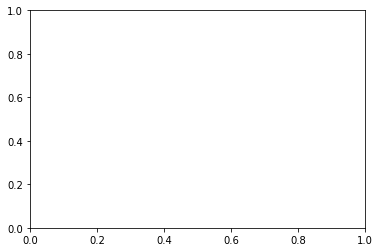

In [565]:
plt.plot(cost,range(0,n))

In [566]:
type(cost)

list

In [587]:
type(cost[0])

numpy.ndarray

In [589]:
cost =np.concatenate(cost).ravel().tolist()

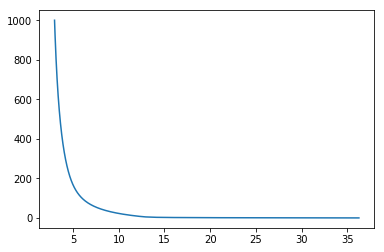

In [600]:
plt.plot(cost,np.arange(0,n))

In [598]:
np.arange(0,n)

array([   0,    1,    2, ...,  998,  999, 1000])

In [596]:
a


range(0, 1001)